# 1. <a id='toc1_'></a>[科学技術計算5](#toc0_)

この演習トピックでは，固有値計算や特異値分解，主成分分析を学ぶ．まず，固有値と固有ベクトルの定義や性質について復習し，数値的に固有値を求めるためのアルゴリズムを学び，固有値計算の効率性と安定性を理解する．具体的には，べき乗法とその関連手法，そしてQR法を学ぶ．QR法のためのQR分解を効率的に行うために，ハウスホルダー変換とギブンス変換を理解する．さらに，特異値分解を利用した低ランク近似や次元削減，主成分分析によるデータの可視化・解析手法についても学ぶ．

In [88]:
import numpy as np
import scipy

from numpy.linalg import inv, norm, solve, det, matrix_rank, cond, pinv, lstsq, eig, eigh, eigvals, eigvalsh
from numpy import diag
rng = np.random.default_rng()

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["savefig.bbox"] = "tight"

from typing import List, Optional, Union, Tuple

import sklearn
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces

from matplotlib.pyplot import imshow


**目次**<a id='toc0_'></a>    
- 1. [科学技術計算5](#toc1_)    
  - 1.1. [固有値についての線形代数の復習](#toc1_1_)    
    - 1.1.1. [固有値と固有ベクトル](#toc1_1_1_)    
    - 1.1.2. [実対称行列の対角化](#toc1_1_2_)    
    - 1.1.3. [相似変換](#toc1_1_3_)    
    - 1.1.4. [特性方程式](#toc1_1_4_)    
  - 1.2. [固有値についての数値計算のアプローチ](#toc1_2_)    
    - 1.2.1. [数値的な解法](#toc1_2_1_)    
    - 1.2.2. [numpyとscipyの実装](#toc1_2_2_)    
      - 1.2.2.1. [eig()とeigh()，eigvals()とeigvalsh()](#toc1_2_2_1_)    
    - 1.2.3. [固有値をnumpyで求める例](#toc1_2_3_)    
    - 1.2.4. [固有ベクトルをnumpyで求める例](#toc1_2_4_)    
  - 1.3. [べき乗法と関連手法](#toc1_3_)    
    - 1.3.1. [べき乗法（power method）](#toc1_3_1_)    
      - 1.3.1.1. [べき乗法の概要](#toc1_3_1_1_)    
      - 1.3.1.2. [実際の計算](#toc1_3_1_2_)    
      - 1.3.1.3. [べき乗法の実装例](#toc1_3_1_3_)    
      - 1.3.1.4. [関数化したべき乗法](#toc1_3_1_4_)    
    - 1.3.2. [逆反復法（inverse iteration）](#toc1_3_2_)    
      - 1.3.2.1. [逆反復法の概要](#toc1_3_2_1_)    
      - 1.3.2.2. [LU分解を用いた実装](#toc1_3_2_2_)    
      - 1.3.2.3. [関数化した逆反復法](#toc1_3_2_3_)    
    - 1.3.3. [シフト付き逆反復法（shifted inverse iteration）](#toc1_3_3_)    
      - 1.3.3.1. [実装例](#toc1_3_3_1_)    
      - 1.3.3.2. [関数化した逆反復法](#toc1_3_3_2_)    
    - 1.3.4. [レイリー商反復（Rayleigh quotient iteration）](#toc1_3_4_)    
      - 1.3.4.1. [レイリー商反復の概要](#toc1_3_4_1_)    
      - 1.3.4.2. [実装例](#toc1_3_4_2_)    
      - 1.3.4.3. [関数化したレイリー商反復法](#toc1_3_4_3_)    
    - 1.3.5. [逆反復法の安定性についての補足](#toc1_3_5_)    
  - 1.4. [QR法](#toc1_4_)    
    - 1.4.1. [QR分解](#toc1_4_1_)    
      - 1.4.1.1. [QR分解の数値計算アルゴリズム](#toc1_4_1_1_)    
      - 1.4.1.2. [numpyのQR分解](#toc1_4_1_2_)    
    - 1.4.2. [QR法の概要](#toc1_4_2_)    
      - 1.4.2.1. [QR法の計算量](#toc1_4_2_1_)    
      - 1.4.2.2. [QR法の実装例](#toc1_4_2_2_)    
      - 1.4.2.3. [関数化したQR法](#toc1_4_2_3_)    
    - 1.4.3. [ハウスホルダー法（Householder method）](#toc1_4_3_)    
      - 1.4.3.1. [鏡映行列](#toc1_4_3_1_)    
      - 1.4.3.2. [鏡映変換](#toc1_4_3_2_)    
      - 1.4.3.3. [ハウスホルダー変換：1列目](#toc1_4_3_3_)    
        - 1.4.3.3.1. [1行目のハウスホルダー行列](#toc1_4_3_3_1_)    
        - 1.4.3.3.2. [鏡映変換の単位法線ベクトル$u$](#toc1_4_3_3_2_)    
        - 1.4.3.3.3. [ハウスホルダー変換の列への適用](#toc1_4_3_3_3_)    
      - 1.4.3.4. [ハウスホルダー変換：2列目](#toc1_4_3_4_)    
      - 1.4.3.5. [ハウスホルダー変換：$k=1,2,\ldots,n-2$列目](#toc1_4_3_5_)    
      - 1.4.3.6. [関数化したハウスホルダー変換](#toc1_4_3_6_)    
    - 1.4.4. [ギブンス変換](#toc1_4_4_)    
      - 1.4.4.1. [ギブンス回転](#toc1_4_4_1_)    
        - 1.4.4.1.1. [2次元での回転](#toc1_4_4_1_1_)    
        - 1.4.4.1.2. [回転の逆算](#toc1_4_4_1_2_)    
        - 1.4.4.1.3. [ギブンス回転によるギブンス変換](#toc1_4_4_1_3_)    
      - 1.4.4.2. [実装](#toc1_4_4_2_)    
        - 1.4.4.2.1. [$p$行目と$q$行目の抽出](#toc1_4_4_2_1_)    
        - 1.4.4.2.2. [$2 \times 2$回転行列を抽出した2行へ適用](#toc1_4_4_2_2_)    
        - 1.4.4.2.3. [行列$A$全体へのギブンス回転$G$の適用](#toc1_4_4_2_3_)    
        - 1.4.4.2.4. [ギブンス回転を順に適用](#toc1_4_4_2_4_)    
        - 1.4.4.2.5. [ギブンス回転行列の蓄積](#toc1_4_4_2_5_)    
      - 1.4.4.3. [ギブンス変換の関数化](#toc1_4_4_3_)    
    - 1.4.5. [QR法のまとめ](#toc1_4_5_)    
  - 1.5. [特異値分解](#toc1_5_)    
    - 1.5.1. [特異値分解の概要](#toc1_5_1_)    
    - 1.5.2. [full SVDとthin SVD](#toc1_5_2_)    
    - 1.5.3. [行列の低ランク近似](#toc1_5_3_)    
      - 1.5.3.1. [切り捨て特異値分解](#toc1_5_3_1_)    
      - 1.5.3.2. [エッカート・ヤングの定理](#toc1_5_3_2_)    
    - 1.5.4. [固有値との関係](#toc1_5_4_)    
    - 1.5.5. [固有値分解を利用した単純なthin SVDの計算手法](#toc1_5_5_)    
    - 1.5.6. [numpyとscipyの実装](#toc1_5_6_)    
  - 1.6. [主成分分析](#toc1_6_)    
    - 1.6.1. [データ行列の解析](#toc1_6_1_)    
      - 1.6.1.1. [主成分の定式化](#toc1_6_1_1_)    
      - 1.6.1.2. [共分散行列の計算](#toc1_6_1_2_)    
      - 1.6.1.3. [第1主成分：分散最大化問題](#toc1_6_1_3_)    
      - 1.6.1.4. [第$i$主成分](#toc1_6_1_4_)    
    - 1.6.2. [次元削減](#toc1_6_2_)    
      - 1.6.2.1. [累積寄与率](#toc1_6_2_1_)    
    - 1.6.3. [実装（$m > n$の場合）](#toc1_6_3_)    
      - 1.6.3.1. [scikit-learnによる実装](#toc1_6_3_1_)    
    - 1.6.4. [実装（$m < n$の場合）：顔画像データセットの主成分分析](#toc1_6_4_)    
      - 1.6.4.1. [計算方法](#toc1_6_4_1_)    
      - 1.6.4.2. [固有顔](#toc1_6_4_2_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1.1. <a id='toc1_1_'></a>[固有値についての線形代数の復習](#toc0_)

### 1.1.1. <a id='toc1_1_1_'></a>[固有値と固有ベクトル](#toc0_)

ある$n$次正方行列$A \in R^{n \times n}$が，次式
$$
A \boldsymbol{x} = \lambda \boldsymbol{x}
$$
を満たすとき，実数$\lambda \in R$を行列$A$の**固有値**（eigenvalue），$n$次元ベクトル$\boldsymbol{x} \in R^n$をその固有値に対応する**固有ベクトル**（eigenvector）と呼ぶ．

固有値は，重複を含めて$n$個存在することが知られており，これらは一般に複素数である（つまり$\lambda_1, \ldots, \lambda_n \in C$）．実行列であっても，固有値が必ずしも実数とは限らず，複素数である場合もある．また，それに対応する固有ベクトル$\boldsymbol{x}_1, \ldots, \boldsymbol{x}_n \in C^n$も複素ベクトルとなることがある．

しかし，多くの実応用では**実対称行列**（$A = A^T$）を扱う場合が多い．実対称行列の場合には，固有値はすべて実数となり（$\lambda_1, \ldots, \lambda_n \in R$），対応する固有ベクトルもすべて実数ベクトル$\boldsymbol{x}_1, \ldots, \boldsymbol{x}_n \in R^n$となる．実対称行列は，固有値がすべて実数であり，さらに固有ベクトルが互いに直交するという性質を持つため，幅広い分野で利用される．
この資料でも，以下では実対称行列のみを扱う．

実対称行列の固有値はすべて実数であるため，その大小関係を次のように定義することができる．
$$
\lambda_1 \ge \lambda_2 \ge \cdots \ge \lambda_{n-1} \ge \lambda_n
$$
ここで，$\lambda_1$を**最大固有値**，$\lambda_n$を**最小固有値**と呼ぶ．これらはそれぞれ$\lambda_\mathrm{max}$，$\lambda_\mathrm{min}$と表されることもある．また，行列$A$の固有値であることを明示するために，$\lambda_1(A), \lambda_2(A), \ldots, \lambda_n(A)$と書いたり，$\lambda_\mathrm{max}(A), \lambda_\mathrm{min}(A)$と書いたりすることもある．

- https://ja.wikipedia.org/wiki/%E5%9B%BA%E6%9C%89%E5%80%A4%E3%81%A8%E5%9B%BA%E6%9C%89%E3%83%99%E3%82%AF%E3%83%88%E3%83%AB
    > 数学の線型代数学において、線型変換の固有値とは、零ベクトルでないベクトルを線型変換によって写したときに、写された後のベクトルが写される前のベクトルのスカラー倍になっている場合の、そのスカラー量（拡大率）のことである。



### 1.1.2. <a id='toc1_1_2_'></a>[実対称行列の対角化](#toc0_)

実対称行列$A$の異なる固有値$\lambda_i \neq \lambda_j$に対応する固有ベクトル$\boldsymbol{x}_i$と$\boldsymbol{x}_j$は互いに直交する．つまり，$\boldsymbol{x}_i \perp \boldsymbol{x}_j$であり，その内積はゼロになる．これらの固有ベクトルを列に並べた行列
$$
U = [\boldsymbol{x}_1 \ \cdots \ \boldsymbol{x}_n] \in R^{n \times n}
$$
は**直交行列**となる．直交行列とは，その転置行列が逆行列と等しい行列であり，次の関係が成り立つ．
$$
U U^T = U^T U = I
$$
ここで，$U^T$は$U$の転置行列，$I$は単位行列を表す．

もし固有値が重複する場合（$\lambda_i = \lambda_j$），その固有値に対応する空間の中から直交するベクトルを選ぶことができる．したがって，重複する固有値を持つ場合でも，直交行列$U$を構成することが可能である．

次に，固有値を対角成分に持つ対角行列$D$を次のように定義する．
$$
D =
\begin{pmatrix}
\lambda_1 \\
& \lambda_2 \\
&& \ddots \\
&&& \lambda_n
\end{pmatrix}
 \in R^{n \times n}
$$
このとき，行列$A$は各固有ベクトルに対して次のように作用する．
\begin{align*}
A \boldsymbol{x}_1 &= \lambda_1 \boldsymbol{x}_1 \\
A \boldsymbol{x}_2 &= \lambda_2 \boldsymbol{x}_2 \\
\vdots \\
A \boldsymbol{x}_n &= \lambda_n \boldsymbol{x}_n
\end{align*}
これらをまとめて行列の形で表すと，
$$
AU = UD
$$
となる．これを利用すると，行列$A$は次のように変換することができる．
$$
U^T A U = D
$$
これを$A$の**対角化**（diagonalization）と呼ぶ．対角化は，行列をある変換によって対角行列にする操作である．さらに，行列$A$は次のように分解することもできる．
$$
A = U D U^T
$$
これを$A$の**固有値分解**（eigenvalue decomposition）と呼ぶ．固有値分解は，ある行列をその固有値と固有ベクトルからなる行列に分解する方法であり，実対称行列の場合には特に重要な手法である．

また，数値解析の分野では，実対称行列に対する固有値分解を**シュール分解**（symmetric Schur decomposition）と呼ぶこともある．ただし，一般の行列に対するシュール分解では，$D$が対角行列ではなく上三角行列となる．


- https://ja.wikipedia.org/wiki/%E5%AF%BE%E8%A7%92%E5%8C%96
    > 対角化（たいかくか、diagonalization[1]）とは、正方行列を適当な線形変換によりもとの行列と相似な対角行列に変形することを言う。
- https://ja.wikipedia.org/wiki/%E5%9B%BA%E6%9C%89%E5%80%A4%E5%88%86%E8%A7%A3
    > 線型代数学において固有値分解 とは、固有値に着目した行列の分解である。
- https://ja.wikipedia.org/wiki/%E3%82%B7%E3%83%A5%E3%83%BC%E3%83%AB%E5%88%86%E8%A7%A3
    > 数学の線型代数学の分野におけるシューア分解あるいはシューア三角化とは、イサイ・シュールの名にちなむ行列の分解の一種である。


### 1.1.3. <a id='toc1_1_3_'></a>[相似変換](#toc0_)

実対称行列$A$に対して，直交行列$P$を用いた次の変換を**相似変換**と呼ぶ．
$$
B = P^T A P
$$
このとき，行列$A$と$B$は**相似**であるといい，$A \sim B$と表すことがある．相似変換では，固有値は変化しないという重要な性質を持っている．つまり，相似な行列の固有値は等しい．
これを数式で表すと次のようになる．
$$
B = P^T A P = P^T U^T D U P = U^{'T} D U'
$$
ここで，$U' = UP$である．

- https://ja.wikipedia.org/wiki/%E8%A1%8C%E5%88%97%E3%81%AE%E7%9B%B8%E4%BC%BC
    > 線型代数学において、ふたつの n 次正方行列 $A$, $B$ が相似であるとは、$n$ 次正則行列 $P$ で $B=P^{-1}AP$ となるようなものが存在するときに言う。


### 1.1.4. <a id='toc1_1_4_'></a>[特性方程式](#toc0_)

行列の固有値分解（対角化）を行うためには，まず固有値と固有ベクトルを求める必要がある．このために，次の関係を考える．
$$
A \boldsymbol{x} = \lambda \boldsymbol{x}
$$
これを変形すると，以下の斉次方程式が得られる．
$$
(A - \lambda I) \boldsymbol{x} = \boldsymbol{0}
$$
この斉次方程式が非自明な解（$\boldsymbol{x} \neq \boldsymbol{0}$）を持つためには，$A - \lambda I$の行列のランクが$n$未満でなければならない．これは，次の条件を満たす必要がある．
$$
\mathrm{det}(A - \lambda I) = 0
$$
この方程式を**特性方程式**（または固有多項式）と呼ぶ．特性方程式は$n$次の多項式であり，その解である$n$個の根が行列$A$の固有値$\lambda_1, \lambda_2, \ldots, \lambda_n$である．

そして，各固有値$\lambda_i$に対して，固有ベクトルの長さが1という条件$\| \boldsymbol{x} \| = 1$の下で，方程式$A \boldsymbol{x} = \lambda_i \boldsymbol{x}$の解（つまり固有ベクトル）を求める．

- https://ja.wikipedia.org/wiki/%E5%9B%BA%E6%9C%89%E5%A4%9A%E9%A0%85%E5%BC%8F
    > 線型代数学において、固有多項式あるいは特性多項式とは、有限次元線形空間での線形変換に対してその固有値を求めるために得られる多項式のことである。特に正方行列に対して定義される。





## 1.2. <a id='toc1_2_'></a>[固有値についての数値計算のアプローチ](#toc0_)

上記で説明した手順は，線形代数で学ぶ理論的な方法であるが，実際の数値計算ではいくつかの問題がある．特に，$n > 5$の行列に対しては代数的な解法が存在しないため，固有値を**数値的**に求める必要がある．さらに，$n$次の多項式では，$n$が大きくなるにつれて微小な変化に対して値が急激に変化することがあり，このために計算が不安定になることがある．したがって，理論的な手順だけではなく，数値的に安定した計算方法を使用することが重要である．

上述したように，相似な行列$A$と$B$は固有値が等しい．
$$
B = P^T A P = P^T U^T D U P = U^{'T} D U'
$$
ここで$U' = UP$である．この関係を利用して，行列$A$の固有値を求めるときには，相似変換を使って数値的に計算しやすく安定した行列$B$に変換し，その$B$の固有値を計算するというアプローチが一般的である．

以下で説明する方法では，**ハウスホルダー変換**，**ギブンス変換**，**QR変換**が相似変換を求めるためのアルゴリズムとして用いられる．これらの手法を使って，計算しやすい行列$B$として**上ヘッセンベルグ行列**，**上三角行列**，**三重対角行列**などを利用する．これにより，数値計算的に安定な固有値計算が可能になる．

- https://ja.wikipedia.org/wiki/%E5%9B%BA%E6%9C%89%E5%80%A4%E5%95%8F%E9%A1%8C%E3%81%AE%E6%95%B0%E5%80%A4%E8%A7%A3%E6%B3%95
    > 数値線形代数において高速・高精度で安定な固有値問題の数値解法の開発および厳密な誤差評価の確立は至上命題の一つであり、この目標を達するためにLAPACKをはじめ多くのライブラリが開発されてきた。
- https://en.wikipedia.org/wiki/Eigenvalue_algorithm
    > In numerical analysis, one of the most important problems is designing efficient and stable algorithms for finding the eigenvalues of a matrix. These eigenvalue algorithms may also find eigenvectors.


### 1.2.1. <a id='toc1_2_1_'></a>[数値的な解法](#toc0_)


実対称行列の固有値や固有ベクトルを数値的に求める方法には，さまざまな手法が存在する．また，行列$A$の性質によっても最適な手法は異なる．以下に，代表的な数値的手法をいくつか紹介する．


- 1つの固有値とその固有ベクトルを求める反復法
    - **べき乗法**や**逆反復法**：1つの固有値を求める方法
    - **シフト付き逆反復法**や**レイリー商反復**：固有値の近似値から計算を始める方法

- すべての固有値を同時に反復的に求める方法
    - **QR法**やヤコビ法：複数の固有値を同時に求める手法

- 固有値を求めやすい行列（三重対角等）に変換する方法
    - **ハウスホルダー変換**を用いて三重対角化する方法

- 固有値を求めやすい行列（三重対角等）の固有値を求める方法

    - 固有値を求めた後に，べき乗法などで固有ベクトルを計算する手法
        - スツルム列を使った二分法：一部の固有値のみ計算する手法

    - すべての固有値を同時に求める手法．
        - **QR法**：QR分解を反復適用する手法
            - 三重対角行列をさらに**ギブンス変換により上三角化**することでQR分解を行う手法
            - シフト付きQR法：特に効率的であり，現在標準的に使われている．
        - 分割統治法：並列計算に適しており，現在標準的に使われている．


これらは主に小規模な**密行列**に対する手法である．大規模な疎行列や一般の非対称行列に対しては，異なる手法が必要になる．例えば，非対称行列には上ヘッセンベルグ行列への変換とQR法が適用されることがある．また，大規模疎行列にはランチョス法が用いられる．



- ランチョス法
  - [F・シャトラン, 行列の固有値, 丸善出版, 2012](https://www.maruzen-publishing.co.jp/item/b294297.html), 第6章 大規模行列のための数値的方法, 6.3 Lanczos法, p.215.
  - [Gene H. Golub, Charles F. Van Loan, Matrix Computations, 4th edition, Johns Hopkins Univ Press, 2012](https://www.press.jhu.edu/books/title/10678/matrix-computations), Chapter 10. Large Sparse Eigenvalue Problerms, 10.1 The Symmetric Lanczos Process, p.546.
- 分割統治
  - [Gene H. Golub, Charles F. Van Loan, Matrix Computations, 4th edition, Johns Hopkins Univ Press, 2012](https://www.press.jhu.edu/books/title/10678/matrix-computations), 8.4.4 A Divide-and-Conquer Framework, p.471.
  - [日本応用数理学会 監修, 櫻井鉄也・松尾宇泰・片桐孝洋 編, 数値線形代数の数理とHPC, 共立出版, 2018.](https://www.kyoritsu-pub.co.jp/book/b10003102.html), 2.1.3 対称三重対角行列に対する反復法, (2) 分割統治法, p.71.
- スツルム列
  - [Gene H. Golub, Charles F. Van Loan, Matrix Computations, 4th edition, Johns Hopkins Univ Press, 2012](https://www.press.jhu.edu/books/title/10678/matrix-computations), 8.4.2 Sturm Sequence Methods, p.468.
  - [河村哲也, 桑名杏奈, Pythonによる数値計算入門, 朝倉書店, 2021](https://www.asakura.co.jp/detail.php?book_code=12900), 4.7 3重対角行列の固有値, p.93.


重要な点は次のとおりである．

- 対称行列と非対称行列では使用するアルゴリズムが異なる．対称行列に特化したアルゴリズムは一般に計算効率が良い．
- 固有値を計算する際に固有ベクトルまで求める必要がない場合，不要な計算を避けるために，固有ベクトルを計算しないアルゴリズムを使うことが望ましい．


この資料では，まず1つの固有値と固有ベクトルを求める手法として**べき乗法**とその関連手法を説明する．続いて，すべての固有値を求める手法として**QR法**を紹介する．さらに，QR法の計算を効率化するための**ハウスホルダー変換**と**ギブンス変換**を説明する．


その前に，まずnumpyとscipyに実装されている固有値・固有ベクトル計算のソルバーを説明する．


### 1.2.2. <a id='toc1_2_2_'></a>[numpyとscipyの実装](#toc0_)

それぞれのライブラリでは、固有値や固有ベクトルを求めるためのさまざまな関数が提供されている．一般の行列用の関数は，対称行列や非対称行列など任意の正方行列を扱う．対称行列用の関数名の末尾に付く"h"は，エルミート行列（Hermite，実行列の場合は対称行列）を示している．
一部を除き，これらの関数は複素行列も扱える．
またこれらの関数は，内部的にLAPACK（Linear Algebra PACKage）の関数を利用している．


- **固有値のみを求める関数**
    - 一般の行列用
        - [`scipy.linalg.eigvals()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eigvals.html)
        - [`numpy.linalg.eigvals()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigvals.html)
    - 対称行列用
        - [`scipy.linalg.eigvalsh()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eigvalsh.html)
        - [`numpy.linalg.eigvalsh()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigvalsh.html)
    - 実対称三重対角行列用
        - [`scipy.linalg.eigvalsh_tridiagonal()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eigvalsh_tridiagonal.html)
    - 対称帯行列用
        - [`scipy.linalg.eigvals_banded()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eigvals_banded.html)

- **固有値と固有ベクトルを求める関数**
    - 一般の行列用
        - [`scipy.linalg.eig()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eig.html)
        - [`numpy.linalg.eig()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)
            - LAPACKの[`dgeev`](https://github.com/Reference-LAPACK/lapack/blob/master/SRC/dgeev.f)を利用している．
    - 対称行列用
        - [`scipy.linalg.eigh()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eigh.html)
        - [`numpy.linalg.eigh()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html)
            - LAPACKの[`dsyev`](https://github.com/Reference-LAPACK/lapack/blob/master/SRC/dsyev.f)，[`dsyevd`](https://github.com/Reference-LAPACK/lapack/blob/master/SRC/dsyevd.f)，[`dsyevr`](https://github.com/Reference-LAPACK/lapack/blob/master/SRC/dsyevr.f)，および[`dsyevx`](https://github.com/Reference-LAPACK/lapack/blob/master/SRC/dsyevx.f)を利用している．
    - 実対称三重対角行列用
        - [`scipy.linalg.eigh_tridiagonal()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eigh_tridiagonal.html)
            - LAPACKの[`dstev`](https://github.com/Reference-LAPACK/lapack/blob/master/SRC/dstev.f)を利用している．
    - 対称帯行列用
        - [`scipy.linalg.eig_banded()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eig_banded.html)
            - LAPACKの[`dsbevd`](https://github.com/Reference-LAPACK/lapack/blob/master/SRC/dsbevd.f)を利用している．



#### 1.2.2.1. <a id='toc1_2_2_1_'></a>[eig()とeigh()，eigvals()とeigvalsh()](#toc0_)

これらの関数の中から，目的に応じて適切なものを選択する必要がある．たとえば，実対称行列に対して一般行列用の[`numpy.linalg.eig()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)を使ってしまうと，不要な計算が発生するだけでなく，結果として得られる固有値や固有ベクトルが複素数になってしまうことがある（実際には実数であるはずの固有値に，マシンイプシロン程度の虚部が付加される）．これは数値計算上の不安定さを引き起こす可能性があるだけでなく，不要な虚部を計算することにより効率性が低下する．

そのため，**対称行列**を扱う場合には，対称行列専用の[`numpy.linalg.eigh()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html)や[`numpy.linalg.eigvalsh()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigvalsh.html)を使用することが重要である．これらの関数は，対称行列の固有値や固有ベクトルを効率的に計算するために最適化されており，計算結果も実数となる．

どちらの関数を使用するかは，利用するライブラリに応じて決める．numpyとscipyの両方で同様の関数が提供されているが，以下のような違いがある．

- numpy: よりシンプルなインターフェースで提供されており，基本的な固有値・固有ベクトル計算に適している．オプションの引数が少なく，簡単に使用できる．
- scipy: より高度なオプションを提供しており，例えば一般固有値問題や，変数上書きによるメモリ節約などができる．複雑な問題や大規模な行列に対しては，scipyの方が柔軟に対応できる．

このため，シンプルな操作が必要な場合はnumpyを，より高度な機能や最適化を利用したい場合はscipyを選択するのが良い．

### 1.2.3. <a id='toc1_2_3_'></a>[固有値をnumpyで求める例](#toc0_)

ここでは，対称行列$A$と一般の行列$B$に対して，固有値をnumpyやscipyを使って求める例を示す．

まず，対称行列$A$と一般の行列$B$を生成する．


In [89]:
m = 10
n = 5

# 対称行列Aを生成
A = rng.random(size=(m, n))
A = A.T @ A  # Aを対称行列にする
print("symmetric matrix A\n", A, sep='')

# 一般の行列Bを生成
B = rng.random(size=(n, n))
print("general matrix B\n", B, sep='')


symmetric matrix A
[[4.69875839 2.56643633 2.24890066 4.25423998 2.62893452]
 [2.56643633 2.5665842  1.7510502  2.28548062 1.58575657]
 [2.24890066 1.7510502  2.19326645 2.53935049 1.28668971]
 [4.25423998 2.28548062 2.53935049 4.26234177 2.12267676]
 [2.62893452 1.58575657 1.28668971 2.12267676 2.9047765 ]]
general matrix B
[[0.08641551 0.4754487  0.07909458 0.9959618  0.30099873]
 [0.63535224 0.44909149 0.92141057 0.34406243 0.0873749 ]
 [0.65919473 0.24579542 0.67392031 0.13866648 0.59881086]
 [0.53965755 0.04286609 0.9299262  0.19611749 0.29003029]
 [0.25843071 0.98060119 0.8195582  0.49400644 0.15266603]]


次に，numpyとscipyを使ってそれぞれの行列の固有値を計算する．

この例では，対称行列$A$の固有値を効率的に計算するために，`eigvalsh()`を使用している．一方で，一般の行列$B$に対しては`eigvals()`を使用して固有値を求めている．

In [90]:
# 対称行列Aの固有値を計算
print("Eigenvalues of A (numpy):", np.linalg.eigvalsh(A))
print("Eigenvalues of A (scipy):", scipy.linalg.eigvalsh(A))

# 一般の行列Bの固有値を計算
with np.printoptions(
    formatter={
    'float': '{: <25.8f}'.format,
    'complexfloat': '{: <25.8f}'.format
    },
    linewidth=1000
):
    print("Eigenvalues of B (numpy):", np.linalg.eigvals(B))
    print("Eigenvalues of B (scipy):", scipy.linalg.eigvals(B))


Eigenvalues of A (numpy): [ 0.02924838  0.6603656   1.12903943  1.53494648 13.27212743]
Eigenvalues of A (scipy): [ 0.02924838  0.6603656   1.12903943  1.53494648 13.27212743]
Eigenvalues of B (numpy): [2.25938306+0.00000000j    -0.45206658+0.51102438j   -0.45206658-0.51102438j   0.10148046+0.28983224j    0.10148046-0.28983224j   ]
Eigenvalues of B (scipy): [2.25938306+0.00000000j    -0.45206658+0.51102438j   -0.45206658-0.51102438j   0.10148046+0.28983224j    0.10148046-0.28983224j   ]


注意点として，対称行列$A$に対して`eigvals()`を使って固有値を求めると，実際には**実数**であるべき固有値が**複素数**として計算される場合がある．この場合，虚部は0かマシンイプシロン程度の非常に小さな値であるが，内部的には複素数を用いた無駄な計算が行われている．これは，対称行列であるにもかかわらず，数値計算が非効率的になっていることを意味する．

これを確認するために，次のように`eigvals()`を使った結果を出力してみる．

In [91]:
with np.printoptions(
    formatter={
    'float': '{: <25.8f}'.format,
    'complexfloat': '{: <25.8f}'.format
    },
    linewidth=1000
):
    # 対称行列Aにeigvals()を使用
    print("Eigenvalues of A using eigvals (numpy):", np.linalg.eigvals(A))
    print("Eigenvalues of A using eigvals (scipy):", scipy.linalg.eigvals(A))

Eigenvalues of A using eigvals (numpy): [13.27212743               0.02924838                0.66036560                1.12903943                1.53494648               ]
Eigenvalues of A using eigvals (scipy): [13.27212743+0.00000000j   0.02924838+0.00000000j    0.66036560+0.00000000j    1.12903943+0.00000000j    1.53494648+0.00000000j   ]


このように，scipyの`eigvals()`を使用した場合，固有値は複素数として出力され，虚部が0であることが確認できる．これは対称行列であっても，複素数として無駄な計算が行われていることを示している．一方でnumpyの`eigvals()`を使用した場合には，固有値は実数として出力されていることが確認できる．これはそれぞれのライブラリでの内部の挙動が異なり，numpyでは行列が対称であることを判断して処理している結果であると考えられる．

どちらライブラリの場合にも，対称行列であることがわかっている場合には`eigvalsh()`を使用することが望ましい．

### 1.2.4. <a id='toc1_2_4_'></a>[固有ベクトルをnumpyで求める例](#toc0_)

次に，固有ベクトルを求める例を示す．固有値と固有ベクトルを同時に求めるために，対称行列$A$には`eigh()`を使用し，非対称行列$B$には`eig()`を使用する．

これらの関数は，固有値と対応する固有ベクトルを同時に計算するものであり，「あらかじめ求めてある固有値を利用して固有ベクトルを求める」という操作には対応していない．例えば，`eigvals()`で固有値を計算し，その後に`eig()`で固有ベクトルを求めると，固有値の計算が無駄に二重に行われてしまうことに注意が必要である．

以下のコードでは，固有値と固有ベクトルを求め，対称行列$A$の場合の固有値分解$A = U D U^T$もしくは対角化$D = U^T A U$が成り立っているかを確認する．
返り値の`d`は1次元のndarrayであり，`diag(d)`を使用して対角行列$D$に変換している．

In [92]:
d, U = np.linalg.eigh(A)

with np.printoptions(formatter={'float': '{: 12.8f}'.format}, suppress=True, linewidth=100):

    print("eiganvalues", d)
    print("eiganvectors\n", U, sep='')

    print("U D U^T == A", np.allclose(U @ diag(d) @ U.T, A))
    print("U^T A U == D", np.allclose(U.T @ A @ U, diag(d)))


eiganvalues [  0.02924838   0.66036560   1.12903943   1.53494648  13.27212743]
eiganvectors
[[ -0.58821200   0.41421342  -0.38694541   0.02836140  -0.57611003]
 [  0.19887301   0.49459490   0.76170287  -0.06612845  -0.36229983]
 [ -0.39866433  -0.68308428   0.35421452  -0.36525353  -0.33997728]
 [  0.66494544  -0.13645097  -0.37170331  -0.32527883  -0.54337742]
 [  0.11563083  -0.31397471   0.08031629   0.86925612  -0.35495420]]
U D U^T == A True
U^T A U == D True


In [93]:
d, U = np.linalg.eig(B)

with np.printoptions(formatter={'float': '{: 12.8f}'.format}, suppress=True, linewidth=200):

    print("eiganvalues", d)
    print("eiganvectors\n", U, sep='')

    print("U D U^{-1} == B", np.allclose(U @ diag(d) @ inv(U), B))
    print("D == U^{-1} B U", np.allclose(diag(d), inv(U) @ B @ U))


eiganvalues [ 2.25938306+0.j         -0.45206658+0.51102438j -0.45206658-0.51102438j  0.10148046+0.28983224j  0.10148046-0.28983224j]
eiganvectors
[[-0.370447  +0.j         -0.58207151+0.j         -0.58207151-0.j          0.58986525+0.j          0.58986525-0.j        ]
 [-0.46431733+0.j          0.16013409-0.21804826j  0.16013409+0.21804826j  0.15755534-0.36254615j  0.15755534+0.36254615j]
 [-0.46103302+0.j          0.27871806+0.37949778j  0.27871806-0.37949778j -0.34541901+0.05635391j -0.34541901-0.05635391j]
 [-0.38913507+0.j          0.32107945-0.116103j    0.32107945+0.116103j    0.09180427+0.38933165j  0.09180427-0.38933165j]
 [-0.53216622+0.j         -0.34727195-0.35935044j -0.34727195+0.35935044j -0.43234719-0.16240162j -0.43234719+0.16240162j]]
U D U^{-1} == B True
D == U^{-1} B U True


また，scipyやnumpyで`eigh()`を使用する場合，固有値と固有ベクトルは**昇順**で並べられる（in ascending order）．例えば，最大固有値は`d[-1]`，最小固有値は`d[0]`として取得できる．


In [94]:
d, U = np.linalg.eigh(A)

# 最大固有値と対応する固有ベクトル
lmd_max = d[-1]
u_max = U[:, -1]
print("largest eigenvalue", lmd_max)
print("its eigenvextor", u_max)

# 最小固有値と対応する固有ベクトル
lmd_min = d[0]
u_min = U[:, 0]
print("smallest eigenvalue", lmd_min)
print("its eigenvextor", u_min)


largest eigenvalue 13.272127427554299
its eigenvextor [-0.57611003 -0.36229983 -0.33997728 -0.54337742 -0.3549542 ]
smallest eigenvalue 0.02924837582335126
its eigenvextor [-0.588212    0.19887301 -0.39866433  0.66494544  0.11563083]


教科書などでは，一般的に最大固有値が$\lambda_1$，最小固有値が$\lambda_n$と表記されることが多い．しかし，numpyやscipyの`eigh()`では，固有値は**昇順**（最小から最大へ）で返されるため，最小固有値が`d[0]`，最大固有値が`d[-1]`（または`d[n-1]`）となることに注意が必要である．

そこで，以降のコードでは，最大固有値が`d[0]`に来るように，`d`の要素と対応する固有ベクトル`U`の列を**逆順**に並べ替える操作を行う場合がある．以下はその例である．


In [95]:
d, U = np.linalg.eigh(A)

# 固有値と固有ベクトルを逆順に入れ替える
d = d[::-1]  # 固有値を逆順に
U = U[:, ::-1]  # 固有ベクトルを逆順に

with np.printoptions(formatter={'float': '{: 12.8f}'.format}, suppress=True, linewidth=100):

    print("eiganvalues", d)
    print("eiganvectors\n", U, sep='')

    print("U D U^T == A", np.allclose(U @ diag(d) @ U.T, A))
    print("U^T A U == D", np.allclose(U.T @ A @ U, diag(d)))


eiganvalues [ 13.27212743   1.53494648   1.12903943   0.66036560   0.02924838]
eiganvectors
[[ -0.57611003   0.02836140  -0.38694541   0.41421342  -0.58821200]
 [ -0.36229983  -0.06612845   0.76170287   0.49459490   0.19887301]
 [ -0.33997728  -0.36525353   0.35421452  -0.68308428  -0.39866433]
 [ -0.54337742  -0.32527883  -0.37170331  -0.13645097   0.66494544]
 [ -0.35495420   0.86925612   0.08031629  -0.31397471   0.11563083]]
U D U^T == A True
U^T A U == D True


なお，scipyの`eigh()`には，固有値の一部のみを計算する機能がある．
そのためには引数`subset_by_index`に`[a, b]`と指定する．こうすると，固有値`d[a], d[a+1], ..., d[b-1], d[b]`と対応する固有ベクトルだけが計算される．


In [96]:
d, U = scipy.linalg.eigh(A, subset_by_index=[2, 4])

with np.printoptions(formatter={'float': '{: 12.12f}'.format}, suppress=True, linewidth=100):

    print("eiganvalues", d)
    print("eiganvectors\n", U, sep='')

    print("U D U^T == A", np.allclose(U @ diag(d) @ U.T, A))
    print("U^T A U == D", np.allclose(U.T @ A @ U, diag(d)))


eiganvalues [ 1.129039426617  1.534946480483  13.272127427554]
eiganvectors
[[ 0.386945408049  0.028361401738 -0.576110031288]
 [-0.761702872526 -0.066128447011 -0.362299833791]
 [-0.354214519107 -0.365253530440 -0.339977284179]
 [ 0.371703313382 -0.325278831060 -0.543377421397]
 [-0.080316290063  0.869256118732 -0.354954203303]]
U D U^T == A False
U^T A U == D True


numpyやscipyなどを用いれば，固有値と固有ベクトルの計算を1行で簡単に行うことができる．これらのライブラリの内部で使用されているアルゴリズムや計算量について理解するために，以下ではまずべき乗法などの基本的な手法から説明する．

## 1.3. <a id='toc1_3_'></a>[べき乗法と関連手法](#toc0_)

### 1.3.1. <a id='toc1_3_1_'></a>[べき乗法（power method）](#toc0_)

べき乗法は，最大固有値$\lambda_1$に対応する固有ベクトル$\boldsymbol{x}_1$を求めるための反復法であり，同時に最大固有値も計算できる手法である．固有ベクトルを1つしか求められない単純な方法だが，他の手法で固有値を求めた後に固有ベクトルを求める際にも利用されるため，非常に基本的で頻繁に使用される．


- [F・シャトラン, 行列の固有値, 丸善出版, 2012](https://www.maruzen-publishing.co.jp/item/b294297.html), 第5章 固有値の計算法の基礎, 5.3 ベキ乗法, p.179.
- [Gene H. Golub, Charles F. Van Loan, Matrix Computations, 4th edition, Johns Hopkins Univ Press, 2012](https://www.press.jhu.edu/books/title/10678/matrix-computations), Chapter 8. Symmetric Eigenvalue Problems, 8.2 Power Iterations, p.450.

#### 1.3.1.1. <a id='toc1_3_1_1_'></a>[べき乗法の概要](#toc0_)


べき乗法は次の反復式を用いて，任意の初期値$\boldsymbol{u}^{(0)} \in R^n$から開始して解を更新する方法である．

$$
\boldsymbol{u}^{(k)} = A \boldsymbol{u}^{(k - 1)}
$$

ほとんどの場合，この反復は最大固有値に対応する固有ベクトルに収束する．

$$
\lim_{k \to \infty} \boldsymbol{u}^{(k)} = \boldsymbol{x}_1
$$


この収束は，固有値が$|\lambda_1| > |\lambda_2| \ge \cdots \ge |\lambda_n|$という条件を満たす場合に次のように導出される（正定値対称であればこの条件を満たす）．
$i$番目の固有ベクトル$\boldsymbol{x}_i$についての$\boldsymbol{u}^{(0)}$の展開係数を$c_i = \boldsymbol{x}_i^T \boldsymbol{u}^{(0)}$として，
反復式を次のように展開する．

\begin{align*}
\boldsymbol{u}^{(k)}
&= A \boldsymbol{u}^{(k - 1)} \\
&= A^k \boldsymbol{u}^{(0)} \\
&= A^k \sum_{i=1}^n c_i \boldsymbol{x}_i \\
&= \sum_{i=1}^n c_i \lambda_i^k \boldsymbol{x}_i \\
&= \lambda_1^k \sum_{i=1}^n c_i \left(\frac{\lambda_i}{\lambda_1}\right)^k \boldsymbol{x}_i
\end{align*}

ここで$c_1 = \boldsymbol{x}_1^T \boldsymbol{u}^{(0)} \neq 0$とすると，
最大固有値$\lambda_1$に対して
$\left| \frac{\lambda_i}{\lambda_1} \right| < 1$ ($i=2,\ldots,n$)
であるので，$k \to \infty$のとき

\begin{align*}
\boldsymbol{u}^{(k)} &\simeq \lambda_1^k c_1 \boldsymbol{x}_1
\end{align*}

となる．
つまり，
$\boldsymbol{u}^{(k)}$は$\boldsymbol{x}_1$と同じ向きに収束する．


#### 1.3.1.2. <a id='toc1_3_1_2_'></a>[実際の計算](#toc0_)

実際の計算では$\lambda_1^k$によるオーバーフローやアンダーフローを避けるため，各反復で正規化を行う．

- 初期値$\boldsymbol{u}^{(0)}$, $k=0$
- 収束するまで以下を反復する．
    - $\boldsymbol{u}^{'(k)} = A \boldsymbol{u}^{(k - 1)}$
    - $\boldsymbol{u}^{(k)} = \boldsymbol{u}^{'(k)} / \| \boldsymbol{u}^{'(k)} \|$
- $\boldsymbol{x}_1 = \boldsymbol{u}^{(k)}$

固有ベクトル$\boldsymbol{x}_1$が得られたら，次式に基づいて固有値$\lambda_1$を計算できる．

\begin{align*}
A \boldsymbol{x}_1 &= \lambda_1 \boldsymbol{x}_1\\
\boldsymbol{x}_1^T A \boldsymbol{x}_1 &= \lambda_1 \boldsymbol{x}_1^T \boldsymbol{x}_1 \\
\lambda_1 &= \frac{\boldsymbol{x}_1^T A \boldsymbol{x}_1}{\boldsymbol{x}_1^T \boldsymbol{x}_1}
\end{align*}

なお固有ベクトルが正規化されていれば分母は不要である．

初期値は任意で良いが，$\boldsymbol{u}^{(0)} = (1, 1, \ldots, 1)^T$などが使われることもある．


#### 1.3.1.3. <a id='toc1_3_1_3_'></a>[べき乗法の実装例](#toc0_)

以下はべき乗法の簡単な実装である．

In [97]:
u = np.ones(n)  # 初期ベクトル

# べき乗法の反復計算
maxiter = 10
for i in range(maxiter):
    u = A @ u
    u /= norm(u)  # 正規化
    l = u.T @ A @ u  # 固有値の計算
    with np.printoptions(formatter={'float': '{: 12.12f}'.format}, suppress=True, linewidth=100):
        print(f"{i:2d} {l:12.12f}", u)


 0 13.267586804298 [ 0.567475714981  0.372219039821  0.346745852081  0.535180269313  0.364381246367]
 1 13.272092099299 [ 0.575464986046  0.363223732884  0.340350303223  0.542589002421  0.355903660074]
 2 13.272127121764 [ 0.576059711231  0.362381181154  0.339993214009  0.543300565563  0.355055204903]
 3 13.272127424628 [ 0.576106024068  0.362306773729  0.339977213933  0.543369826132  0.354965317740]
 4 13.272127427523 [ 0.576109709708  0.362300411784  0.339977133533  0.543376656987  0.354955449763]
 5 13.272127427554 [ 0.576110005555  0.362299880800  0.339977255638  0.543377342890  0.354954344607]
 6 13.272127427554 [ 0.576110029256  0.362299837504  0.339977279982  0.543377413170  0.354954219425]
 7 13.272127427554 [ 0.576110031132  0.362299834072  0.339977283620  0.543377420519  0.354954205150]
 8 13.272127427554 [ 0.576110031277  0.362299833811  0.339977284108  0.543377421302  0.354954203515]
 9 13.272127427554 [ 0.576110031288  0.362299833792  0.339977284170  0.543377421387  0.3549

#### 1.3.1.4. <a id='toc1_3_1_4_'></a>[関数化したべき乗法](#toc0_)

べき乗法を関数化した例は次の通りである．ここでは，計算量の大きい固有値の計算をループ中では行わずに最後に計算しており，また$A \boldsymbol{u}$も再利用している．

終了判定は最大反復回数に達したか，固有ベクトルの変更がなくなるまでとした．
なお固有ベクトルは向きに依存しないため，
$\boldsymbol{u}^{(k)}$と$\boldsymbol{u}^{(k-1)}$の符号が反転する場合がある．
そのため`u`と，`u_pre`または`-u_pre`のどちらかとが近くなれば終了としている．

In [98]:
def power_method(
    A: np.ndarray,
    maxiter: int = 5000,
) -> Tuple[float, np.ndarray]:
    """Power method for computing the largest eigenvalue and its eigenvector of A

    Args:
        A (np.ndarray): nxn matrix A
        maxiter (int, optional): max iterations. Defaults to 5000.

    Returns:
        Tuple[float, np.ndarray]: the largest eigenvalue and its eigenvector
    """
    assert A.ndim == 2
    assert A.shape[0] == A.shape[1]
    n = A.shape[0]
    u = np.ones(n)

    Au = u
    u_pre = u.copy()
    for i in range(maxiter):
        u = Au
        u /= norm(u)
        Au = A @ u

        with np.printoptions(formatter={'float': '{: 12.12f}'.format}, suppress=True, linewidth=100):
            print(f"{i:2}", u)

        # 収束判定（符号反転に対応）
        if np.allclose(u, u_pre) or np.allclose(u, -u_pre):
            break
        u_pre = u.copy()

    l = u.T @ Au  # 最大固有値の計算
    return l, u


べき乗法の計算結果は以下の通りである．

In [99]:
lmd_max, u_max = power_method(A)
lmd_max, u_max


 0 [ 0.447213595500  0.447213595500  0.447213595500  0.447213595500  0.447213595500]
 1 [ 0.567475714981  0.372219039821  0.346745852081  0.535180269313  0.364381246367]
 2 [ 0.575464986046  0.363223732884  0.340350303223  0.542589002421  0.355903660074]
 3 [ 0.576059711231  0.362381181154  0.339993214009  0.543300565563  0.355055204903]
 4 [ 0.576106024068  0.362306773729  0.339977213933  0.543369826132  0.354965317740]
 5 [ 0.576109709708  0.362300411784  0.339977133533  0.543376656987  0.354955449763]
 6 [ 0.576110005555  0.362299880800  0.339977255638  0.543377342890  0.354954344607]


(13.272127427553945,
 array([0.57611001, 0.36229988, 0.33997726, 0.54337734, 0.35495434]))

これは`np.linalg.eigh()`の結果とかなり近い．
ただし，べき乗法の収束判定では固有ベクトルの計算誤差が約1e-8程度であるため，
`np.allclose()`の結果は場合によってはFalseになることがもある．


In [100]:
d, U = np.linalg.eigh(A)

lmd_max_np = d[-1]  # in ascending order
u_max_np = U[:, -1]

lmd_max_np, u_max_np


(13.272127427554299,
 array([-0.57611003, -0.36229983, -0.33997728, -0.54337742, -0.3549542 ]))

以下は`np.linalg.eigh()`の結果と一致しているかを確認している．
最大固有値は誤差が1e-10程度であり，ほぼ一致している．
固有ベクトルは符号が反転する可能性があるため，符号が一致する場合と反転する場合の両方で確認する．いずれか誤差が小さい方は`np.allclose()`で一致しており，要素ごとに見ると誤差は1e-7から1e-8程度である．

In [101]:
with np.printoptions(formatter={'float': '{: 12.12f}'.format}, suppress=True, linewidth=100):
    # 最大固有値の差
    print(abs(lmd_max - lmd_max_np), np.isclose(lmd_max, lmd_max_np))
    # 固有ベクトルの差（符号反転を考慮）
    print(abs(u_max - u_max_np), np.allclose(u_max, u_max_np))
    print(abs(u_max + u_max_np), np.allclose(u_max, -u_max_np))


3.5349501104064984e-13 True
[ 1.152220036843  0.724599714591  0.679954539817  1.086754764287  0.709908547910] False
[ 0.000000025734  0.000000047009  0.000000028541  0.000000078508  0.000000141304] True


### 1.3.2. <a id='toc1_3_2_'></a>[逆反復法（inverse iteration）](#toc0_)

逆反復法は，最小固有値$\lambda_n$に対応する固有ベクトル$\boldsymbol{x}_n$を求める手法であり，同時に最小固有値も計算する．べき乗法が行列$A$を用いることで最大固有値に対応する固有ベクトルを求めるのに対し，逆反復法は行列$A^{-1}$を用いることで最小固有値に対応する固有ベクトルを求めるのが異なる点である．

- [F・シャトラン, 行列の固有値, 丸善出版, 2012](https://www.maruzen-publishing.co.jp/item/b294297.html), 第5章 固有値の計算法の基礎, 5.4 逆反復法, p.182.
- [Gene H. Golub, Charles F. Van Loan, Matrix Computations, 4th edition, Johns Hopkins Univ Press, 2012](https://www.press.jhu.edu/books/title/10678/matrix-computations), Chapter 8. Symmetric Eigenvalue Problems, 8.2.2 Inverse Iteration, p.453.




#### 1.3.2.1. <a id='toc1_3_2_1_'></a>[逆反復法の概要](#toc0_)

行列$A$が正定値対称行列であると仮定すると，固有値はすべて0より大きい．この仮定に基づき，
逆反復法の基本は，行列$A^{-1}$の固有値が$A$の固有値の逆数であることに基づく．すなわち

\begin{align*}
A \boldsymbol{x}_n &= \lambda_n \boldsymbol{x}_n \\
\boldsymbol{x}_n &= \lambda_n A^{-1} \boldsymbol{x}_n \\
\frac{1}{\lambda_n} \boldsymbol{x}_n &= A^{-1} \boldsymbol{x}_n
\end{align*}

であるから，

$$
A^{-1} \boldsymbol{x}_n = \frac{1}{\lambda_n} \boldsymbol{x}_n
$$

と書ける．これにより，$A^{-1}$に対してべき乗法を適用することで，最小固有値に対応する固有ベクトルを求めることができる．べき乗法と同様に，次式を反復計算することで解を更新する．

$$
\boldsymbol{u}^{(k)} = A^{-1} \boldsymbol{u}^{(k - 1)}
$$

この反復により，最小固有値$\lambda_n$に対応する固有ベクトル$\boldsymbol{x}_n$が得られる．
この導出は，べき乗法と同様に，以下のように導出できる．
\begin{align*}
\boldsymbol{u}^{(k)}
&= A^{-1} \boldsymbol{u}^{(k - 1)} \\
&= A^{-k} \boldsymbol{u}^{(0)} \\
% &= A^{-k} \sum_{i=1}^n c_i \boldsymbol{x}_i \\
% &= \sum_{i=1}^n c_i \lambda_i^{-k} \boldsymbol{x}_i \\
&= \lambda_n^{-k} \sum_{i=1}^n c_i \left(\frac{\lambda_i}{\lambda_n}\right)^{-k} \boldsymbol{x}_i \\
&\approx \lambda_n^{-k} c_n \boldsymbol{x}_n \\
\end{align*}


固有ベクトル$\boldsymbol{x}_n$が得られたら，次式に基づいて固有値$\lambda_n$を計算できる．

$$
\lambda_n = \frac{\boldsymbol{x}_n^T A \boldsymbol{x}_n}{\boldsymbol{x}_n^T \boldsymbol{x}_n}
$$

これは，べき乗法と同様に，固有ベクトルが正規化されていれば分母は不要となる．



#### 1.3.2.2. <a id='toc1_3_2_2_'></a>[LU分解を用いた実装](#toc0_)

実際の計算では，行列$A^{-1}$を明示的に求めるのではなく，次の連立方程式を解く．

$$
A \boldsymbol{u}^{(k)} = \boldsymbol{u}^{(k-1)}
$$

この式は，係数行列$A$が固定である連立方程式を反復して解くことを意味する．そのため，計算効率を高めるために，あらかじめ$A = P L U$という行列$A$のLU分解を行い，それを次のように二段階で解く．

1. $L \boldsymbol{y} = P^T \boldsymbol{u}^{(k-1)}$
2. $U \boldsymbol{u}^{(k)} = \boldsymbol{y}$

こうすると，LU分解を一度行えば，毎回の反復で解く連立方程式の計算は，計算量が少ない前進代入および後退代入だけで済む．これにより，効率的に逆反復法を実行できる．


以下のコードは，LU分解を用いた逆反復法の実装例である．`scipy.linalg.lu_factor()`で行列$A$のLU分解を最初に1回だけ行い，反復計算中は毎回そのLU分解結果を利用して連立方程式を効率的に解いている．固有ベクトル`u`は元の行列$A$の最小固有値`l1`に対応するが，行列$A^{-1}$の最大固有値`l2`にも対応する（`l2`は`l1`の逆数）．

In [102]:
LU, pivot = scipy.linalg.lu_factor(A)

u = np.ones(n)

maxiter = 15
for i in range(maxiter):
    u = scipy.linalg.lu_solve((LU, pivot), u)  # LU分解を用いて連立方程式を解く
    u /= norm(u)  # 正規化
    l1 = u.T @ A @ u  # Aの最小固有値の計算
    l2 = u.T @ scipy.linalg.lu_solve((LU, pivot), u)  # A^{-1}の最大固有値の計算

    with np.printoptions(formatter={'float': '{: 12.12f}'.format}, suppress=True, linewidth=100):
        print(f"{i:2d} {l1:12.12f} {1 / l2:12.12f} ", u)


 0 1.689091862334 0.145133933726  [-0.073506489394  0.214555330155  0.815392473670 -0.342639310523  0.407794339203]
 1 0.033268553652 0.029392774536  [ 0.547938841722 -0.197543552768  0.450024135074 -0.671290630814 -0.087101878998]
 2 0.029253916833 0.029248599368  [ 0.586729996380 -0.199399702908  0.400774280561 -0.665005839734 -0.114607499702]
 3 0.029248385162 0.029248376223  [ 0.588153573950 -0.198910548039  0.398752340214 -0.664940222305 -0.115589961774]
 4 0.029248375841 0.029248375824  [ 0.588209596402 -0.198875043267  0.398668073604 -0.664945007972 -0.115629111078]
 5 0.029248375823 0.029248375823  [ 0.588211895564 -0.198873112671  0.398664487021 -0.664945416366 -0.115630752899]
 6 0.029248375823 0.029248375823  [ 0.588211992667 -0.198873017863  0.398664332096 -0.664945439413 -0.115630823602]
 7 0.029248375823 0.029248375823  [ 0.588211996845 -0.198873013423  0.398664325339 -0.664945440560 -0.115630826688]
 8 0.029248375823 0.029248375823  [ 0.588211997027 -0.198873013220  0.39

#### 1.3.2.3. <a id='toc1_3_2_3_'></a>[関数化した逆反復法](#toc0_)

このコードを関数化したものが以下の関数`inverse_iteration()`である．これはLU分解を用いた逆反復法を実行し，最小固有値と対応する固有ベクトルを返す．

In [103]:
def inverse_iteration(
    A: np.ndarray,
    maxiter: int = 5000,
) -> Tuple[float, np.ndarray]:
    """inverse iteration method for computing the smallest eigenvalue and its eigenvector of A

    Args:
        A (np.ndarray): nxn matrix A
        maxiter (int, optional): max iterations. Defaults to 5000.

    Returns:
        Tuple[float, np.ndarray]: the smallest eigenvalue and its eigenvector
    """
    assert A.ndim == 2
    assert A.shape[0] == A.shape[1]
    n = A.shape[0]
    u = np.ones(n)

    # LU分解を行う
    LU, pivot = scipy.linalg.lu_factor(A)

    Au = u
    u_pre = u.copy()
    for i in range(maxiter):
        u = Au
        u /= norm(u)
        Au = scipy.linalg.lu_solve((LU, pivot), u)  # LU分解を用いて連立方程式を解く

        with np.printoptions(formatter={'float': '{: 12.12f}'.format}, suppress=True, linewidth=100):
            print(f"{i:2d}", u)

        if np.allclose(u, u_pre) or np.allclose(u, -u_pre):
            break
        u_pre = u.copy()

    # 最小固有値を計算
    l = u.T @ A @ u
    return l, u


逆反復法の計算結果は以下の通りである．

In [104]:
lmd_min, u_min = inverse_iteration(A)
lmd_min, u_min


 0 [ 0.447213595500  0.447213595500  0.447213595500  0.447213595500  0.447213595500]
 1 [-0.073506489394  0.214555330155  0.815392473670 -0.342639310523  0.407794339203]
 2 [ 0.547938841722 -0.197543552768  0.450024135074 -0.671290630814 -0.087101878998]
 3 [ 0.586729996380 -0.199399702908  0.400774280561 -0.665005839734 -0.114607499702]
 4 [ 0.588153573950 -0.198910548039  0.398752340214 -0.664940222305 -0.115589961774]
 5 [ 0.588209596402 -0.198875043267  0.398668073604 -0.664945007972 -0.115629111078]
 6 [ 0.588211895564 -0.198873112671  0.398664487021 -0.664945416366 -0.115630752899]
 7 [ 0.588211992667 -0.198873017863  0.398664332096 -0.664945439413 -0.115630823602]


(0.02924837582335215,
 array([ 0.58821199, -0.19887302,  0.39866433, -0.66494544, -0.11563082]))

In [105]:
d, U = np.linalg.eigh(A)

lmd_min_np = d[0]  # 最小固有値
u_min_np = U[:, 0]  # 最小固有値に対応する固有ベクトル

# 結果の比較
print(lmd_min_np, u_min_np)


0.02924837582335126 [-0.588212    0.19887301 -0.39866433  0.66494544  0.11563083]


以下は，べき乗法と同様に，固有ベクトルの符号反転を考慮して，`np.linalg.eigh()`の結果と一致しているかを確認している．

In [106]:
with np.printoptions(formatter={'float': '{: 12.12f}'.format}, suppress=True, linewidth=100):
    print(abs(lmd_min - lmd_min_np), np.isclose(lmd_min, lmd_min_np))
    print(abs(u_min - u_min_np), np.allclose(u_min, u_min_np))
    print(abs(u_min + u_min_np), np.allclose(u_min, -u_min_np))


8.916478666520788e-16 True
[ 1.176423989702  0.397746031074  0.797328657125  1.329890880029  0.231261650433] False
[ 0.000000004368  0.000000004653  0.000000007067  0.000000001203  0.000000003228] True


### 1.3.3. <a id='toc1_3_3_'></a>[シフト付き逆反復法（shifted inverse iteration）](#toc0_)

シフト付き逆反復法は，ある固有値の近似値$\mu$が既にわかっているときに，その固有値に対応する固有ベクトルを求めるために用いる手法である．基本は逆反復法と同様であり，固有値$\lambda_i$の近似値を$\mu$として，行列$A - \mu I$に対して逆反復法を適用する．こうすることにより，行列の固有値が$\mu$だけシフトされるため，近似値$\mu$に最も近い固有値に収束させることができる．

シフト付き逆反復法は，次のように反復計算を行う．

$$
\boldsymbol{u}^{(k)} = (A - \mu I)^{-1} \boldsymbol{u}^{(k - 1)}
$$

このとき，逆反復法と同様に，$A - \mu I$の最小固有値$\lambda_i - \mu$が他の固有値$\lambda_j - \mu$（$j \neq i$）よりも小さい場合には，

$$
\left| \frac{\lambda_i - \mu}{\lambda_j - \mu} \right| < 1
$$

となり，固有ベクトルは$\lambda_i$に対応するものに収束する．




#### 1.3.3.1. <a id='toc1_3_3_1_'></a>[実装例](#toc0_)

以下はシフト付き逆反復法の実装例である．この例では，シフト値を$\mu = 0.5$としている．逆反復法と同様に行列$A - \mu I$に対してLU分解を行い，反復計算中は毎回そのLU分解結果を利用して連立方程式を効率的に解いている．

固有ベクトルuは，元の行列$A$の固有値`l1`に対応するが，
$A - \mu I$の固有値`l2`にも対応する．
`l2`の逆数を`mu`だけシフトしたものが`l1`である．

In [107]:
u = np.ones(n)
mu = 0.5  # シフト値
print("mu", mu)

# LU分解を行う行列は A - mu * I
LU, pivot = scipy.linalg.lu_factor(A -  mu * np.eye(n))

maxiter = 10
for i in range(maxiter):
    u = scipy.linalg.lu_solve((LU, pivot), u)  # LU分解を用いて連立方程式を解く
    u /= norm(u)  # 正規化
    l1 = u.T @ A @ u  # 固有値の計算
    l2 = u.T @ scipy.linalg.lu_solve((LU, pivot), u)  # 固有値の計算

    with np.printoptions(formatter={'float': '{: 12.12f}'.format}, suppress=True, linewidth=100):
        print(f"{i:2d} {l1:12.12f} {1 / l2 + mu:12.12f} ", u)


mu 0.5
 0 0.904518138213 0.691461826009  [-0.479112254111 -0.067910681716  0.763137742105 -0.005434162686  0.428288271752]
 1 0.667968346542 0.662305929006  [-0.455932471530 -0.396184804047  0.718643355707  0.082120383165  0.334620908513]
 2 0.660856737502 0.660491073886  [-0.427166447958 -0.469658582096  0.692783803839  0.124512199672  0.318585867974]
 3 0.660397304179 0.660373748342  [-0.417110036598 -0.488424867480  0.686020188903  0.132975329790  0.314887643899]
 4 0.660367652510 0.660366133943  [-0.415111579939 -0.492969978678  0.683744680642  0.135753771917  0.314208690884]
 5 0.660365735447 0.660365637838  [-0.414389606751 -0.494198446416  0.683290979939  0.136215054403  0.314019179453]
 6 0.660365611615 0.660365605389  [-0.414276472584 -0.494487668511  0.683125046644  0.136411572054  0.313988859055]
 7 0.660365603646 0.660365603254  [-0.414223336887 -0.494569640872  0.683098902489  0.136434002403  0.313976989462]
 8 0.660365603137 0.660365603113  [-0.414218051822 -0.49458775095

#### 1.3.3.2. <a id='toc1_3_3_2_'></a>[関数化した逆反復法](#toc0_)

このコードを関数化したものが以下の関数`shifted_inverse_iteration()`である．

In [108]:
def shifted_inverse_iteration(
    A: np.ndarray,
    mu: float,
    maxiter: int = 5000,
) -> Tuple[float, np.ndarray]:
    """Shifted inverse iteration for computing the largest eigenvalue and its eigenvector of A

    Args:
        A (np.ndarray): nxn matrix A
        mu (float): initial eigenvalue
        maxiter (int, optional): max iterations. Defaults to 5000.

    Returns:
        Tuple[float, np.ndarray]: the largest eigenvalue and its eigenvector
    """
    assert A.ndim == 2
    assert A.shape[0] == A.shape[1]
    n = A.shape[0]
    u = np.ones(n)

    # 行列 A - mu * I に対してLU分解
    LU, pivot = scipy.linalg.lu_factor(A -  mu * np.eye(n))

    Au = u
    u_pre = u.copy()
    for i in range(maxiter):
        u = Au
        u /= norm(u)
        Au = scipy.linalg.lu_solve((LU, pivot), u)  # LU分解を用いて連立方程式を解く

        with np.printoptions(formatter={'float': '{: 12.12f}'.format}, suppress=True, linewidth=100):
            print(f"{i:2d}", u)

        if np.allclose(u, u_pre) or np.allclose(u, -u_pre):
            break
        u_pre = u.copy()

    l = u.T @ A @ u
    return l, u


シフト付き逆反復法の計算結果は以下の通りである．

In [109]:
mu = 0.5
lmd_close_to_mu, u_close_to_mu = shifted_inverse_iteration(A, mu)
lmd_close_to_mu, u_close_to_mu

 0 [ 0.447213595500  0.447213595500  0.447213595500  0.447213595500  0.447213595500]
 1 [-0.479112254111 -0.067910681716  0.763137742105 -0.005434162686  0.428288271752]
 2 [-0.455932471530 -0.396184804047  0.718643355707  0.082120383165  0.334620908513]
 3 [-0.427166447958 -0.469658582096  0.692783803839  0.124512199672  0.318585867974]
 4 [-0.417110036598 -0.488424867480  0.686020188903  0.132975329790  0.314887643899]
 5 [-0.415111579939 -0.492969978678  0.683744680642  0.135753771917  0.314208690884]
 6 [-0.414389606751 -0.494198446416  0.683290979939  0.136215054403  0.314019179453]
 7 [-0.414276472584 -0.494487668511  0.683125046644  0.136411572054  0.313988859055]
 8 [-0.414223336887 -0.494569640872  0.683098902489  0.136434002403  0.313976989462]
 9 [-0.414218051822 -0.494587750959  0.683086592974  0.136449026853  0.313975686506]
10 [-0.414213888332 -0.494593320948  0.683085356591  0.136449668519  0.313974816123]
11 [-0.414213785976 -0.494594416835  0.683084390317  0.1364509154

(0.6603656031024756,
 array([-0.41421379, -0.49459442,  0.68308439,  0.13645092,  0.31397479]))

以下は，`np.linalg.eigh()`の結果と一致しているかを確認している．
まず$A$の固有値をもとめる．


In [110]:
with np.printoptions(formatter={'float': '{: 12.12f}'.format}, suppress=True, linewidth=100):
    d, U = np.linalg.eigh(A)
    print("d", d)
    print("U\n", U, sep='')


d [ 0.029248375823  0.660365603102  1.129039426617  1.534946480483  13.272127427554]
U
[[-0.588211997035  0.414213423822 -0.386945408049  0.028361401738 -0.576110031288]
 [ 0.198873013210  0.494594902453  0.761702872526 -0.066128447011 -0.362299833791]
 [-0.398664325029 -0.683084281144  0.354214519107 -0.365253530440 -0.339977284179]
 [ 0.664945440616 -0.136450972163 -0.371703313382 -0.325278831060 -0.543377421397]
 [ 0.115630826830 -0.313974710832  0.080316290063  0.869256118732 -0.354954203303]]


$A$の固有値のなかで初期値`mu=0.5`に最も近い固有値のインデックスを`idx_close_to_mu`とすると，
シフト付き逆反復法で得られた固有値は，確かに一致していることがわかる．

In [111]:
idx_close_to_mu = np.argmin(np.abs(d - mu))

lmd_close_to_mu_np = d[idx_close_to_mu]  # muにもっとも近い固有値
u_close_to_mu_np = U[:, idx_close_to_mu]  # その固有値に対応する固有ベクトル

print("d close to mu:", lmd_close_to_mu_np)

with np.printoptions(formatter={'float': '{: 12.12f}'.format}, suppress=True, linewidth=100):
    print(abs(lmd_close_to_mu - lmd_close_to_mu_np), np.isclose(lmd_close_to_mu, lmd_close_to_mu_np))
    print(abs(u_close_to_mu - u_close_to_mu_np), np.allclose(u_close_to_mu, u_close_to_mu_np))
    print(abs(u_close_to_mu + u_close_to_mu_np), np.allclose(u_close_to_mu, -u_close_to_mu_np))


d close to mu: 0.660365603102356
1.1957101975212936e-13 True
[ 0.828427209798  0.989189319288  1.366168671461  0.272901887654  0.627949495982] False
[ 0.000000362154  0.000000485618  0.000000109173  0.000000056672  0.000000074318] True


### 1.3.4. <a id='toc1_3_4_'></a>[レイリー商反復（Rayleigh quotient iteration）](#toc0_)

レイリー商反復は，シフト付き逆反復法のシフト値$\mu$を反復中に更新する手法である．固有ベクトル$\boldsymbol{x}$が求まれば，次の式で対応する固有値を計算できる．

$$
\frac{\boldsymbol{x}^T A \boldsymbol{x}}{\boldsymbol{x}^T \boldsymbol{x}}
$$

この式は**レイリー商**と呼ばれ，$\boldsymbol{x}$が固有ベクトルの良い近似であれば，レイリー商はその固有ベクトルに対応する固有値の良い近似を与える．

シフト付き逆反復法ではシフト値$\mu$を固定していたが，レイリー商反復では，このシフト値を毎回の反復でレイリー商で更新する．これにより，計算する固有値と対応する固有ベクトルがより速く収束する．


- [F・シャトラン, 行列の固有値, 丸善出版, 2012](https://www.maruzen-publishing.co.jp/item/b294297.html), 第5章 固有値の計算法の基礎, 5.8 Newton法とRayleigh商反復, p.194.
- [Gene H. Golub, Charles F. Van Loan, Matrix Computations, 4th edition, Johns Hopkins Univ Press, 2012](https://www.press.jhu.edu/books/title/10678/matrix-computations), Chapter 8. Symmetric Eigenvalue Problems, 8.2.3 Rayleigh Quotient Iteration, p.453.



#### 1.3.4.1. <a id='toc1_3_4_1_'></a>[レイリー商反復の概要](#toc0_)

レイリー商反復では，次のように反復計算を行う．

\begin{align*}
\boldsymbol{u}^{(k)} &= (A - \mu^{(k-1)} I)^{-1} \boldsymbol{u}^{(k-1)} \\
\mu^{(k)} &= \frac{\boldsymbol{u}^{(k)T} A \boldsymbol{u}^{(k)}}{\boldsymbol{u}^{(k)T} \boldsymbol{u}^{(k)}}
\end{align*}

この反復を繰り返すことにより，固有値と対応する固有ベクトルが求まる．べき乗法やシフト付き逆反復法に比べて，レイリー商反復は3次収束するため，収束までの反復回数が大幅に減少する．ただし，毎回の反復で行列の係数が変化するため，LU分解のような効率的な再利用ができず，計算コストはやや高くなる．

#### 1.3.4.2. <a id='toc1_3_4_2_'></a>[実装例](#toc0_)

以下にレイリー商反復の実装例を示す．


In [112]:
u = np.ones(n)
mu = 0.5
print("mu", mu)

maxiter = 10
for i in range(maxiter):

    u = solve(A - mu * np.eye(n), u)  # シフト値muを用いて連立方程式を解く
    u /= norm(u)  # 正規化
    mu = u.T @ A @ u  # レイリー商でシフト値を更新

    with np.printoptions(formatter={'float': '{: 12.12f}'.format}, suppress=True, linewidth=100):
        print(f"{i:2d} {mu:12.12f}", u)


mu 0.5
 0 0.904518138213 [-0.479112254111 -0.067910681716  0.763137742105 -0.005434162686  0.428288271752]
 1 0.767031323543 [ 0.184344148814  0.794661570370 -0.442839797866 -0.307946792263 -0.208786757089]
 2 0.671955402649 [-0.469958167378 -0.369030726519  0.728181221419  0.074990885306  0.327237100117]
 3 0.660373232077 [ 0.412656149411  0.497656899329 -0.681672396317 -0.137977383313 -0.313588103565]
 4 0.660365603102 [-0.414213449268 -0.494594852463  0.683084304138  0.136450947625  0.313974716649]
 5 0.660365603102 [ 0.414213423822  0.494594902453 -0.683084281144 -0.136450972163 -0.313974710832]
 6 0.660365603102 [ 0.414213423822  0.494594902453 -0.683084281144 -0.136450972163 -0.313974710832]
 7 0.660365603102 [ 0.414213423822  0.494594902453 -0.683084281144 -0.136450972163 -0.313974710832]
 8 0.660365603102 [ 0.414213423822  0.494594902453 -0.683084281144 -0.136450972163 -0.313974710832]
 9 0.660365603102 [ 0.414213423822  0.494594902453 -0.683084281144 -0.136450972163 -0.3139747

#### 1.3.4.3. <a id='toc1_3_4_3_'></a>[関数化したレイリー商反復法](#toc0_)

次に，このレイリー商反復を関数化したものを示す．

In [113]:
def rayleigh_quotient_iteration(
    A: np.ndarray,
    mu: float,
    u: np.ndarray = np.ones(n),
    maxiter: int = 5000,
) -> Tuple[float, np.ndarray]:
    """Rayleigh quotioent iteration for computing the largest eigenvalue and its eigenvector of A

    Args:
        A (np.ndarray): nxn matrix A
        mu (float): initial eigenvalue
        u (np.ndarray): n-d initial eigenvector
        maxiter (int, optional): max iterations. Defaults to 50.

    Returns:
        Tuple[float, np.ndarray]: the largest eigenvalue and its eigenvector
    """
    assert A.ndim == 2
    assert A.shape[0] == A.shape[1]
    n = A.shape[0]
    assert len(u) == n

    u_pre = u.copy()
    for i in range(maxiter):
        u = solve(A - mu * np.eye(n), u)
        u /= norm(u)
        mu = u.T @ A @ u

        with np.printoptions(formatter={'float': '{: 12.12f}'.format}, suppress=True, linewidth=100):
            print(f"{i:2d}", u)

        if np.allclose(u, u_pre) or np.allclose(u, -u_pre):
            break
        u_pre = u.copy()

    return mu, u


レイリー商反復の計算結果は以下の通りである．
これはシフト付き逆反復法よりも反復回数が少なくなっている（場合によっては非常に少なくなる）．

In [114]:
mu = 0.5

with np.printoptions(formatter={'float': '{: 12.18f}'.format}, suppress=True, linewidth=200):
    lmd_close_to_mu, u_close_to_mu = rayleigh_quotient_iteration(A, mu=mu)
    print(lmd_close_to_mu, u_close_to_mu)


 0 [-0.479112254111 -0.067910681716  0.763137742105 -0.005434162686  0.428288271752]
 1 [ 0.184344148814  0.794661570370 -0.442839797866 -0.307946792263 -0.208786757089]
 2 [-0.469958167378 -0.369030726519  0.728181221419  0.074990885306  0.327237100117]
 3 [ 0.412656149411  0.497656899329 -0.681672396317 -0.137977383313 -0.313588103565]
 4 [-0.414213449268 -0.494594852463  0.683084304138  0.136450947625  0.313974716649]
 5 [ 0.414213423822  0.494594902453 -0.683084281144 -0.136450972163 -0.313974710832]
0.6603656031023556 [ 0.414213423821687687  0.494594902453373897 -0.683084281144448191 -0.136450972163160877 -0.313974710832183312]


レイリー商反復で得られた固有値と固有ベクトルを，`np.linalg.eigh()`を用いて計算した結果と比較する．
まず$A$の固有値をもとめる．

In [115]:
with np.printoptions(formatter={'float': '{: 12.12f}'.format}, suppress=True, linewidth=100):
    d, U = np.linalg.eigh(A)
    print("d", d)
    print("U\n", U, sep='')

d [ 0.029248375823  0.660365603102  1.129039426617  1.534946480483  13.272127427554]
U
[[-0.588211997035  0.414213423822 -0.386945408049  0.028361401738 -0.576110031288]
 [ 0.198873013210  0.494594902453  0.761702872526 -0.066128447011 -0.362299833791]
 [-0.398664325029 -0.683084281144  0.354214519107 -0.365253530440 -0.339977284179]
 [ 0.664945440616 -0.136450972163 -0.371703313382 -0.325278831060 -0.543377421397]
 [ 0.115630826830 -0.313974710832  0.080316290063  0.869256118732 -0.354954203303]]


$A$の固有値のなかで初期値`mu=0.5`に最も近い固有値のインデックスを`idx_close_to_mu`とすると，
シフト付き逆反復法で得られた固有値は，確かに一致していることがわかる．

In [116]:
idx_close_to_mu = np.argmin(np.abs(d - mu))

lmd_close_to_mu_np = d[idx_close_to_mu]  # muにもっとも近い固有値
u_close_to_mu_np = U[:, idx_close_to_mu]  # その固有値に対応する固有ベクトル

print("d close to mu:", lmd_close_to_mu_np)

with np.printoptions(formatter={'float': '{: 12.12f}'.format}, suppress=True, linewidth=100):
    print(abs(lmd_close_to_mu - lmd_close_to_mu_np), np.isclose(lmd_close_to_mu, lmd_close_to_mu_np))
    print(abs(u_close_to_mu - u_close_to_mu_np), np.allclose(u_close_to_mu, u_close_to_mu_np))
    print(abs(u_close_to_mu + u_close_to_mu_np), np.allclose(u_close_to_mu, -u_close_to_mu_np))


d close to mu: 0.660365603102356
4.440892098500626e-16 True
[ 0.000000000000  0.000000000000  0.000000000000  0.000000000000  0.000000000000] True
[ 0.828426847643  0.989189804907  1.366168562289  0.272901944326  0.627949421664] False


### 1.3.5. <a id='toc1_3_5_'></a>[逆反復法の安定性についての補足](#toc0_)

逆反復法，シフト付き逆反復法，およびレイリー商反復で使用する連立方程式の係数行列$A - \mu I$は，特定の条件下で特異になりやすい．

$A$の固有値を$\lambda_1, \ldots, \lambda_n$とすると，行列$A - \mu I$の固有値は$\lambda_1 - \mu, \ldots, \lambda_n - \mu$となる．ここで$\mu$がある固有値$\lambda_i$に非常に近いと，$A - \mu I$の固有値の一つ$\lambda_i - \mu$が0に非常に近くなり，その結果，行列の行列式

$$
\mathrm{det}(A - \mu I) = \prod_{i=1}^n (\lambda_i - \mu)
$$

が非常に小さくなる．そのため，更新式

$$
\boldsymbol{u}^{(k)} = (A - \mu I)^{-1} \boldsymbol{u}^{(k - 1)}
$$

は一見すると不安定であるように見える．実際，$\mu$が$\lambda_i$に非常に近い場合，$A - \mu I$が特異行列に近づき，数値計算においては条件数が大きくなることから，精度が悪くなる懸念が生じる．

しかし，実際にはこの更新式によって生成されるベクトルは，$\lambda_i - \mu$に対応する固有ベクトル方向（つまり求めている$\boldsymbol{u}$）に向いており，そのため，$A - \mu I$が特異に近い場合でも，数値的な問題が生じることはないとされている．これは，逆反復法やシフト付き逆反復法，レイリー商反復の有効性を保証する重要な性質である．

- [F・シャトラン, 行列の固有値, 丸善出版, 2012](https://www.maruzen-publishing.co.jp/item/b294297.html), pp.182--187, 5.4. 逆反復法.
    > $\sigma$が$\lambda$（固有値）に近いほど$A - \sigma I$は特異行列に近くなる．ちょっと見るとこのことにより(5.4.1)を解く際に問題が生じるように見えるかもしれない．
- [Lloyd N. Trefethen and David Bau, Numerical Linear Algebra, Society for Industrial and Applied Mathematics, 1997](https://epubs.siam.org/doi/book/10.1137/1.9781611977165), p.210, Exerceses 27.5.
    > Show as follows that the answer is no-that ill-conditioning is not a problem in inverse iteration.
- [Robert van de Geijn, Margaret Myers, Advanced Linear Algebra: Foundations to Frontiers, 9.3.4 The Rayleigh Quotient Iteration, p.363., Remark 9.3.4.2.](https://www.cs.utexas.edu/users/flame/laff/alaff-beta/chapter09-Rayleigh-quotient-iteration.html)
    > A concern with the (Shifted) Inverse Power Method and Rayleigh Quotient Iteration is that the matrix with which one solves is likely nearly singular. It turns out that this actually helps: the error that is amplified most is in the direction of the eigenvector associated with the smallest eigenvalue (after shifting, if appropriate).


## 1.4. <a id='toc1_4_'></a>[QR法](#toc0_)

QR法は，行列の固有値を求めるための反復的な手法である．QR法で固有値の近似値が得られれば，レイリー商反復や逆反復法と組み合わせて，固有値と固有ベクトルを求めることができる．QR法は行列$A$をQR分解し，QR変換を繰り返し適用することで固有値を求める手法である．

### 1.4.1. <a id='toc1_4_1_'></a>[QR分解](#toc0_)

行列$A \in R^{n \times n}$に対して，QR分解は次のように表される．

$$
A = QR
$$

ここで，$Q \in R^{n \times n}$は直交行列，$R \in R^{n \times n}$は上三角行列である．具体的な行列表記は次の通り．


\begin{align*}
\begin{pmatrix}
a_{11} & a_{12} & a_{13} & \cdots & a_{1n} \\
a_{21} & a_{22} & a_{23} & \cdots & a_{2n} \\
a_{31} & a_{32} & a_{33} & \cdots & a_{3n} \\
\vdots & \vdots &  & \ddots & \vdots \\
a_{n1} & a_{n2} & a_{n3} & \cdots & a_{nn}
\end{pmatrix}
=
\begin{pmatrix}
q_{11} & q_{12} & q_{13} & \cdots & q_{1n} \\
q_{21} & q_{22} & q_{23} & \cdots & q_{2n} \\
q_{31} & q_{32} & q_{33} & \cdots & q_{3n} \\
\vdots & \vdots &  & \ddots & \vdots \\
q_{n1} & q_{n2} & q_{n3} & \cdots & q_{nn}
\end{pmatrix}
\begin{pmatrix}
r_{11} & r_{12} & r_{13} & \cdots & r_{1n} \\
       & r_{22} & r_{23} & \cdots & r_{2n} \\
       &        & r_{33} & \cdots & r_{3n} \\
       &        &        & \ddots & \vdots \\
       &        &        &        & r_{nn}
\end{pmatrix}
\end{align*}

#### 1.4.1.1. <a id='toc1_4_1_1_'></a>[QR分解の数値計算アルゴリズム](#toc0_)

QR分解を行うための数値計算アルゴリズムには以下のようなものがある．
QR分解は，固有値計算の前処理として非常に重要なステップであり，その精度や安定性に大きく依存する．

- **グラム・シュミットの直交化法**（Classical Gram–Schmidt, CGS）：任意の基底ベクトルを正規直交基底に変換する方法であり，線形代数で学ぶ．直交性を維持しながら基底ベクトルを一つずつ増やすというアルゴリズムは理解しやすい．しかし，数値的には直交性に誤差が発生しやすいことが知られており，QR分解の数値計算としてはあまり用いられていない．

    <!--
    - https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process#Numerical_stability
        > When this process is implemented on a computer, the vectors $\mathbf{u}_{k}$ are often **not quite orthogonal**, due to **rounding errors**. For the Gram–Schmidt process as described above (sometimes referred to as "classical Gram–Schmidt") this loss of **orthogonality is particularly bad**; therefore, it is said that the (classical) Gram–Schmidt process is numerically unstable.
    - [DSYEVR in LAPACK](https://github.com/Reference-LAPACK/lapack/blob/db501d91ba690192dfe946524251b02d416298d0/SRC/dsyevr.f#L51)
        > Gram-Schmidt orthogonalization is **avoided as far as possible**.
    - [Lloyd N. Trefethen and David Bau, Numerical Linear Algebra, Society for Industrial and Applied Mathematics, 1997](https://epubs.siam.org/doi/book/10.1137/1.9781611977165), p.51 Lecture 7. QR Factorization
        > Numerically, it (the Gram-Schmidt) turns out the be **unstable because of rounding erros** on a computer.
    - [Gene H. Golub, Charles F. Van Loan, Matrix Computations, 4th edition, Johns Hopkins Univ Press, 2012](https://www.press.jhu.edu/books/title/10678/matrix-computations)，p.254, 5.2.8 Modified Gram-Schmidt Algorithm
        > Unfortunately, the CGS method has **very poor numerical properties** in that there is typically a sever loss of orthogonality among the computed $q_i$.
    -->

    - CGSを改善した修正グラム・シュミット法（Modified GS, MGS）もあるが，問題は残っている．

        <!-- 
        - [Gene H. Golub, Charles F. Van Loan, Matrix Computations, 4th edition, Johns Hopkins Univ Press, 2012](https://www.press.jhu.edu/books/title/10678/matrix-computations)，p.255, 5.2.9 Work and Accuracy
            > Thus, if orthonormality is critical, then MGS should be used to compute orthonormal bases **only when** the vectors to be orthogonalized are fairly independent.
        - https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process#Numerical_stability
            > The Gram-Schmidt process can be stabilized by a small modification; this version is sometimes referred to as modified Gram-Schmidt or MGS. This approach gives the same result as the original formula in exact arithmetic and introduces smaller errors in finite-precision arithmetic. -->


- **ハウスホルダー変換**を用いる方法：鏡映変換で一度に多くの要素を0にする方法．ハウスホルダー変換は，CGSやMGSよりも数値的に安定であることが知られている．（ただしハウスホルダー変換の計算量はやや多い（か同程度）である）

    - 以下では「**対称行列を三重対角行列に変換する**」ハウスホルダー法を説明するが，同じ要領で「一般の行列をQR分解する」ためにハウスホルダー変換を行うこともできる）．

        <!-- - https://ja.wikipedia.org/wiki/%E3%83%8F%E3%82%A6%E3%82%B9%E3%83%9B%E3%83%AB%E3%83%80%E3%83%BC%E5%A4%89%E6%8F%9B
        - [Lloyd N. Trefethen and David Bau, Numerical Linear Algebra, Society for Industrial and Applied Mathematics, 1997](https://epubs.siam.org/doi/book/10.1137/1.9781611977165), p.69 Lecture 10. Householder Triangularion
            > Householder triangulation, which is **numerically more stable than Gram-Schmidt** orthogonalization,
        - [Yousef Saad, Iterative Methods for Sparse Linear Systems, 2nd edition, Society for Industrial and Applied Mathematics, 2003](https://epubs.siam.org/doi/book/10.1137/1.9780898718003), p.164, 6.3.2 Practical Implementations
            > The **Householder orthogonalization may be a reasonable choice** when developing general purpose, reliable software packages where robustness is a critical criterion. -->

        <!-- - ただしハウスホルダー変換の計算量はやや多い（か同程度）である． -->

        <!-- - [Yousef Saad, Iterative Methods for Sparse Linear Systems, 2nd edition, Society for Industrial and Applied Mathematics, 2003](https://epubs.siam.org/doi/book/10.1137/1.9780898718003), p.164, 6.3.2 Practical Implementations
            > Although the Householder algorithm is numerically more viable than the Gram-Schmidt or Modified Gram-Schmidt versions, it is also more expensive.
        - [Gene H. Golub, Charles F. Van Loan, Matrix Computations, 4th edition, Johns Hopkins Univ Press, 2012](https://www.press.jhu.edu/books/title/10678/matrix-computations)，p.265, 5.3.5 A Note on the MGS Approach
            > It should be noted that the MGS method is slightly more expensive than Householder QR (...) -->

- **ギブンス変換**を用いる方法：ギブンス回転行列を使用して，1つの要素を0にする方法．
  - 以下では「**三重対角行列を上三角行列へ変換する**」ギブンス変換を説明するが，同じ要領で「一般の行列をQR分解する」ためにギブンス変換を行うこともできる．

    <!-- - https://ja.wikipedia.org/wiki/%E3%82%AE%E3%83%96%E3%83%B3%E3%82%B9%E5%9B%9E%E8%BB%A2 -->

#### 1.4.1.2. <a id='toc1_4_1_2_'></a>[numpyのQR分解](#toc0_)

numpyにはQR分解を行う関数`np.linalg.qr()`がある．scipyの関数は`scipy.linalg.qr()`である．
これらの関数は行列$A$のQR分解である直交行列$Q$と上三角行列$R$を返す．

- [`np.linalg.qr()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html)
    > Compute the qr factorization of a matrix.
- [`scipy.linalg.qr()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.qr.html)
    > Compute QR decomposition of a matrix.

以下は，QR分解の具体例を示したコードである．行列$A$に対してQR分解を行い，$Q$と$R$を得る．そして$QR$が$A$に一致するかを確認している．


In [117]:
with np.printoptions(formatter={'float': '{: 12.8f}'.format}, suppress=True, linewidth=100):
    Q, R = np.linalg.qr(A)
    # Q, R = scipy.linalg.qr(A)
    print("Q\n", Q, sep='')
    print("R\n", R, sep='')
    print("QR == A", np.allclose(Q @ R, A))


Q
[[ -0.61311859   0.30558961   0.33826647  -0.15596711  -0.62605962]
 [ -0.33488204  -0.84508325   0.31543238  -0.23147669   0.14355932]
 [ -0.29344833  -0.30787610  -0.79654735   0.24356934  -0.35395859]
 [ -0.55511550   0.30983532  -0.29780871  -0.34882740   0.62086896]
 [ -0.34303714   0.04078821   0.25079972   0.86086365   0.27690273]]
R
[[ -7.66370241  -4.75955464  -4.45986360  -7.21313712  -4.69524394]
 [  0.00000000  -1.15100473  -0.62853457  -0.00597093  -0.15670136]
 [  0.00000000   0.00000000  -0.86751423  -0.59972733   0.46093560]
 [  0.00000000   0.00000000   0.00000000  -0.23353542   1.29647385]
 [  0.00000000   0.00000000   0.00000000   0.00000000   0.24859019]]
QR == A True


### 1.4.2. <a id='toc1_4_2_'></a>[QR法の概要](#toc0_)

QR法は，QR分解を反復的に適用して固有値を求める方法である．具体的には，実対称行列$A$に対して次のようにQR分解を繰り返す．

- 初期行列を$A^{(0)} = A$とする．
- 各反復で$A^{(k)}$に対してQR分解を行い，次の行列$A^{(k+1)}$を計算する．
   1. $A^{(k)} = Q^{(k)} R^{(k)}$（QR分解）
   2. $A^{(k+1)} = R^{(k)} Q^{(k)}$

この1回の反復の処理は，次のようになる．

\begin{align*}
A^{(k)} &= Q^{(k)} R^{(k)} \\
A^{(k)} Q^{(k)} &= Q^{(k)} R^{(k)} Q^{(k)} \\
Q^{(k)T} A^{(k)} Q^{(k)} &=  R^{(k)} Q^{(k)}
\end{align*}

これを反復して展開すると，行列$A^{(k)}$は次のように表せる．

\begin{align*}
    A^{(k+1)} &= R^{(k)} Q^{(k)} \\
    &= Q^{(k)T} A^{(k)} Q^{(k)} \\
    &= Q^{(k)T}Q^{(k-1)T} A^{(k-1)} Q^{(k-1)}Q^{(k)} \\
    & \vdots \\
    &= Q^{(k)T}Q^{(k-1)T} \cdots Q^{(0)T} A^{(0)} Q^{(0)} \cdots Q^{(k-1)}Q^{(k)} \\
    &= Q_X^T A^{(0)} Q_X
\end{align*}

ここで$Q_X = Q^{(0)} \cdots Q^{(k-1)}Q^{(k)}$は直交行列である．
したがって$A$と$A^{(k+1)}$は相似であり（$A \sim A^{(k+1)}$），それらの固有値は等しい．


もし行列$A$の固有値が

$$
|\lambda_1| > |\lambda_2| > \cdots > |\lambda_n| > 0
$$

を満たす場合，
QR法の反復によって行列$A^{(k)}$は次第に
対角成分$a_{ii}$に固有値$\lambda_i$を持つ対角行列に収束していく．
具体的には次のような形になる．

\begin{align*}
\lim_{k \to \infty} A^{(k)}
=
\begin{pmatrix}
\lambda_1 & \\
       & \lambda_2 \\
       &        & \lambda_3 &  \\
       &        &        & \ddots &  \\
       &        &        &        & \lambda_n
\end{pmatrix}
\end{align*}


なお非対称行列の場合にもQR法は有効であるが，その場合には
対角行列ではなく上三角行列に収束する（つまりくシュール分解になる）．

- [朝倉 数学ハンドブック 応用編, 朝倉書店, 2011](https://www.asakura.co.jp/detail.php?book_code=11130), V.4.7 QR法, p.319.
- [F・シャトラン, 行列の固有値, 丸善出版, 2012](https://www.maruzen-publishing.co.jp/item/b294297.html), 第5章 固有値の計算法の基礎, 5.5 QR法, p.187.
- [Gene H. Golub, Charles F. Van Loan, Matrix Computations, 4th edition, Johns Hopkins Univ Press, 2012](https://www.press.jhu.edu/books/title/10678/matrix-computations), Chapter 8. Symmetric Eigenvalue Problems, 8.3 The Symmetric QR Algorithm, p.458.


#### 1.4.2.1. <a id='toc1_4_2_1_'></a>[QR法の計算量](#toc0_)

一般の$n$次対称行列に対するQR分解の計算量は$O(n^3)$であるため，QR法の反復において一般のQR分解を行ってしまうと，非常に計算量が大きくなる．
またQR法の収束は1次であるため，反復回数も多くなることがある．これを改善するための工夫として，以下の方法が使われる．

1. 三重対角行列に対するQR法の反復では三重対角は保たれる．そこで，まずハウスホルダー変換で元の対称行列を三重対角行列に変換する．この計算量は$O(n^3)$だが，前処理として一度だけで済む．
2. QR法の反復におけるQR分解は，ギブンス変換を用いて，三重対角行列を上三角行列へ変換する．この計算量は$O(n^2)$で済む．
3. さらに工夫をすることで（Wilkinson shiftなどで）QR法の反復の収束率を改善する．
   - [Gene H. Golub, Charles F. Van Loan, Matrix Computations, 4th edition, Johns Hopkins Univ Press, 2012](https://www.press.jhu.edu/books/title/10678/matrix-computations), p.461, 8.3.5. Implicit Shift Version.

この資料では，QR法を実装するために，ステップ1のハウスホルダー変換と，ステップ2のギブンス変換を説明する．


#### 1.4.2.2. <a id='toc1_4_2_2_'></a>[QR法の実装例](#toc0_)

その前に，まずQR法自体を説明するために，QR分解にはnumpyの関数`np.linalg.qr()`（またはscipyの`scipy.linalg.qr()`）を用いる．

以下のコードは，QR法の反復をループで実装したものである．
しかし収束が遅いため，10回程度の反復では十分に収束せず，
下三角成分（特に優対角成分と劣対角成分）が十分小さくならないことがわかる．


In [118]:
A0 = A.copy()

Qall = np.eye(A0.shape[0])  # 直交行列の積Q_xを格納するための初期値
maxiter = 10

for i in range(maxiter):
    # QR法の反復
    Q, R = np.linalg.qr(A0)
    A0 = R @ Q

    # 直交行列Qの積を格納
    Qall = Qall @ Q

    print()
    print(i, diag(A0))
    QtAQ = Qall.T @ A @ Qall

    print("Q^T A Q == A^(k+1)", np.allclose(QtAQ, A0))

    print(
        "max of abs of super diagonals of Q^T A Q",
        np.abs(QtAQ[np.tril_indices(n, k=1)]).max()
    )

    with np.printoptions(formatter={'float': '{: 12.8f}'.format}, suppress=True, linewidth=100):
        print("Q^T A Q\n", QtAQ, sep='')



0 [13.21615454  1.15796401  0.9852227   1.19755076  0.0688353 ]
Q^T A Q == A^(k+1) True
max of abs of super diagonals of Q^T A Q 13.21615453835056
Q^T A Q
[[ 13.21615454   0.62696218   0.42937051  -0.31509955  -0.08527567]
 [  0.62696218   1.15796401   0.10007092  -0.01947667   0.01013955]
 [  0.42937051   0.10007092   0.98522270   0.39470416   0.06234635]
 [ -0.31509955  -0.01947667   0.39470416   1.19755076   0.21400226]
 [ -0.08527567   0.01013955   0.06234635   0.21400226   0.06883530]]

1 [13.27179552  1.13581779  1.29726109  0.89157517  0.02927774]
Q^T A Q == A^(k+1) True
max of abs of super diagonals of Q^T A Q 13.271795516309295
Q^T A Q
[[ 13.27179552   0.05756186   0.01287769  -0.02382727   0.00019165]
 [  0.05756186   1.13581779   0.07164910  -0.00040326  -0.00038317]
 [  0.01287769   0.07164910   1.29726109   0.38038724  -0.00180226]
 [ -0.02382727  -0.00040326   0.38038724   0.89157517  -0.00500607]
 [  0.00019165  -0.00038317  -0.00180226  -0.00500607   0.02927774]]

2 [1

#### 1.4.2.3. <a id='toc1_4_2_3_'></a>[関数化したQR法](#toc0_)

以下はこの処理を関数`eigh_by_qr_method()`にしたものである．

`np.linalg.qr()`や`scipy.linalg.qr()`と同様に，
行列$A$のQR分解である直交行列$Q$と上三角行列$R$を返す．

- 引数`maxiter`にはQR法の最大反復回数を指定する．
- 引数`qr_decomp`にはQR分解ソルバーを指定する．
    - QR分解ソルバーとしてデフォルトで`np.linalg.qr()`を使用するが，`scipy.linalg.qr()`を指定することも可能である．
    - また自作したQR分解ソルバーを指定することもできる（）．

終了条件は「優対角成分(`superdiagonals`)も変化しなくなるまで」としている．
これは，「固有値である対角成分(`diagonals`)が変化しなくなるまで」という条件では，
下三角成分はまだ0に収束していないためである．


In [119]:
def eigh_by_qr_method(
    A0: np.ndarray,
    maxiter: int = 1000,
    qr_decomp: callable = np.linalg.qr
) -> Tuple[np.ndarray, np.ndarray]:
    """Computing eigenvalues and eigenvectors by QR decompoition

    Args:
        A0 (np.ndarray): nxn matrix
        maxiter (int, optional): max iterations. Defaults to 1000.
        qr_decomp (callable, optional): QR decomposition solver. Defaults to np.linalg.qr.

    Returns:
        Tuple[np.ndarray, np.ndarray]: n-d vector of eigenvalues and orthogonal matrix with eigenvector columns
    """
    assert A0.ndim == 2
    assert A0.shape[0] == A0.shape[1]
    n = A0.shape[0]
    A = A0.copy()

    Qall = np.eye(n)
    diagonals_pre = diag(A)
    superdiagonals_pre = diag(A, k=1)

    for i in range(maxiter):
        Q, R = qr_decomp(A)
        A = R @ Q
        Qall = Qall @ Q

        diagonals = diag(A)
        superdiagonals = diag(A, k=1)
        with np.printoptions(formatter={'float': '{: 12.8f}'.format}, suppress=True, linewidth=100):
            print(f"     diagonals {i:2d}", diagonals)
            print(f"superdiagonals {i:2d}", superdiagonals)

        if (np.allclose(diagonals, diagonals_pre) and
            np.allclose(superdiagonals, superdiagonals_pre)):
            with np.printoptions(formatter={'float': '{: 12.8f}'.format}, suppress=True, linewidth=100):
                print("A\n", A, sep='')
            break

        diagonals_pre = diagonals.copy()
        superdiagonals_pre = superdiagonals.copy()

    return diagonals, Qall


QR法の計算結果は以下の通りである．
なおQR分解ソルバーを`scipy.linalg.qr`に変更しても結果は同じである．

In [120]:
with np.printoptions(formatter={'float': '{: 12.12f}'.format}, suppress=True, linewidth=100):
    print("using numpy QR")
    d, U = eigh_by_qr_method(A)
    print("d", d)
    print("U\n", U)
    # print("using scipy QR")
    # d, U = eigh_by_qr_method(A, qr_decomp=scipy.linalg.qr)
    # print(d)


using numpy QR
     diagonals  0 [ 13.21615454   1.15796401   0.98522270   1.19755076   0.06883530]
superdiagonals  0 [  0.62696218   0.10007092   0.39470416   0.21400226]
     diagonals  1 [ 13.27179552   1.13581779   1.29726109   0.89157517   0.02927774]
superdiagonals  1 [  0.05756186   0.07164910   0.38038724  -0.00500607]
     diagonals  2 [ 13.27212518   1.14516540   1.46195495   0.71723337   0.02924842]
superdiagonals  2 [  0.00504121   0.08447391   0.21150284   0.00016411]
     diagonals  3 [ 13.27212741   1.15926781   1.49285569   0.67222803   0.02924838]
superdiagonals  3 [  0.00043748   0.10787775   0.09794836  -0.00000673]
     diagonals  4 [ 13.27212743   1.18203513   1.47947842   0.66283796   0.02924838]
superdiagonals  4 [  0.00003815   0.13708877   0.04398393   0.00000029]
     diagonals  5 [ 13.27212743   1.21735853   1.44608267   0.66091031   0.02924838]
superdiagonals  5 [  0.00000338   0.16756183   0.02000249  -0.00000001]
     diagonals  6 [ 13.27212743   1.2668811

次に，この関数を用いてQR法を実行し，得られた固有値と固有ベクトルを`np.linalg.eigh()`で計算した結果と比較する．
以下のように，ほぼ一致していることがわかる．（ただし`np.allclose()`では場合によってはFalseになる場合もある）

In [121]:
with np.printoptions(formatter={'float': '{: 12.8f}'.format}, suppress=True, linewidth=100):
    d_np, U_np = np.linalg.eigh(A)
    U_np = U_np[:, ::-1]
    d_np = d_np[::-1]

    print("d_np", d_np)
    print("d   ", d)
    print("d == d_np", np.allclose(d, d_np))

    print("U_np\n", U_np, sep='')
    print("U\n", U, sep='')

    for i in range(len(U)):
        print(
            f"column {i}: U[{i}] == U_np[{i}] ?",
            np.allclose(U[:, i], U_np[:, i]) or np.allclose(U[:, i], -U_np[:, i])
        )


d_np [ 13.27212743   1.53494648   1.12903943   0.66036560   0.02924838]
d    [ 13.27212743   1.53494648   1.12903943   0.66036560   0.02924838]
d == d_np True
U_np
[[ -0.57611003   0.02836140  -0.38694541   0.41421342  -0.58821200]
 [ -0.36229983  -0.06612845   0.76170287   0.49459490   0.19887301]
 [ -0.33997728  -0.36525353   0.35421452  -0.68308428  -0.39866433]
 [ -0.54337742  -0.32527883  -0.37170331  -0.13645097   0.66494544]
 [ -0.35495420   0.86925612   0.08031629  -0.31397471   0.11563083]]
U
[[  0.57611003  -0.02836143   0.38694541   0.41421342  -0.58821200]
 [  0.36229983   0.06612850  -0.76170287   0.49459490   0.19887301]
 [  0.33997728   0.36525355  -0.35421450  -0.68308428  -0.39866433]
 [  0.54337742   0.32527881   0.37170333  -0.13645097   0.66494544]
 [  0.35495420  -0.86925611  -0.08031635  -0.31397471   0.11563083]]
column 0: U[0] == U_np[0] ? True
column 1: U[1] == U_np[1] ? True
column 2: U[2] == U_np[2] ? True
column 3: U[3] == U_np[3] ? True
column 4: U[4] == U_

以下のコードは，計算した固有値と固有ベクトルを用いて，行列が対角化できているかを確認している．
<!-- 
なお

- $\mathrm{diag}(U^T A U) = (\lambda_1, \ldots, \lambda_n)^T$

つまりベクトルとして比較すると，固有値は精度良く求められていることが分かる．
また

- $U^T A U = \mathrm{diag}(\lambda_1, \ldots, \lambda_n)$

もしくは

- $A = U \mathrm{diag}(\lambda_1, \ldots, \lambda_n) U^T$

つまり行列として比較しても，`np.allclose()`による判定では一致していることがわかる（場合によっては計算誤差のためにFalseになる場合もある）．
 -->


In [122]:
with np.printoptions(formatter={'float': '{: 12.8f}'.format}, suppress=True, linewidth=100):
    print("d", d)
    print("U\n", U, sep='')

    # check
    print(
        "diag(U.T A U) == d", np.allclose(diag(U.T @ A @ U), d),
        "||diag(U.T A U) - d||", norm(diag(U.T @ A @ U) - d)
    )
    print(
        "U diag(d) U^T == A", np.allclose(U @ diag(d) @ U.T, A),
        "||U diag(d) U^T - A||", norm(U @ diag(d) @ U.T - A)
    )
    # print("U diag(d) U^T - A\n", U @ diag(d) @ U.T - A, sep='')
    print(
        "U^T A U == diag(d)", np.allclose(U.T @ A @ U, diag(d)),
        "||U^T A U - diag(d)||", norm(U.T @ A @ U - diag(d))
    )
    # print("U^T A U - diag(d)\n", U.T @ A @ U - diag(d), sep='')


d [ 13.27212743   1.53494648   1.12903943   0.66036560   0.02924838]
U
[[  0.57611003  -0.02836143   0.38694541   0.41421342  -0.58821200]
 [  0.36229983   0.06612850  -0.76170287   0.49459490   0.19887301]
 [  0.33997728   0.36525355  -0.35421450  -0.68308428  -0.39866433]
 [  0.54337742   0.32527881   0.37170333  -0.13645097   0.66494544]
 [  0.35495420  -0.86925611  -0.08031635  -0.31397471   0.11563083]]
diag(U.T A U) == d True ||diag(U.T A U) - d|| 9.310371921086636e-15
U diag(d) U^T == A True ||U diag(d) U^T - A|| 3.691611517500395e-08
U^T A U == diag(d) False ||U^T A U - diag(d)|| 3.691611251873213e-08


この結果からわかるように，QR法は反復ごとにQR分解の計算量が大きいだけでなく，収束が比較的遅いため，多くの反復が必要になることがある．QR法は数値計算において有効な手法ではあるが，大規模な行列や高精度の計算が必要な場合には，計算量が問題となることがある．

そのため，QR法で近似的に求めた固有値を初期値として用い，その後にレイリー商反復やシフト付き逆反復法を適用して，固有ベクトルとより正確な固有値を求めるアプローチが，計算量や精度の観点から効率的である場合が多い．

このように，QR法は最終的な固有値・固有ベクトルの精度を上げるための補助的な手法として利用することで，QR法を単独で使用するよりも，全体の計算量を抑えつつ精度の高い結果を得ることができる．

### 1.4.3. <a id='toc1_4_3_'></a>[ハウスホルダー法（Householder method）](#toc0_)

上記のQR法の説明では，QR分解にnumpyの関数を用いた．以下では，QR分解をハウスホルダー法とギブンス変換の2ステップで実装する．まず，ハウスホルダー法を使って対称行列を三重対角行列に変換する．

#### 1.4.3.1. <a id='toc1_4_3_1_'></a>[鏡映行列](#toc0_)

直交行列の行列式は$\pm 1$であり，行列式が$-1$のものを鏡映行列，行列式が$+1$のものを回転行列と呼ぶ．ハウスホルダー法は，鏡映行列とベクトルの積を使って，結果のベクトルが1つの要素を除いて0になるような鏡映行列（ハウスホルダー行列）を利用し，$n-1$回の変換で$n$次対称行列を三重対角行列に変換する方法である．なお，次で説明するギブンス回転は，回転行列を使って指定した1つの要素を0にする．



#### 1.4.3.2. <a id='toc1_4_3_2_'></a>[鏡映変換](#toc0_)

単位ベクトル$\boldsymbol{u} \in R^n$を法線とする超平面に関する鏡映変換を表す行列$H \in R^{n \times n}$は次式で表される．

$$
H = I - 2 \boldsymbol{u} \boldsymbol{u}^T, \quad \| \boldsymbol{u} \| = 1
$$

この$H$はハウスホルダー行列と呼ばれる．明らかに$H$は対称行列であり，したがって$H = H^T = H^{-1}$である．ここで，長さの等しい2つのベクトル$\boldsymbol{x}, \boldsymbol{y} \in R^n$（$\| \boldsymbol{x} \| = \| \boldsymbol{y} \|$）があり，$\boldsymbol{x}$を鏡映変換した結果が$\boldsymbol{y}$であるようにしたい場合，つまり

$$
\boldsymbol{y} = H \boldsymbol{x}
$$

としたい場合には，単位法線ベクトル$\boldsymbol{u}$を次のように取ればよい．

$$
\boldsymbol{u} = \frac{\boldsymbol{x} - \boldsymbol{y}}{\| \boldsymbol{x} - \boldsymbol{y} \|}
$$


#### 1.4.3.3. <a id='toc1_4_3_3_'></a>[ハウスホルダー変換：1列目](#toc0_)

##### 1.4.3.3.1. <a id='toc1_4_3_3_1_'></a>[1行目のハウスホルダー行列](#toc0_)

まず実対称行列$A$の左から鏡映変換$Q_1$をかけて，$A$の第1列をできるだけ0にすることを考える．

\begin{align*}
Q_1
\begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
a_{31} & a_{32} & \cdots & a_{3n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n2} & \cdots & a_{nn}
\end{pmatrix}
=
\begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
* & * & \cdots & * \\
0 & * & \cdots & * \\
\vdots & \vdots & \ddots & \vdots \\
0 & * & \cdots & *
\end{pmatrix}
\end{align*}

ここで$*$は任意の値（0ではないが，0でもよい）を表す．つまり，$A$の第1行は保存され，第1列の第3要素以下が0になる．これを実現するために，
あるハウスホルダー行列$H_1 \in R^{n-1 \times n-1}$を内部に持つ，次のような鏡映行列を考える．

\begin{align*}
Q_1 &=
\begin{pmatrix}
1 &  \\
 & H_1 \\
\end{pmatrix}
\in R^{n \times n}
\end{align*}

これを$A$の左からかけると，$A$の第1行は保存され，第2行以下に対してハウスホルダー行列$H_1$の変換が適用される．



##### 1.4.3.3.2. <a id='toc1_4_3_3_2_'></a>[鏡映変換の単位法線ベクトル$u$](#toc0_)

では具体的に$H_1$の中身を構築する．
ここで，$A$の1列目の2行目以下を$n-1$次元ベクトル$\boldsymbol{x}$，$A$の右下$(n-1) \times (n-1)$部分を$A_{n-1}$と書くと，$A$は次のように表される．


\begin{align*}
A &=
\begin{pmatrix}
a_{11} & \boldsymbol{x}^T \\
\boldsymbol{x} & A_{n-1} \\
\end{pmatrix}\\
\boldsymbol{x} &= (a_{21}, a_{31}, \ldots, a_{n1})^T \in R^{n-1}
\end{align*}

ここでの目標は，$A$の1列目2行目以下の$\boldsymbol{x}$の部分を，ハウスホルダー変換$\boldsymbol{y} = H \boldsymbol{x}$によってできるだけ0にすることである．そのために，ハウスホルダー法では，変換後の
ベクトル$\boldsymbol{y}$を次のように取る．

\begin{align*}
\boldsymbol{y} &= (y_1, 0, \ldots, 0)^T \in R^{n-1}
\end{align*}

ここで$y_1$は定数であるが，$\| \boldsymbol{x} \| = \| \boldsymbol{y} \|$であるため，
$y_1 = \pm \| \boldsymbol{x} \|$
とすればよい．
$y_1$の符号は任意であるが，数値的に安定な方を選択する．
$\boldsymbol{x}, \boldsymbol{y}$から単位法線ベクトル$\boldsymbol{u}$を作成する際の計算は次式で表される．

\begin{align*}
\boldsymbol{u} &= \frac{\boldsymbol{x} - \boldsymbol{y}}{\| \boldsymbol{x} - \boldsymbol{y} \|}
\propto
(a_{21} - y_1, a_{31}, \ldots, a_{n1})^T
\end{align*}

ここで，第1要素で減算が生じるため，桁落ちが生じる可能性がある．
そのため，$y_1$には$a_{21}$とは逆の符号を用いる．つまり
$$
y_1 = - \mathrm{sgn}(a_{21}) \| \boldsymbol{x} \|
$$
とする．

この様に作成した$Q_1$を用いて，$A$を以下のように変換する．

\begin{align*}
Q_1 A &=
\begin{pmatrix}
a_{11} & \boldsymbol{x}^T \\
\boldsymbol{y} & H_1 A_{n-1} \\
\end{pmatrix}
\end{align*}

この行列の第1列は，上の2つの要素$a_{11}$と$y_1$だけが非ゼロの値であり，それよりも下の要素はすべて0となっている．


##### 1.4.3.3.3. <a id='toc1_4_3_3_3_'></a>[ハウスホルダー変換の列への適用](#toc0_)

$A$は対称行列であるので，$Q_1$を右からかけることで，第1行2列目以降の$\boldsymbol{x}^T$に対して同様に$H_1$を適用できる．

さらに，$Q_1$を$A$の左右から適用することで，次の式のように，1列目と1行目の多くの要素を同時に0にすることができる．


\begin{align*}
A &=
\begin{pmatrix}
a_{11} & \boldsymbol{x}^T \\
\boldsymbol{x} & A_{n-1} \\
\end{pmatrix}
\\
Q_1 A Q_1 &=
\begin{pmatrix}
a_{11} & (H_1 \boldsymbol{x})^T \\
H_1 \boldsymbol{x} & H_1 A_{n-1} H_1 \\
\end{pmatrix}
\\
 &=
\begin{pmatrix}
a_{11} & \boldsymbol{y}^T \\
\boldsymbol{y} & H_1 A_{n-1} H_1 \\
\end{pmatrix}
\\
&=
\left(
\begin{array}{c|c}
a_{11} &
\begin{array}{c}
y_1 & 0 & \cdots & 0
\end{array}
\\ \hline
\begin{array}{c}
y_1 \\ 0 \\ \vdots \\ 0
\end{array}
& H_1 A_{n-1} H_1
\end{array}
\right)
\end{align*}

これで第1列と第1行の要素は三重対角に変換されたことになる．



#### 1.4.3.4. <a id='toc1_4_3_4_'></a>[ハウスホルダー変換：2列目](#toc0_)

次に，$A$の第2列と第2行の要素を三重対角に変換するために，
上記の部分行列$H_1 A_{n-1} H \in R^{n-1 \times n-1}$に対して同様の処理を行う．
そのために次の行列を用いる．

\begin{align*}
Q_2 &=
\begin{pmatrix}
1 &  \\
  & 1 \\
  &   & H_2 \\
\end{pmatrix}
\in R^{n \times n}
\end{align*}

なお，$H \in R^{n-2 \times n-2}$の部分の次元は$n-2$となり，反復毎に小さくなる．これにより，以下のようになる．

\begin{align*}
Q_2 Q_1 A Q_1 Q_2
&=
\left(
\begin{array}{c|c}
\begin{array}{cc}
a_{11} & y_1 \\
y_1 & a_{22}
\end{array}
&
\begin{array}{c}
 0 & 0 & \cdots & 0 \\
 y_2 & 0 & \cdots & 0 \\
\end{array}
\\ \hline
\begin{array}{cc}
0 & y_2 \\ 0 & 0 \\ \vdots & \vdots \\ 0 & 0
\end{array}
& H_2 [H_1 A_{n-1} H_1]_{n-2} H_2
\end{array}
\right)
\end{align*}

なお，ここで$[H_1 A_{n-1} H_1]_{n-2}$は，$H_1 A_{n-1} H_1$の右下$(n-2) \times (n-2)$部分である．



#### 1.4.3.5. <a id='toc1_4_3_5_'></a>[ハウスホルダー変換：$k=1,2,\ldots,n-2$列目](#toc0_)

これまでの手順を$n-2$回繰り返すと，次のようにして行列$A$を三重対角行列に変換することができる．

$$
Q_{n-2} \cdots Q_2 Q_1 A Q_1 Q_2 \cdots Q_{n-2}
$$

この式は，最終的に$A$を三重対角行列にすることを意味する．
つまり，直交行列$Q_1, Q_2, \ldots$の積を

$$
Q_{\mathrm{hh}} = Q_1 Q_2 \cdots Q_{n-2}
$$

とすると，$A$のハウスホルダー変換で得られた三重対角行列$A_{\mathrm{tri}}$は次のように表される．

$$
A_{\mathrm{tri}} = Q_{\mathrm{hh}}^T A Q_{\mathrm{hh}}
$$

#### 1.4.3.6. <a id='toc1_4_3_6_'></a>[関数化したハウスホルダー変換](#toc0_)

以下は，ハウスホルダー変換の$k$回目の変換を行う関数`householder_step`の実装である．


In [123]:
def householder_step(
    A: np.ndarray,
    k: int
) -> Tuple[np.ndarray, np.ndarray]:
    """k-th step of Householder transform from nxn symmetric to tridiagonal

    Args:
        A (np.ndarray): an nxn symmetric matrix
        k (int): step

    Returns:
        Tuple[np.ndarray, np.ndarray]: transformed matrix QAQ after k-th step, and the transfrom Q
    """
    assert A.ndim == 2
    assert A.shape[0] == A.shape[1]

    n = A.shape[0]
    assert 0 <= k < n - 2

    x = A[k + 1:, k]  # Aのk列目のk+1行目以降の部分を取得
    y = np.zeros_like(x)
    # y[0] = - np.sign(A[k + 1, k]) * norm(x)
    y[0] = - np.sign(x[0]) * norm(x)  # ベクトルyの先頭要素を設定

    print("x", x)
    print("y", y)

    u = (x - y) / norm(x - y)  # 単位ベクトルuを計算
    H = np.eye(len(x)) - 2 * np.outer(u, u)  # ハウスホルダー行列Hを計算

    Q = np.eye(n)
    Q[k + 1:, k + 1:] = H  # QにHを組み込む

    QAQ = Q @ A @ Q  # 変換後の行列を計算
    return QAQ, Q


ハウスホルダー法は，このハウスホルダー変換を各列について$n-2$回繰り返す．
以下のコードは，ハウスホルダー変換を繰り返し，ハウスホルダー法を実行する関数`householder_transform()`である．


In [124]:
def householder_transform(
    A: np.ndarray,
) -> Tuple[np.ndarray, np.ndarray]:
    """Householder transform from nxn symmetric to tridiagonal

    Args:
        A (np.ndarray): an nxn symmetric matrix

    Returns:
        Tuple[np.ndarray, np.ndarray]: tridiagonal Atri and orthogonal Qhh
                                       so that Qhh A Qhh == Atri
    """
    assert A.ndim == 2
    assert A.shape[0] == A.shape[1]
    n = A.shape[0]

    Atri = A.copy()
    Qhh = np.eye(n)
    for k in range(n - 2):
        print(f"{k}-th step")
        Atri, Q = householder_step(Atri, k)
        Qhh = Qhh @ Q  # 直交行列を更新
        print("Atri\n", Atri, sep='')
        print("Q\n", Q, sep='')
        print("Qhh\n", Qhh, sep='')
    return Atri, Qhh


このコードでは，元の行列`A`が三重対角行列`Atri`に変換され，その変換に使用された直交行列`Qhh`も得られる．

In [125]:
with np.printoptions(formatter={'float': '{: 12.8f}'.format}, suppress=True, linewidth=100):

    print("A\n", A, sep='')
    Atri, Qhh = householder_transform(A)

    print("tridiagonalized Atri\n", Atri, sep='')
    print("check Q.T A Q\n", Qhh.T @ A @ Qhh)
    print("Q.T A Q == Atri", np.allclose(Qhh.T @ A @ Qhh, Atri))


A
[[  4.69875839   2.56643633   2.24890066   4.25423998   2.62893452]
 [  2.56643633   2.56658420   1.75105020   2.28548062   1.58575657]
 [  2.24890066   1.75105020   2.19326645   2.53935049   1.28668971]
 [  4.25423998   2.28548062   2.53935049   4.26234177   2.12267676]
 [  2.62893452   1.58575657   1.28668971   2.12267676   2.90477650]]
0-th step
x [  2.56643633   2.24890066   4.25423998   2.62893452]
y [ -6.05425504   0.00000000   0.00000000   0.00000000]
Atri
[[  4.69875839  -6.05425504   0.00000000  -0.00000000   0.00000000]
 [ -6.05425504   8.94904277  -0.51341714   0.57761846   0.05587596]
 [  0.00000000  -0.51341714   0.57743775   0.15465300  -0.31073222]
 [ -0.00000000   0.57761846   0.15465300   1.02236376  -0.11364821]
 [  0.00000000   0.05587596  -0.31073222  -0.11364821   1.37812465]]
Q
[[  1.00000000   0.00000000   0.00000000   0.00000000   0.00000000]
 [  0.00000000  -0.42390621  -0.37145787  -0.70268595  -0.43422923]
 [  0.00000000  -0.37145787   0.90309689  -0.183311

こうして得られた三重対角行列`Atri`に対して，QR分解（$A^{(k)} = Q^{(k)} R^{(k)}$）を行いQR法の1ステップ（$A^{(k+1)} = R^{(k)} Q^{(k)}$）を行っても，三重対角が保たれていることが確認できる．

In [126]:
with np.printoptions(formatter={'float': '{: 12.8f}'.format}, suppress=True, linewidth=100):
    Q, R = np.linalg.qr(Atri)
    print("Atri\n", Atri, sep='')
    print("Q\n", Q, sep='')
    print("R\n", R, sep='')
    print("RQ\n", R @ Q, sep='')


Atri
[[  4.69875839  -6.05425504   0.00000000  -0.00000000   0.00000000]
 [ -6.05425504   8.94904277   0.77483055  -0.00000000   0.00000000]
 [  0.00000000   0.77483055   0.69355290  -0.27568238  -0.00000000]
 [ -0.00000000   0.00000000  -0.27568238   0.77720061  -0.13423517]
 [  0.00000000   0.00000000  -0.00000000  -0.13423517   1.50717265]]
Q
[[ -0.61311859  -0.53125115   0.22476024   0.37190712  -0.39118505]
 [  0.78999088  -0.41230850   0.17443832   0.28864026  -0.30360201]
 [ -0.00000000  -0.74011750  -0.25850832  -0.42774953   0.44992206]
 [  0.00000000   0.00000000   0.92316172  -0.26486873   0.27859828]
 [ -0.00000000  -0.00000000   0.00000000   0.72473912   0.68902338]]
R
[[ -7.66370241  10.78163851   0.61210907   0.00000000  -0.00000000]
 [  0.00000000  -1.04690207  -0.83277986   0.20403736  -0.00000000]
 [  0.00000000   0.00000000  -0.29862848   0.78874804  -0.12392077]
 [  0.00000000   0.00000000   0.00000000  -0.18521860   1.12786167]
 [  0.00000000   0.00000000   0.00000

したがって，三重対角行列のQR分解の計算量が少なければ，QR法全体の計算量も少なくなる．
三重対角行列をQR分解する際は，直交行列を左からかけて上三角行列にする必要がある．
そのために，次のような三重対角行列を考える．

\begin{align*}
A &=
\begin{pmatrix}
a_{11} & a_{12} & 0 & 0 & \cdots & 0 & 0 & 0 \\
\underline{a_{21}} & a_{22} & a_{23} & 0 & \cdots & 0 & 0 & 0 \\
0      & \underline{a_{32}} & a_{33} & a_{34} & \cdots & 0 & 0 & 0 \\
0      & 0      & \underline{a_{43}} & a_{44} & \cdots & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots  & \vdots & \vdots \\
0 & 0 & 0 & 0 & \cdots & a_{n-2, n-2} & a_{n-2, n-1} & 0\\
0 & 0 & 0 & 0 & \cdots & \underline{a_{n-1, n-2}} & a_{n-1, n-1} & a_{n-1, n} \\
0 & 0 & 0 & 0 & \cdots & 0 & \underline{a_{n, n-1}} & a_{nn} \\
\end{pmatrix}
\end{align*}

この行列には，$n-1$個の劣対角成分，つまり$a_{21}, a_{32}, \ldots, a_{n, n-1}$が含まれている．これらの成分を0にするための直交変換を見つける必要がある．

そのための直交変換が**ギブンス変換**と呼ばれる変換である．これは，劣対角成分を1つずつ0にする**ギブンス回転**を用いる．ギブンス回転を$n-1$回適用することで，すべての劣対角成分を0にすることができる．


### 1.4.4. <a id='toc1_4_4_'></a>[ギブンス変換](#toc0_)

ハウスホルダー法では，鏡映行列を用いて列ごとに要素の多くを一度に0に変換していた．一方，**ギブンス変換**は**ギブンス回転**（Givens rotation）を利用して，指定した1つの要素を0にするような変換を行う．
1回の変換で特定の要素を消去し，それを繰り返して他の要素も消していく．

#### 1.4.4.1. <a id='toc1_4_4_1_'></a>[ギブンス回転](#toc0_)

ギブンス回転行列$G$は次のようなものである．

\begin{align*}
G(p, q, \theta) =&
\begin{pmatrix}
1 & \cdots & 0 & \cdots & 0 & \cdots & 0 \\
\vdots &  & \vdots &  & \vdots &  & \vdots \\
0 & \cdots & \cos\theta & \cdots & \sin\theta & \cdots & 0 \\
\vdots &  & \vdots &  & \vdots &  & \vdots \\
0 & \cdots & -\sin\theta & \cdots & \cos\theta & \cdots & 0 \\
\vdots &  & \vdots &  & \vdots &  & \vdots \\
0 & \cdots & 0 & \cdots & 0 & \cdots & 1 \\
\end{pmatrix}
\begin{matrix}
\\
\\
\triangleleft \ p \\
\\
\triangleleft \ q \\
\\
\\
\end{matrix}\\
& \hspace{1em}
\begin{matrix}
\phantom{0} & \phantom{\cdots} & \hspace{1.1em} \vartriangle & \phantom{\cdots} & \hspace{1.7em} \vartriangle \\
\phantom{0} & \phantom{\cdots} & \hspace{1.1em} p & \phantom{\cdots} & \hspace{1.7em} q  \\
\end{matrix}
\end{align*}

ギブンス回転行列$G$は，$p,q$行目と$p,q$列目（$p < q$）の4つの要素だけが$\sin$または$\cos$であり，その他の要素は単位行列と同じである．これは$p$-$q$平面上での2次元回転を表す．


##### 1.4.4.1.1. <a id='toc1_4_4_1_1_'></a>[2次元での回転](#toc0_)

ギブンス回転行列の$p,q$に対応する2次元だけを取り出して，回転行列$R(\theta)$として書くと次のようになる．

\begin{align*}
R(\theta) =
\begin{pmatrix}
\cos\theta & \sin\theta  \\
-\sin\theta & \cos\theta \\
\end{pmatrix}
\end{align*}

この回転行列を2次元ベクトルに適用して，そのベクトルの1つの要素を0にしたい．その計算は次のようになる．

\begin{align*}
R(\theta)^T
\begin{pmatrix}
x_p \\ x_q
\end{pmatrix}
=
\begin{pmatrix}
* \\ 0
\end{pmatrix}
\end{align*}

したがって，これを満たす$\sin\theta$と$\cos\theta$の値を逆算することになる．

##### 1.4.4.1.2. <a id='toc1_4_4_1_2_'></a>[回転の逆算](#toc0_)

2次元ベクトル$\boldsymbol{x} = (x_p, x_q)^T$にこの回転を適用して得られたベクトルを$\boldsymbol{y} = (y_p, y_q)^T$は，次式で表される．

\begin{align*}
\boldsymbol{y} = R(\theta)^T \boldsymbol{x}
\end{align*}

要素ごとに書くと，次のようになる．

\begin{align*}
y_p &= x_p \cos\theta - x_q \sin\theta \\
y_q &= x_p \sin\theta + x_q \cos\theta \\
\end{align*}

ここで$(y_p, y_q) = (1, 0)$とおいて解けば，
$\sin\theta$と$\cos\theta$の値は以下のように求められる．

\begin{align*}
\cos\theta = \frac{x_p}{x_p^2 + x_q^2}, \quad
\sin\theta = \frac{-x_q}{x_p^2 + x_q^2}
\end{align*}



<!-- 
なお$y_p$は任意なので，$(y_p, y_q) = (\sqrt{x_p^2 + x_q^2}, 0)$とおいてもよく，これを解けば以下のギブンス回転が得られる．

\begin{align*}
\cos\theta = \frac{x_p}{\sqrt{x_p^2 + x_q^2}}, \quad
\sin\theta = \frac{-x_q}{\sqrt{x_p^2 + x_q^2}}
\end{align*} -->


この逆算した$\sin\theta$と$\cos\theta$の値を用いて$G^T$構成し，行列$A$に左からかければ，$A$の$q$行$p$列目の要素を0にすることができる．

実際には，$G^T$は$A$の$p$行目と$q$行目だけに影響を与えるため，$A$の2つの行だけを取り出して，$2 \times 2$の回転行列$R(\theta)$を適用すれば，計算量を効率的に削減できる．


##### 1.4.4.1.3. <a id='toc1_4_4_1_3_'></a>[ギブンス回転によるギブンス変換](#toc0_)

このギブンス変換では，三重対角対称行列を上三角行列へと変換する．目標とするのは，劣対角成分$a_{i+1, i}$をすべて0にすることである．これらの要素をすべて0にし，かつ下三角成分を0に保つことで，ギブンス回転行列を用いて上三角行列$R$を得る，つまりQR分解を実現できる．

ここで，
$a_{21}$を0にするギブンス回転$G(2, 1, \theta)$を$G_1$，
$a_{32}$を0にするギブンス回転$G(3, 2, \theta)$を$G_2$，
と書くことにする．
つまり$a_{i+1, i}$を0にするギブンス回転$G(i+1, i, \theta)$を$G_i$と表す．
これを三重対角行列$A_{\mathrm{tri}}$に対して順番に適用すると，次のように上三角行列$R$が得られる．

\begin{align*}
G_{n-2}^T \cdots G_2^T G_1^T A_{\mathrm{tri}} &= R \\
Q^T A_{\mathrm{tri}} &= R \\
A_{\mathrm{tri}} &= Q R
\end{align*}

ここで，$Q = G_1 G_2 \cdots G_{n-2}$であり，この直交行列$Q$を使って，QR分解を実現している．

#### 1.4.4.2. <a id='toc1_4_4_2_'></a>[実装](#toc0_)

ギブンス変換では行列を上書きするので，
まず，ハウスホルダー法で得られた三重対角行列`Atri`を保存しておく．

In [127]:
Atri_org = Atri.copy()

with np.printoptions(formatter={'float': '{: 12.8f}'.format}, suppress=True, linewidth=100):
    print(Atri)


[[  4.69875839  -6.05425504   0.00000000  -0.00000000   0.00000000]
 [ -6.05425504   8.94904277   0.77483055  -0.00000000   0.00000000]
 [  0.00000000   0.77483055   0.69355290  -0.27568238  -0.00000000]
 [ -0.00000000   0.00000000  -0.27568238   0.77720061  -0.13423517]
 [  0.00000000   0.00000000  -0.00000000  -0.13423517   1.50717265]]


##### 1.4.4.2.1. <a id='toc1_4_4_2_1_'></a>[$p$行目と$q$行目の抽出](#toc0_)

まず，この行列の2行1列目の要素（`Atri[1, 0]`）を0にしたい．そこで`q=1, p=0`とする．

In [128]:
p, q = 0, 1


では$p$行目と$q$行目だけを抜き出して確認してみる．

In [129]:
with np.printoptions(formatter={'float': '{: 12.8f}'.format}, suppress=True, linewidth=100):
    print(Atri[[p, q]])


[[  4.69875839  -6.05425504   0.00000000  -0.00000000   0.00000000]
 [ -6.05425504   8.94904277   0.77483055  -0.00000000   0.00000000]]


実際に必要となるのは，この2行のうち$p$列目の2要素である．

In [130]:
Atri[[p, q]][:, p]


array([ 4.69875839, -6.05425504])

##### 1.4.4.2.2. <a id='toc1_4_4_2_2_'></a>[$2 \times 2$回転行列を抽出した2行へ適用](#toc0_)

以下は，$2 \times 2$ギブンス回転行列$R(\theta)$を作成する関数である．

In [131]:
def givens_r_matrix(
    xp_xq: np.ndarray
) -> np.ndarray:
    """generate a matrix of Givens rotation

    Args:
        xp_xq (ndarray): two values xp, xq

    Returns:
        ndarray: 2D rotation matrix
    """
    assert len(xp_xq) == 2

    xp, xq = xp_xq[0], xp_xq[1]

    # denominator = np.sqrt(xp**2 + xq**2)
    denominator = norm(xp_xq)
    c = xp / denominator
    s = -xq / denominator

    R = np.array([
        [c, s],
        [-s, c]
    ])
    return R


これでギブンス回転行列を構成し，$p$行目と$q$行目に適用する．

In [132]:
Rot2x2 = givens_r_matrix(Atri[[p, q]][:, p])
Rot2x2


array([[ 0.61311859,  0.78999088],
       [-0.78999088,  0.61311859]])

この回転行列を$p$行目と$q$行目に適用すると，確かに$q$行$p$列の要素が0になっていることが分かる．

In [133]:
with np.printoptions(formatter={'float': '{: 12.8f}'.format}, suppress=True, linewidth=100):
    print(Rot2x2.T @ Atri[[p, q]])


[[  7.66370241 -10.78163851  -0.61210907  -0.00000000   0.00000000]
 [ -0.00000000   0.70401816   0.47506301  -0.00000000   0.00000000]]


##### 1.4.4.2.3. <a id='toc1_4_4_2_3_'></a>[行列$A$全体へのギブンス回転$G$の適用](#toc0_)

この結果を`Atri`の$p$列目と$q$列目に上書きする．

行列全体の結果を見ると，
以下のよう$p$列目の劣対角成分が0にされ，上三角成分が残っていることが分かる．

In [134]:
Atri[[p, q]] = Rot2x2.T @ Atri[[p, q]]

with np.printoptions(formatter={'float': '{: 12.8f}'.format}, suppress=True, linewidth=100):
    print(Atri)


[[  7.66370241 -10.78163851  -0.61210907  -0.00000000   0.00000000]
 [ -0.00000000   0.70401816   0.47506301  -0.00000000   0.00000000]
 [  0.00000000   0.77483055   0.69355290  -0.27568238  -0.00000000]
 [ -0.00000000   0.00000000  -0.27568238   0.77720061  -0.13423517]
 [  0.00000000   0.00000000  -0.00000000  -0.13423517   1.50717265]]


##### 1.4.4.2.4. <a id='toc1_4_4_2_4_'></a>[ギブンス回転を順に適用](#toc0_)

以降は，この手順を$(p, q) = (1, 2), (2, 3), (3, 4), \ldots$について順次適用すればよい．

In [135]:
with np.printoptions(formatter={'float': '{: 12.8f}'.format}, suppress=True, linewidth=100):
    print("Atri\n", Atri, sep='')

    p, q = 1, 2
    print(f"Atri[[{p}, {q}]]\n", Atri[[p, q]], sep='')
    Rot2x2 = givens_r_matrix(Atri[[p, q]][:, p])
    Atri[[p, q]] = Rot2x2.T @ Atri[[p, q]]
    print(f"R Atri[[{p}, {q}]]\n", Atri[[p, q]], sep='')
    print("Atri\n", Atri, sep='')

    p, q = 2, 3
    print(f"Atri[[{p}, {q}]]\n", Atri[[p, q]], sep='')
    Rot2x2 = givens_r_matrix(Atri[[p, q]][:, p])
    Atri[[p, q]] = Rot2x2.T @ Atri[[p, q]]
    print(f"R Atri[[{p}, {q}]]\n", Atri[[p, q]], sep='')
    print("Atri\n", Atri, sep='')

    p, q = 3, 4
    print(f"Atri[[{p}, {q}]]\n", Atri[[p, q]], sep='')
    Rot2x2 = givens_r_matrix(Atri[[p, q]][:, p])
    Atri[[p, q]] = Rot2x2.T @ Atri[[p, q]]
    print(f"R Atri[[{p}, {q}]]\n", Atri[[p, q]], sep='')
    print("Atri\n", Atri, sep='')


Atri
[[  7.66370241 -10.78163851  -0.61210907  -0.00000000   0.00000000]
 [ -0.00000000   0.70401816   0.47506301  -0.00000000   0.00000000]
 [  0.00000000   0.77483055   0.69355290  -0.27568238  -0.00000000]
 [ -0.00000000   0.00000000  -0.27568238   0.77720061  -0.13423517]
 [  0.00000000   0.00000000  -0.00000000  -0.13423517   1.50717265]]
Atri[[1, 2]]
[[ -0.00000000   0.70401816   0.47506301  -0.00000000   0.00000000]
 [  0.00000000   0.77483055   0.69355290  -0.27568238  -0.00000000]]
R Atri[[1, 2]]
[[ -0.00000000   1.04690207   0.83277986  -0.20403736   0.00000000]
 [  0.00000000  -0.00000000   0.11479632  -0.18539022  -0.00000000]]
Atri
[[  7.66370241 -10.78163851  -0.61210907  -0.00000000   0.00000000]
 [ -0.00000000   1.04690207   0.83277986  -0.20403736   0.00000000]
 [  0.00000000  -0.00000000   0.11479632  -0.18539022  -0.00000000]
 [ -0.00000000   0.00000000  -0.27568238   0.77720061  -0.13423517]
 [  0.00000000   0.00000000  -0.00000000  -0.13423517   1.50717265]]
Atri[[

##### 1.4.4.2.5. <a id='toc1_4_4_2_5_'></a>[ギブンス回転行列の蓄積](#toc0_)

上三角行列$R$を得ることはできたが，直交変換$G_1, G_2, \ldots$を使って直交行列$Q$を構成する必要がある．ここで，$Q = G_1 G_2 \cdots G_{n-2}$であり，それぞれのギブンス回転行列を順に$Q$に蓄積するためには，`Q = Q @ G`とすればよい．ただし，`G`は$p$列と$q$列だけに影響を与えるため，その2列を抜き出して更新すれば，効率よく計算できる．

以下は，直交行列$Q$と上三角行列$R$を得るために，ギブンス回転を逐次計算するコードである．ここでは，確認のために2次元ギブンス回転行列`G`も表示しているが，実際には不要である．

In [136]:
Atri = Atri_org.copy()
Q = np.eye(n)  # 単位行列で初期化

for k in range(n - 1):
    with np.printoptions(formatter={'float': '{: 12.8f}'.format}, suppress=True, linewidth=100):
        print(f"k = {k} < {n-1} = n-1")
        assert k < n - 1
        p, q = k, k + 1
        print(f"p = {p}, q = {q}")

        # ギブンス回転行列を構成
        Rot2x2 = givens_r_matrix(Atri[[p, q]][:, p])

        print(f"Atri[[{p}, {q}]]\n", Atri[[p, q]], sep='')
        Atri[[p, q]] = Rot2x2.T @ Atri[[p, q]]  # ギブンス回転を適用
        print(f"R Atri[[{p}, {q}]]\n", Atri[[p, q]], sep='')
        print("Atri\n", Atri, sep='')

        # 回転行列Gを作成（実際には不要だが確認のため表示）
        G = np.eye(n)
        G[[[p, p], [q, q]],
        [[p, q], [p, q]]] = Rot2x2
        print("G\n", G, sep='')

        # 直交行列Qを更新（ただし2列のみ更新）
        # Q = Q @ G
        Q[:, [p, q]] = Q[:, [p, q]] @ Rot2x2
        print("Q\n", Q, sep='')

        R = Atri  # Atriが上三角行列Rに変形される


k = 0 < 4 = n-1
p = 0, q = 1
Atri[[0, 1]]
[[  4.69875839  -6.05425504   0.00000000  -0.00000000   0.00000000]
 [ -6.05425504   8.94904277   0.77483055  -0.00000000   0.00000000]]
R Atri[[0, 1]]
[[  7.66370241 -10.78163851  -0.61210907  -0.00000000   0.00000000]
 [ -0.00000000   0.70401816   0.47506301  -0.00000000   0.00000000]]
Atri
[[  7.66370241 -10.78163851  -0.61210907  -0.00000000   0.00000000]
 [ -0.00000000   0.70401816   0.47506301  -0.00000000   0.00000000]
 [  0.00000000   0.77483055   0.69355290  -0.27568238  -0.00000000]
 [ -0.00000000   0.00000000  -0.27568238   0.77720061  -0.13423517]
 [  0.00000000   0.00000000  -0.00000000  -0.13423517   1.50717265]]
G
[[  0.61311859   0.78999088   0.00000000   0.00000000   0.00000000]
 [ -0.78999088   0.61311859   0.00000000   0.00000000   0.00000000]
 [  0.00000000   0.00000000   1.00000000   0.00000000   0.00000000]
 [  0.00000000   0.00000000   0.00000000   1.00000000   0.00000000]
 [  0.00000000   0.00000000   0.00000000   0.0000

確認すると，$A_{\mathrm{tri}} = QR$が求まっていることが分かる．

In [137]:
with np.printoptions(formatter={'float': '{: 12.8f}'.format}, suppress=True, linewidth=100):
    print("Q\n", Q)
    print("R\n", R)
    print("QR\n", Q @ R)
    print("Atri\n", Atri_org)

Q
 [[  0.61311859   0.53125115  -0.22476024  -0.37190712  -0.39118505]
 [ -0.78999088   0.41230850  -0.17443832  -0.28864026  -0.30360201]
 [  0.00000000   0.74011750   0.25850832   0.42774953   0.44992206]
 [  0.00000000   0.00000000  -0.92316172   0.26486873   0.27859828]
 [  0.00000000   0.00000000   0.00000000  -0.72473912   0.68902338]]
R
 [[  7.66370241 -10.78163851  -0.61210907  -0.00000000   0.00000000]
 [ -0.00000000   1.04690207   0.83277986  -0.20403736   0.00000000]
 [  0.00000000  -0.00000000   0.29862848  -0.78874804   0.12392077]
 [ -0.00000000  -0.00000000   0.00000000   0.18521860  -1.12786167]
 [  0.00000000   0.00000000  -0.00000000   0.00000000   1.00107950]]
QR
 [[  4.69875839  -6.05425504   0.00000000  -0.00000000   0.00000000]
 [ -6.05425504   8.94904277   0.77483055  -0.00000000   0.00000000]
 [  0.00000000   0.77483055   0.69355290  -0.27568238  -0.00000000]
 [ -0.00000000   0.00000000  -0.27568238   0.77720061  -0.13423517]
 [  0.00000000   0.00000000  -0.0000

In [138]:
with np.printoptions(formatter={'float': '{: 12.8f}'.format}, suppress=True, linewidth=100):
    print("QR == Atri", np.allclose(Q @ R, Atri_org))


QR == Atri True


#### 1.4.4.3. <a id='toc1_4_4_3_'></a>[ギブンス変換の関数化](#toc0_)

以下が，三重対角行列に対するギブンス回転によるQR分解の関数`qr_decom_by_givens()`である．


In [139]:
def qr_decom_by_givens(
    Atri_org: np.ndarray,
) -> Tuple[np.ndarray, np.ndarray]:
    """QR decomposition of a tridiagonal matrix by Givens rotation

    Args:
        Atri_org (np.ndarray): an nxn tridiagonal matrix

    Returns:
        Tuple[np.ndarray, np.ndarray]: orthogonal Q and upper traiangular R so that A == QR
    """
    assert len(Atri_org.shape) == 2
    assert Atri_org.shape[0] == Atri_org.shape[1]
    # assert AAtri_org should be tridiagonal
    n = Atri_org.shape[0]

    Atri = Atri_org.copy()
    Q = np.eye(n)

    for k in range(n - 1):
        p, q = k, k + 1
        Rot2x2 = givens_r_matrix(Atri[[p, q]][:, p])
        Atri[[p, q]] = Rot2x2.T @ Atri[[p, q]]
        Q[:, [p, q]] = Q[:, [p, q]] @ Rot2x2

    R = Atri
    return Q, R


このコードは，QR分解の結果を確認している．ただし，QR分解には**符号の不定性**があるため，分解の結果として得られる$Q$と$R$の符号が異なる場合がある．

具体的には，QR分解の結果として$A = QR$が得られた場合，$A = (QB)(BR)$とも表すことができる．ここで，$B$は対角成分が$\pm 1$の対角行列であり，$B^2=I$である．これを用いると，$Q$の列と$R$の行の符号を入れ替えることができる．このため，実装によってQR分解の結果が，符号が違う場合がある．

しかし，符号を除けば`np.linalg.qr()`と結果が一致していることが確認できる．

In [140]:
Atri = Atri_org.copy()

with np.printoptions(formatter={'float': '{: 12.8f}'.format}, suppress=True, linewidth=100):
    Q_givens, R_givens = qr_decom_by_givens(Atri)
    print("Q\n", Q_givens, sep='')
    print("R\n", R_givens, sep='')
    print("Atri == QR", np.allclose(Atri, Q_givens @ R_givens))

    Q_np, R_np = np.linalg.qr(Atri)
    print("Q_np\n", Q_np, sep='')
    print("R_np\n", R_np, sep='')
    print("Atri == Q_np R_np", np.allclose(Atri, Q_givens @ R_givens))

    for i in range(len(Q)):
        print(
            f"column {i}: Q[{i}] == Q_np[{i}] ?",
            np.allclose(Q_givens[:, i], Q_np[:, i]) or np.allclose(Q_givens[:, i], -Q_np[:, i])
        )

    for i in range(len(R)):
        print(
            f"row {i}: R[{i}] == R_np[{i}] ?",
            np.allclose(R_givens[i], R_np[i]) or np.allclose(R_givens[i], -R_np[i])
        )


Q
[[  0.61311859   0.53125115  -0.22476024  -0.37190712  -0.39118505]
 [ -0.78999088   0.41230850  -0.17443832  -0.28864026  -0.30360201]
 [  0.00000000   0.74011750   0.25850832   0.42774953   0.44992206]
 [  0.00000000   0.00000000  -0.92316172   0.26486873   0.27859828]
 [  0.00000000   0.00000000   0.00000000  -0.72473912   0.68902338]]
R
[[  7.66370241 -10.78163851  -0.61210907  -0.00000000   0.00000000]
 [ -0.00000000   1.04690207   0.83277986  -0.20403736   0.00000000]
 [  0.00000000  -0.00000000   0.29862848  -0.78874804   0.12392077]
 [ -0.00000000  -0.00000000   0.00000000   0.18521860  -1.12786167]
 [  0.00000000   0.00000000  -0.00000000   0.00000000   1.00107950]]
Atri == QR True
Q_np
[[ -0.61311859  -0.53125115   0.22476024   0.37190712  -0.39118505]
 [  0.78999088  -0.41230850   0.17443832   0.28864026  -0.30360201]
 [ -0.00000000  -0.74011750  -0.25850832  -0.42774953   0.44992206]
 [  0.00000000   0.00000000   0.92316172  -0.26486873   0.27859828]
 [ -0.00000000  -0.00

### 1.4.5. <a id='toc1_4_5_'></a>[QR法のまとめ](#toc0_)

上記の手順をまとめると以下のようになる．

1. ハウスホルダー変換$Q_{\mathrm{hh}}$を用いて，正定値対称行列$A$を三重対角行列$A_{\mathrm{tri}}$に変換する．
    - $A_{\mathrm{tri}} = Q_{\mathrm{hh}}^T A Q_{\mathrm{hh}}$
2. 初期設定を行う．
    - $A^{(0)} = A_{\mathrm{tri}}, Q_X = I, k=0$
3. 収束するまで次の手順を反復する（QR法）．
    - $A^{(k)} \leftarrow Q^{(k)} R^{(k)}$（ギブンス変換によるQR分解）
    - $A^{(k+1)} \leftarrow R^{(k)} Q^{(k)}$
    - $Q_X \leftarrow Q_X Q^{(k)}$

このQR法の反復によって，$A^{(k+1)}$は対角行列$D$に収束していく．
収束したら（$A^{(k+1)} \simeq D$），
次のように，三重対角行列$A_{\mathrm{tri}}$が対角化されたことになる．

\begin{align*}
    A^{(k+1)} &= Q_X^T A_{\mathrm{tri}} Q_X = D\\
    A_{\mathrm{tri}} &= Q_X D Q_X^T
\end{align*}

これにより元の行列$A$も対角化できる．

\begin{align*}
%   A_{\mathrm{tri}} &= Q_{\mathrm{hh}}^T A Q_{\mathrm{hh}} \\
    A &= Q_{\mathrm{hh}} A_{\mathrm{tri}} Q_{\mathrm{hh}}^T \\
      &= Q_{\mathrm{hh}} Q_X D Q_X^T Q_{\mathrm{hh}}^T
\end{align*}

以下のコードは，ハウスホルダー変換とギブンス変換を行い，$A$の対角化を実行している．


In [141]:
with np.printoptions(formatter={'float': '{: 12.8f}'.format}, suppress=True, linewidth=100):
    Atri, Qhh = householder_transform(A)
    print("Atri\n", Atri, sep='')
    print("Atri == Qhh.T A Qhh", np.allclose(Atri, Qhh.T @ A @ Qhh))

    d, Qx = eigh_by_qr_method(Atri, qr_decomp=qr_decom_by_givens)
    print("d", d)
    print("Qx\n", Qx, sep='')

    print("Qx D Qx^T\n", Qx @ diag(d) @ Qx.T, sep='')
    print("Qx^T Atri Qx\n", Qx.T @ Atri @ Qx, sep='')

    print("Qx^T Atri Qx == D", np.allclose(Qx.T @ Atri @ Qx, diag(d)))
    print("Qx D Qx^T == Atri", np.allclose(Qx @ diag(d) @ Qx.T, Atri))

    print("|| Qx D Qx^T - Atri||", np.linalg.norm(Qx @ diag(d) @ Qx.T - Atri))


0-th step
x [  2.56643633   2.24890066   4.25423998   2.62893452]
y [ -6.05425504   0.00000000   0.00000000   0.00000000]
Atri
[[  4.69875839  -6.05425504   0.00000000  -0.00000000   0.00000000]
 [ -6.05425504   8.94904277  -0.51341714   0.57761846   0.05587596]
 [  0.00000000  -0.51341714   0.57743775   0.15465300  -0.31073222]
 [ -0.00000000   0.57761846   0.15465300   1.02236376  -0.11364821]
 [  0.00000000   0.05587596  -0.31073222  -0.11364821   1.37812465]]
Q
[[  1.00000000   0.00000000   0.00000000   0.00000000   0.00000000]
 [  0.00000000  -0.42390621  -0.37145787  -0.70268595  -0.43422923]
 [  0.00000000  -0.37145787   0.90309689  -0.18331139  -0.11327843]
 [  0.00000000  -0.70268595  -0.18331139   0.65323029  -0.21428854]
 [  0.00000000  -0.43422923  -0.11327843  -0.21428854   0.86757904]]
Qhh
[[  1.00000000   0.00000000   0.00000000   0.00000000   0.00000000]
 [  0.00000000  -0.42390621  -0.37145787  -0.70268595  -0.43422923]
 [  0.00000000  -0.37145787   0.90309689  -0.1833

これで得られた$A$の固有ベクトル$U = Q_{\mathrm{hh}} Q_X$は`np.linalg.eigh()`で得られる固有ベクトルと比較してもほぼ一致していることがわかる．

ただし計算誤差のため，`np.allclose()`で一致しない場合もある．したがって，これを初期値としてレイリー商反復などを行うほうが精度がよい場合がある．

In [142]:
with np.printoptions(formatter={'float': '{: 12.8f}'.format}, suppress=True, linewidth=100):
    d_np, U_np = np.linalg.eigh(A)
    U_np = U_np[:, ::-1]
    d_np = d_np[::-1]

    print("d_np", d_np)
    print("d   ", d)
    print("d == d_np", np.allclose(d, d_np))

    print("U_np\n", U_np, sep='')

    U = Qhh @ Qx
    print("U\n", U, sep='')

    for i in range(len(U)):
        print(
            f"Are {i}th columns of U and U_np equal?:",
            np.allclose(U[:, i], U_np[:, i]) or np.allclose(U[:, i], -U_np[:, i])
        )


d_np [ 13.27212743   1.53494648   1.12903943   0.66036560   0.02924838]
d    [ 13.27212743   1.53494648   1.12903943   0.66036560   0.02924838]
d == d_np True
U_np
[[ -0.57611003   0.02836140  -0.38694541   0.41421342  -0.58821200]
 [ -0.36229983  -0.06612845   0.76170287   0.49459490   0.19887301]
 [ -0.33997728  -0.36525353   0.35421452  -0.68308428  -0.39866433]
 [ -0.54337742  -0.32527883  -0.37170331  -0.13645097   0.66494544]
 [ -0.35495420   0.86925612   0.08031629  -0.31397471   0.11563083]]
U
[[  0.57611003   0.02836142  -0.38694541  -0.41421342  -0.58821200]
 [  0.36229983  -0.06612849   0.76170287  -0.49459490   0.19887301]
 [  0.33997728  -0.36525355   0.35421450   0.68308428  -0.39866433]
 [  0.54337742  -0.32527881  -0.37170333   0.13645097   0.66494544]
 [  0.35495420   0.86925611   0.08031634   0.31397471   0.11563083]]
Are 0th columns of U and U_np equal?: True
Are 1th columns of U and U_np equal?: True
Are 2th columns of U and U_np equal?: True
Are 3th columns of U an

## 1.5. <a id='toc1_5_'></a>[特異値分解](#toc0_)


特異値分解（Singular Value Decomposition, SVD）は，任意の行列を直交行列と対角行列に分解する手法である．固有値分解が適用できない非正方行列の場合でも，特異値分解を用いることで，行列の特性を解析することができる．また，主成分分析などのデータ解析や機械学習，画像処理など，さまざまな分野で非常に重要な役割を果たしている．

### 1.5.1. <a id='toc1_5_1_'></a>[特異値分解の概要](#toc0_)


実対称行列$A \in R^{n \times n}$に対する固有値分解（Eigen decomposision）は
$$
A = U D U^T
$$
で表されるが，非正方行列に対する分解が特異値分解（SVD）である．

一般の実行列$A \in R^{m \times n}$について
$$
A = U \Sigma V^T
$$

を$A$の特異値分解と呼ぶ．
ここで$U \in R^{m \times m}$と
$V \in R^{n \times n}$は直交行列であり，それぞれ次のように列ベクトルで表す．

\begin{align*}
U &= (\boldsymbol{u}_1, \ldots, \boldsymbol{u}_m) \\
V &= (\boldsymbol{v}_1, \ldots, \boldsymbol{v}_n)
\end{align*}

$\boldsymbol{u}_i \in R^m$を左特異ベクトル，
$\boldsymbol{v}_i \in R^n$を右特異ベクトルと呼ぶ．


また$p=\mathrm{min}(m, n)$として
$$
\Sigma = \mathrm{diag}(\sigma_1, \ldots, \sigma_p) \in R^{m \times n}
$$
は対角行列（と零行列からなる行列）であり，対角部分の対角要素$\sigma_i$を特異値（singular values）と呼ぶ．
特異値は行列の重要な性質を反映しており，行列の次元や形状によって対角行列の形が異なる．


- $m=n$の場合

$$
\Sigma =
\begin{pmatrix}
\sigma_1 \\
& \sigma_2 \\
&& \ddots \\
&&& \sigma_n
\end{pmatrix}
$$

- $m>n$の場合

$$
\Sigma =
\left(
\begin{array}{c}
\begin{array}{cccc}
\sigma_1 \\
& \sigma_2 \\
&& \ddots \\
&&& \sigma_n \\
\end{array}
\\ \hline
\begin{array}{ccc}
\\
& 0 \\
\\
\end{array}
\end{array}
\right)
$$

- $m<n$の場合

$$
\Sigma =
\left(
\begin{array}{c|c}
\begin{array}{cccc}
\sigma_1 \\
& \sigma_2 \\
&& \ddots \\
&&& \sigma_m \\
\end{array}
&
\begin{array}{ccc}
\\
& 0 \\
\\
\end{array}
\end{array}
\right)
$$


- https://ja.wikipedia.org/wiki/%E7%89%B9%E7%95%B0%E5%80%A4%E5%88%86%E8%A7%A3
    > 特異値分解とは線形代数学における複素数あるいは実数を成分とする行列に対する行列分解の一手法
- https://en.wikipedia.org/wiki/Singular_value_decomposition
    > In linear algebra, the singular value decomposition (SVD) is a factorization of a real or complex matrix into a rotation, followed by a rescaling followed by another rotation.

### 1.5.2. <a id='toc1_5_2_'></a>[full SVDとthin SVD](#toc0_)


$m \neq n$の場合には$\Sigma$には零行列部分を含むため，$U$と$V$に不要な部分が生じる．

例えば，$m > n$の場合は次のようになる．

\begin{align*}
U \Sigma &=
(\boldsymbol{u}_1, \ldots, \boldsymbol{u}_m)
\left(
\begin{array}{c}
\begin{array}{cccc}
\sigma_1 \\
& \sigma_2 \\
&& \ddots \\
&&& \sigma_n \\
\end{array}
\\ \hline
\begin{array}{ccc}
\\
& 0 \\
\\
\end{array}
\end{array}
\right)
=
(\sigma_1 \boldsymbol{u}_1, \ldots, \sigma_n \boldsymbol{u}_n)
\end{align*}

同様にして，$m < n$の場合は次のようになる．

\begin{align*}
\Sigma V^T =
\left(
\begin{array}{c|c}
\begin{array}{cccc}
\sigma_1 \\
& \sigma_2 \\
&& \ddots \\
&&& \sigma_m \\
\end{array}
&
\begin{array}{ccc}
\\
& 0 \\
\\
\end{array}
\end{array}
\right)
\begin{pmatrix}
\boldsymbol{v}_1^T \\
\boldsymbol{v}_2^T \\
\vdots \\
\boldsymbol{v}_n^T
\end{pmatrix}
=
\begin{pmatrix}
\sigma_m \boldsymbol{v}_1^T \\
\vdots \\
\sigma_m \boldsymbol{v}_m^T
\end{pmatrix}
\end{align*}


したがって，すべての特異ベクトル$U \in R^{m \times m}$と$V \in R^{n \times n}$を求めなくても，最初の$p = \mathrm{min}(m, n)$個の特異ベクトルだけを計算すれば十分である．この場合，$U \in R^{m \times p}$と$V \in R^{p \times n}$のいずれかが列直交行列となり，また$\Sigma = \mathrm{diag}(\sigma_1, \ldots, \sigma_p) \in R^{p \times p}$の形になる．
この形式で特異値分解を表すと次のようになる．

$$
U \Sigma V^T =
(\boldsymbol{u}_1, \ldots, \boldsymbol{u}_p)
\begin{pmatrix}
\sigma_1 \\
& \sigma_2 \\
&& \ddots \\
&&& \sigma_p
\end{pmatrix}
\begin{pmatrix}
\boldsymbol{v}_1^T \\
\boldsymbol{v}_2^T \\
\vdots \\
\boldsymbol{v}_p^T
\end{pmatrix}
$$



すべての特異ベクトルを求める方法を**full SVD**，必要な$p$個の特異ベクトルだけを求める方法を**thin SVD**（またはeconomy size SVD，reduced SVD）と呼ぶ．一般的な応用では，thin SVDだけで十分な場合が多く，特異値分解というと通常はthin SVDを指す．しかし，ライブラリの実装では計算コストが高いfull SVDがデフォルトとなっていることもあるため，注意が必要である．

- [Gene H. Golub, Charles F. Van Loan, Matrix Computations, 4th edition, Johns Hopkins Univ Press, 2012](https://www.press.jhu.edu/books/title/10678/matrix-computations), 2.4.3 The Thin SVD, p.80.
    > We refer to this abbreviated version of the SVD as the thin SVD.
- https://en.wikipedia.org/wiki/Singular_value_decomposition#Thin_SVD
    > The thin, or economy-sized, SVD
- [Lloyd N. Trefethen and David Bau, Numerical Linear Algebra, Society for Industrial and Applied Mathematics, 1997](https://epubs.siam.org/doi/book/10.1137/1.9781611977165), Lecture 4, Reduced SVD, p.27.

### 1.5.3. <a id='toc1_5_3_'></a>[行列の低ランク近似](#toc0_)

#### 1.5.3.1. <a id='toc1_5_3_1_'></a>[切り捨て特異値分解](#toc0_)

切り捨て特異値分解（Truncated SVD）は，特異値分解の一部だけを計算して行列の**ランク$k$近似**を行う手法である．この手法では，特異値分解で得られた特異値の上位$k$個だけを用いて元の行列を近似する．もとの行列のランクよりも小さいランクの行列で近似するため，低ランク近似と呼ばれる．

まず行列$A$のthin SVDが次のように得られたとする．

$$
U \Sigma V^T =
(\boldsymbol{u}_1, \ldots, \boldsymbol{u}_p)
\begin{pmatrix}
\sigma_1 \\
& \ddots \\
&& \sigma_k \\
&&& \sigma_{k+1} \\
&&&& \ddots \\
&&&&& \sigma_p
\end{pmatrix}
\begin{pmatrix}
\boldsymbol{v}_1^T \\
\boldsymbol{v}_2^T \\
\vdots \\
\boldsymbol{v}_p^T
\end{pmatrix}
$$


切り捨て特異値分解では，特異値$\sigma_1, \sigma_2, \ldots, \sigma_p$の中で，大きい方から$k$個（$k \le p$）の特異値$\sigma_1, \sigma_2, \ldots, \sigma_k$を残し，それ以外の特異値$\sigma_{k+1}, \ldots, \sigma_p$を0にする．この操作で次のような近似行列$A_k$を構成する．


\begin{align*}
A_k
&=
(\boldsymbol{u}_1, \ldots, \boldsymbol{u}_p)
\begin{pmatrix}
\sigma_1 \\
& \ddots \\
&& \sigma_k \\
&&& 0 \\
&&&& \ddots \\
&&&&& 0
\end{pmatrix}
\begin{pmatrix}
\boldsymbol{v}_1^T \\
\boldsymbol{v}_2^T \\
\vdots \\
\boldsymbol{v}_p^T
\end{pmatrix}
\\
&=
(\boldsymbol{u}_1, \ldots, \boldsymbol{u}_k)
\begin{pmatrix}
\sigma_1 \\
& \ddots \\
&& \sigma_k \\
\end{pmatrix}
\begin{pmatrix}
\boldsymbol{v}_1^T \\
\boldsymbol{v}_2^T \\
\vdots \\
\boldsymbol{v}_k^T
\end{pmatrix}
\\
&=
U_k \Sigma_k V_k^T
\end{align*}

ここで，$U_k \in R^{m \times k}$，$\Sigma_k \in R^{k \times k}$，$V_k^T \in R^{k \times n}$であり，$U_k$と$V_k$はそれぞれ上位$k$個の特異ベクトルを取り，$\Sigma_k$は上位$k$個の特異値を対角成分に持つ行列である．

元の行列$A$に対して，この$A_k = U_k \Sigma_k V_k^T$は切り捨て特異値分解（Truncated SVD）と呼ばれており，行列$A$のランク$k$近似である．この近似は元の行列の情報を多く保持しつつランクを低減するため，次元削減やノイズ除去などに有効である．



#### 1.5.3.2. <a id='toc1_5_3_2_'></a>[エッカート・ヤングの定理](#toc0_)

**エッカート・ヤングの定理**は，特異値分解を用いて，行列の最良ランク$k$近似を示す定理である．
この定理によれば，
上記のtruncated SVDで得られた$A_k$は，単に行列$A \in R^{m \times n}$のランク$k$近似であるというだけでなく，次の意味で最良のランク$k$近似である．

$$
A_k = \mathrm{argmin}_{B, \mathrm{rank}(B) = k} \| A - B \|_F
$$

ここで，$\| \cdot \|_F$はフロベニウスノルムである．


この定理の結果として，特異値分解を使って行列の次元を削減したりデータを圧縮するために，重要な情報をできるだけ保持しながら行列をランク$k$で行列を近似する際に，最も誤差が少なくなる方法がtruncated SVDであることが保証される．このように，truncated SVDとエッカート・ヤングの定理は，行列の低ランク近似や次元削減のために非常に有用なツールとなる．

 - https://en.wikipedia.org/wiki/Low-rank_approximation#Basic_low-rank_approximation_problem
    > The result is referred to as the matrix approximation lemma or Eckart–Young–Mirsky theorem.
- [横田達也, テンソルデータ解析の基礎と応用 - テンソル表現，縮約計算，テンソル分解と低ランク近似 -, コロナ社, 2024](https://www.coronasha.co.jp/np/isbn/9784339014075/), 3.1.11 行列の低ランク近似, p81.



### 1.5.4. <a id='toc1_5_4_'></a>[固有値との関係](#toc0_)

行列$A \in R^{m \times n}$を用いて対称行列$A^T A \in R^{n \times n}$を作ると，$A$の特異値分解を用いれば次のようになる．

\begin{align*}
A^T A &= V \Sigma U^T U \Sigma V^T \\
&= V \Sigma^2 V^T
\end{align*}

つまり，$A^T A$の固有値$\lambda_i$は$A$の特異値$\sigma_i$の2乗となることが分かる．
また，$A^T A$の固有ベクトルは，$A$の右特異ベクトル$V$と一致することも確認できる．


具体的には，$m > n$の場合は次のようになる．

\begin{align*}
\begin{pmatrix}
\lambda_1 \\
& \lambda_2 \\
&& \ddots \\
&&& \lambda_n
\end{pmatrix}
=
\begin{pmatrix}
\sigma_1^2 \\
& \sigma_2^2 \\
&& \ddots \\
&&& \sigma_n^2
\end{pmatrix}
\end{align*}

一方，$m < n$の場合は次のようになり，$\lambda_{m+1}=\cdots=\lambda_n=0$であることが分かる．

\begin{align*}
\begin{pmatrix}
\lambda_1 \\
& \lambda_2 \\
&& \ddots \\
&&& \lambda_n
\end{pmatrix}
=
\begin{pmatrix}
\sigma_1^2 \\
& \ddots \\
&& \sigma_m^2 \\
&&& 0 \\
&&&& \ddots \\
&&&&& 0 \\
\end{pmatrix}
\end{align*}



### 1.5.5. <a id='toc1_5_5_'></a>[固有値分解を利用した単純なthin SVDの計算手法](#toc0_)

行列$A \in R^{m \times n}$の特異値分解$A=U \Sigma V^T$を計算するためには，様々な手法がある．ここでは，固有値分解（対角化）を利用した，thin SVDの単純な計算方法を説明する．

- $m > n$の場合：
    1. $A^T A \in R^{n \times n}$の対角化を計算し，$V^T (A^T A) V = \Sigma^2$を得る．
        - これで$V$と$\Sigma$が得られる．
        - ここで，$V \in R^{n \times n}$は直交行列，$\Sigma \in R^{n \times n}$は対角行列である．
    2. $U = A V \Sigma^{-1}$という関係式を使って，$U \in R^{m \times n}$を計算する．
        - $U^T U = \Sigma^{-1} V^T A^T A V \Sigma^{-1} = \Sigma^{-1} \Sigma^{2} \Sigma^{-1} = I$であるため，$U$は列直交である．
    3. これでSVD結果$A = U \Sigma V^T$が得られる．
        - $U \Sigma V^T = A V \Sigma^{-1} \Sigma V^T = A$だから，特異値分解として成立している．

- $m < n$の場合：
    1. $A A^T \in R^{m \times m}$の対角化を計算し，$U^T (A A^T) U = \Sigma^2$を得る．
        - これで$U$と$\Sigma$が得られる．
        - ここで，$U \in R^{m \times m}$は直交行列，$\Sigma \in R^{m \times m}$は対角行列である．
    2. $V = A^T U \Sigma^{-1}$という関係式を使って，$V \in R^{n \times m}$を計算する．
        - $V^T V = \Sigma^{-1} U^T A A^T U \Sigma^{-1} = \Sigma^{-1} \Sigma^{2} \Sigma^{-1} = I$だから$V$は列直交である．
    3. これでSVD結果$A = U \Sigma V^T$が得られる．
        - $U \Sigma V^T = U \Sigma \Sigma^{-1} U^T A = A$だから，特異値分解が成立している．

ただし，実際の計算では$A^T A$などを使わない，より効率的で数値的に安定した方法が一般的に用いられている．

- [Gene H. Golub, Charles F. Van Loan, Matrix Computations, 4th edition, Johns Hopkins Univ Press, 2012](https://www.press.jhu.edu/books/title/10678/matrix-computations)，p.486, 8.6 Computing SVD
- [日本応用数理学会 監修, 櫻井鉄也・松尾宇泰・片桐孝洋 編, 数値線形代数の数理とHPC, 共立出版, 2018.](https://www.kyoritsu-pub.co.jp/book/b10003102.html), 2.2.1 特異値分解とその数値計算, p.108.

### 1.5.6. <a id='toc1_5_6_'></a>[numpyとscipyの実装](#toc0_)

それぞれのライブラリで，特異値分解を行うために以下の関数が提供されている．

- 特異値のみを求める
    - [`numpy.linalg.svdvals()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svdvals.html)
        > Returns the singular values of a matrix (or a stack of matrices) x.
    - [`scipy.linalg.svdvals()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svdvals.html)
        > Compute singular values of a matrix.
- 特異値と特異ベクトルを求める
    - [`numpy.linalg.svd()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html)
        > Singular Value Decomposition.
    - [`scipy.linalg.svd()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html)
        > Singular Value Decomposition.


`svd()`は，，numpyとscipyの両方で，特異ベクトルを求めるかどうかを指定するフラグ（`compute_uv`）と，full SVDかthin SVDかを選択するフラグ（`full_matrices`）が用意されている．

返り値は次のようになる．

- `full_matrices=True`の場合は，**full SVD**が実行される（デフォルト）．
    - $U$は$m \times m$の行列，特異値は$p$個のベクトル$s$，$V^T$は$n \times n$の行列である（ここで$V$ではなく$V^T$が返される点に注意）．
- `full_matrices=False`の場合は，**thin SVD**が実行される（普通の応用ではこちらを使うべき）．
    - $U$は$m \times p$の行列，特異値は$p$個のベクトル$s$，$V^T$は$p \times n$の行列となる．

以下は，`numpy.linalg.svd()`を使って特異値分解を行う例である．


In [143]:
m = 10
n = 5
A = rng.random(size=(m, n))

# 特異値分解を実行（thin SVDを指定）
U, s, Vt = np.linalg.svd(A, full_matrices=False)

# 元の行列AとSVDの結果が一致するか確認
print("U Sigma V^T == A", np.allclose(U @ diag(s) @ Vt, A))

with np.printoptions(formatter={'float': '{: 12.8f}'.format}, suppress=True, linewidth=100):
    print("A\n", A, sep='')
    print("U\n", U, sep='')
    print("V\n", Vt.T, sep='')
    print("s\n", s, sep='')


U Sigma V^T == A True
A
[[  0.93959791   0.23627700   0.81402121   0.36788328   0.64575536]
 [  0.94273633   0.45614674   0.00272717   0.78940615   0.62414489]
 [  0.97450829   0.74913572   0.26537917   0.93222479   0.45776234]
 [  0.51368643   0.69471905   0.45854348   0.07154299   0.31171348]
 [  0.04126512   0.59724062   0.08953631   0.12627788   0.85904732]
 [  0.87298667   0.38154664   0.65265917   0.25213261   0.80558040]
 [  0.95466102   0.06697168   0.54365039   0.76227839   0.36557946]
 [  0.67032197   0.16616683   0.51521979   0.11748183   0.62833099]
 [  0.44466696   0.85961121   0.87593067   0.98009405   0.62298840]
 [  0.45808353   0.80573934   0.40133104   0.46147106   0.36696831]]
U
[[ -0.34870500  -0.34806684  -0.31798141   0.14271700  -0.01619351]
 [ -0.33614694  -0.08379460   0.40285910  -0.54999390  -0.04927143]
 [ -0.39225009   0.05550071   0.47660535  -0.12662798   0.24075861]
 [ -0.23012546   0.20112056  -0.22392969   0.10600686   0.67167182]
 [ -0.18448625   0.51

## 1.6. <a id='toc1_6_'></a>[主成分分析](#toc0_)

主成分分析（Principal Component Analysis, PCA）は，多次元データを解析するための代表的な手法であり，機械学習やデータサイエンスの分野で頻繁に使用される．PCAの目的は，データの相関関係を利用して，データの特徴を最もよく表す軸を見つけ出すことである．これにより次元削減やデータの可視化が可能となり，複雑なデータをより簡潔に理解できるようになる．PCAは固有値分解や特異値分解の理論に基づいており，これらの技術を応用して計算が行われる．



### 1.6.1. <a id='toc1_6_1_'></a>[データ行列の解析](#toc0_)

$n$次元のデータが$m$個あるとき，データ$\boldsymbol{x}_1, \boldsymbol{x}_2, \ldots, \boldsymbol{x}_m \in R^n$を行に持つ行列を以下のように表す．

\begin{align*}
X =
\begin{pmatrix}
\boldsymbol{x}_1^T \\
\boldsymbol{x}_2^T \\
\vdots \\
\boldsymbol{x}_m^T
\end{pmatrix}
=
\begin{pmatrix}
x_{11} & x_{12} & \cdots & x_{1n} \\
x_{21} & x_{22} & \cdots & x_{2n} \\
\vdots \\
x_{m1} & x_{m2} & \cdots & x_{mn} \\
\end{pmatrix}
\in R^{m \times n}
\end{align*}

このような行列を**データ行列**または**デザイン行列**と呼ぶ．

以下のコードでは，有名なアヤメのデータセットをデータ行列`X`に格納している．

In [144]:
from sklearn.datasets import load_iris

# アヤメのデータセットを読み込み，データ行列Xに格納
iris_data = load_iris()
X = iris_data["data"]

# データのサンプル数mと特徴の次元数nを表示
m, n = X.shape
print(f"m={m}, n={n}")
print("first 10 samples\n", X[:10], sep='')


m=150, n=4
first 10 samples
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


上記の結果からわかるように，このデータセットには，$n=4$次元のデータが$m=150$個あることが確認できる．

さらに，この4つの特徴を散布図行列でプロットしたのが以下のコードである．散布図は，特徴の相関関係を視覚的に確認するために利用される可視化方法である．


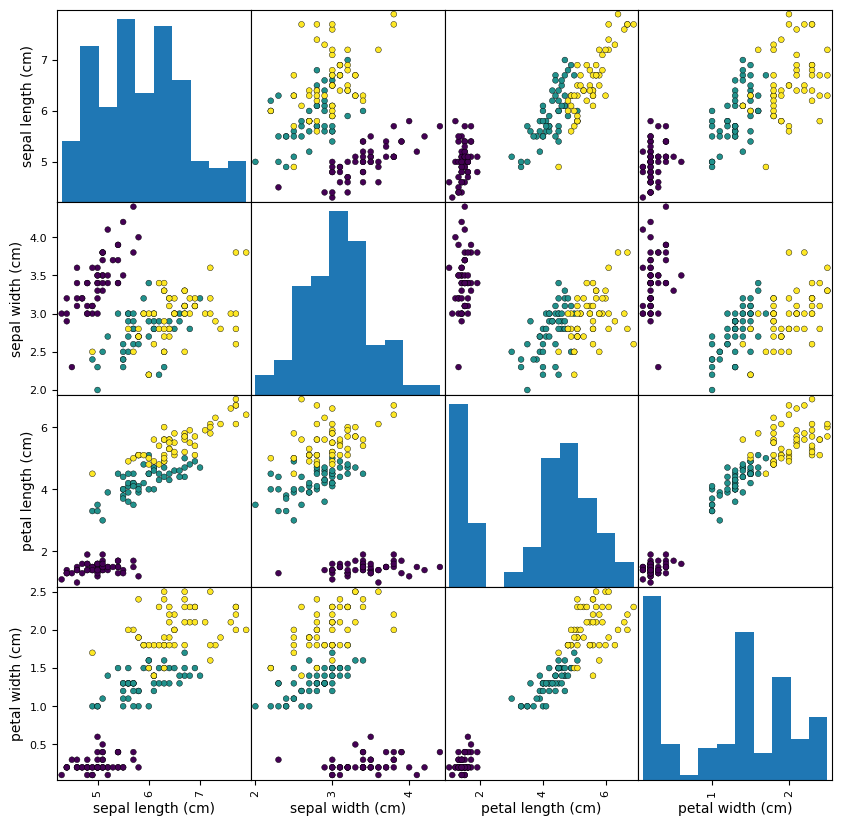

In [145]:
import pandas as pd

# データフレームを作成し，特徴ごとに名前を設定
df = pd.DataFrame(
    X,
    columns=iris_data.feature_names,
)

# 散布図行列をプロット
pd.plotting.scatter_matrix(
    df,
    c=iris_data.target,
    figsize=(10, 10),
    s=70,
    edgecolors="k",
    linewidth=0.3,
    alpha=1,
)
plt.show()


4つの特徴の間に何らかの相関関係があるように見えるが，この4次元データから直感的に判断するのは難しい．このような多次元データを統計的に解析する方法は**多変量解析**と呼ばれており，PCAはその代表的な手法の1つである．

- https://ja.wikipedia.org/wiki/%E5%A4%9A%E5%A4%89%E9%87%8F%E8%A7%A3%E6%9E%90
    > 変量解析は、多変量のデータの特徴を要約する方法のことである。




#### 1.6.1.1. <a id='toc1_6_1_1_'></a>[主成分の定式化](#toc0_)

主成分分析（Principal Component Analysis, PCA）は，多変量解析で最も広く使用される手法の1つである．PCAはデータの相関関係を活用して，多次元データの特徴を最もよく表す**主成分**（Principal Component）と呼ばれる，データの分散が最大となる方向のベクトルを求める．

- https://ja.wikipedia.org/wiki/%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90
    > 主成分分析は、相関のある多数の変数から相関のない少数で全体のばらつきを最もよく表す主成分と呼ばれる変数を合成する多変量解析の一手法。


まず，ある$n$次元データを表すベクトル
$$
\boldsymbol{x} = (x_{1}, x_{2}, \ldots, x_{n})^T \in R^n
$$
が与えられたとする．このデータの各要素がどれだけ重要であるかを表す重みベクトル
$$
\boldsymbol{v} = (v_{1}, v_{2}, \ldots, v_{n})^T \in R^n
$$
を定義し，この重みを使って新しい変数$z$を次のように表す．
\begin{align*}
z &= v_1 x_{1} + v_2 x_{2} + \cdots + v_n x_{n} \\
&= \boldsymbol{v}^T \boldsymbol{x}
\end{align*}
ただし重み$\boldsymbol{v}$は正規化してあるとする．すなわち
\begin{align*}
\| \boldsymbol{v} \|_2^2 = 1
\end{align*}
である．

このとき，どのような重み$\boldsymbol{v}$を選べばデータ$\boldsymbol{x}$を最もよく解析できるかは，手法によって異なる．PCAでは，データ$\boldsymbol{x}_1, \boldsymbol{x}_2, \ldots, \boldsymbol{x}_m$に対して，変換後の変数$z_1, z_2, \ldots, z_m$が最も**散らばる方向**（分散が最大となる方向）を選び，その方向を表すベクトル$\boldsymbol{v}$を**第1主成分**と呼ぶ．また，この変数$z_i$はデータ$\boldsymbol{x}_i$をベクトル$\boldsymbol{v}$に射影したものであり，これを**主成分得点**または**主成分スコア**と呼ぶ．

以下のコードでは，あるデータ点$x$を射影する例を示す．ランダムに生成された重みベクトル`v`を用いて，データを新しい軸に射影した`z`を計算している．`v`が主成分であれば，`z`が主成分スコアとなる．

In [146]:
x = X[0]
print("x", x)

# 重みベクトルvをランダムに生成し，正規化
v = rng.random(size=(X.shape[1]))
v /= np.linalg.norm(v)
print("v", v)

# データ点xをv方向に射影して主成分得点を計算
z = v @ x
print("z", z)


x [5.1 3.5 1.4 0.2]
v [0.29347536 0.40651342 0.15620659 0.85101032]
z 3.3084125705020453


#### 1.6.1.2. <a id='toc1_6_1_2_'></a>[共分散行列の計算](#toc0_)

主成分を求めるためには，$z_i$の分散$\sigma^2$を最大化する最適化問題を解く必要がある．分散$\sigma^2$は次の式で表される．

$$
\sigma^2 = \frac{1}{m} \sum_{i=1}^m (z_i - \bar{z})^2
$$

ここで，$\bar{z}$は$z_i$の平均を表す．これは次のように展開できる．

\begin{align*}
\bar{z}
&= \frac{1}{m} \sum_{i=1}^m z_i \\
&= \frac{1}{m} \sum_{i=1}^m \boldsymbol{v}^T \boldsymbol{x}_i \\
&= \boldsymbol{v}^T \bar{\boldsymbol{x}}
\end{align*}

ここで$\bar{\boldsymbol{x}}$は，データの平均ベクトルであり，次のように定義される．

\begin{align*}
\bar{\boldsymbol{x}} &= \frac{1}{m} \sum_{i=1}^m \boldsymbol{x}_i
\end{align*}


実際には，データから平均を除去して$\bar{\boldsymbol{x}} = \boldsymbol{0}$，$\bar{z} = 0$とすることが一般的である．これにより分散計算は簡略化されるが，主成分を求めるための$\boldsymbol{v}$の推定には影響を与えない．

以下は，データの平均$\bar{\boldsymbol{x}}$と射影後の平均$\bar{z}$を計算するコードである．


In [147]:
# データ行列Xの平均ベクトルを計算
x_bar = X.mean(axis=0)
print("x_bar", x_bar)

# 重みベクトルvを使ってzの平均を計算
z_bar = v @ x_bar
print("z_bar", z_bar)


x_bar [5.84333333 3.05733333 3.758      1.19933333]
z_bar 4.565390760918495


平均を用いると，分散$\sigma^2$は次のように表される．

\begin{align*}
\sigma^2
&= \frac{1}{m-1} \sum_{i=1}^m (z_i - \bar{z})^2 \\
&= \frac{1}{m-1} \sum_{i=1}^m (\boldsymbol{v}^T \boldsymbol{x}_i - \boldsymbol{v}^T \bar{\boldsymbol{x}})^2 \\
&= \frac{1}{m-1} \sum_{i=1}^m \boldsymbol{v}^T (\boldsymbol{x}_i - \bar{\boldsymbol{x}})(\boldsymbol{x}_i - \bar{\boldsymbol{x}})^T \boldsymbol{v}  \\
&= \boldsymbol{v}^T S \boldsymbol{v}
\end{align*}

ここで，$S$はデータの共分散行列であり，次のように定義される．

\begin{align*}
S
&= \frac{1}{m-1} \sum_{i=1}^m (\boldsymbol{x}_i - \bar{\boldsymbol{x}})(\boldsymbol{x}_i - \bar{\boldsymbol{x}})^T \\
&= \frac{1}{m-1} (X'_{\mathrm{row}})^T X'_{\mathrm{row}}
\end{align*}

ここで$X'_{\mathrm{row}}$は，平均を除去したデータ行列を指す．この共分散行列$S$が，主成分分析において非常に重要な役割を果たす．

以下は$X$から共分散行列$S$を計算するコードである．

In [148]:
S = np.cov(X, rowvar=False)
print("S\n", S, sep='')


S
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


#### 1.6.1.3. <a id='toc1_6_1_3_'></a>[第1主成分：分散最大化問題](#toc0_)

以上の議論から，第1主成分を求めるための最適化問題は，次のように定式化される．

$$
\max_{\boldsymbol{v}} \boldsymbol{v}^T S \boldsymbol{v} \quad \text{s.t.} \quad \| \boldsymbol{v} \|_2^2 = 1
$$

ここで，$\boldsymbol{v}$は正規化された重みベクトルであり，$S$は共分散行列である．
最適化問題の解が，$z_i$の分散が最大となる方向，つまり第1主成分である．

この最適化問題を解くために，ラグランジュ乗数法を用いる．ラグランジュ乗数を$\lambda$とすると，ラグランジュ関数$L$は次のようになる．

$$
L = \boldsymbol{v}^T S \boldsymbol{v} + \lambda (1 - \boldsymbol{v}^T \boldsymbol{v})
$$

このラグランジュ関数を$\boldsymbol{v}$で微分し，その結果を0として解くと，以下の固有値問題が得られる．

\begin{align*}
S \boldsymbol{v} = \lambda \boldsymbol{v}
\end{align*}

つまり，$\lambda$が共分散行列$S$の固有値であり，$\boldsymbol{v}$がそれに対応する固有ベクトルとなる．このとき，$\boldsymbol{v}^T S \boldsymbol{v} = \lambda$が成り立つため，分散$\boldsymbol{v}^T S \boldsymbol{v}$を最大化するには，最大の固有値$\lambda_1$を選べばよい．したがって，$\boldsymbol{v}$は$S$の第1固有ベクトルであり，これが求めるべき第1主成分となる．





以下のコードでは，ランダムに選んだベクトルと第1固有ベクトルを用いて，$\boldsymbol{v}^T S \boldsymbol{v}$の値を比較している．第1固有ベクトルで計算したほうが分散の値が大きくなることが確認できる．

In [149]:
print("v: random")
for _ in range(10):
    v = rng.random(size=(X.shape[1]))
    v /= np.linalg.norm(v)
    print("v^T S v: ", v @ S @ v)

print("v: 1st eigen vector")
# 共分散行列Sの固有値と固有ベクトルを計算
s, U = np.linalg.eigh(S)
# 第1固有ベクトルでv^T S vを計算
print("v^T S v: ", U[:, -1] @ S @ U[:, -1])


v: random
v^T S v:  2.1246885114876406
v^T S v:  1.4626058021243868
v^T S v:  3.6794076110786014
v^T S v:  2.2436513438307046
v^T S v:  2.073513972480167
v^T S v:  0.9778028771144649
v^T S v:  1.7819324176242244
v^T S v:  0.7227737075525349
v^T S v:  2.0477284313870308
v^T S v:  1.7949780307513874
v: 1st eigen vector
v^T S v:  4.228241706034861


#### 1.6.1.4. <a id='toc1_6_1_4_'></a>[第$i$主成分](#toc0_)

$d$次元データ$\boldsymbol{x}_i$を第1主成分方向へ射影して1次元データ$z_i$を得たが，それだけでは情報が不十分である．そこで，第1主成分$\boldsymbol{v}_1$に**直交する方向**の中で，射影後のデータの分散が最も大きくなる方向を**第2主成分**$\boldsymbol{v}_2$とする．さらに，第1主成分$\boldsymbol{v}_1$から第$i-1$主成分$\boldsymbol{v}_{i-1}$に直交する方向の中で，射影後のデータの分散が最大となる方向を第$i$主成分$\boldsymbol{v}_i$とする．

この考え方に基づき，上記で得られた固有値問題

\begin{align*}
\boldsymbol{v}^T S \boldsymbol{v} = \lambda
\end{align*}

をみると，第2主成分$\boldsymbol{v}_2$は2番目に大きい固有値に対応する固有ベクトルであり，第$i$主成分$\boldsymbol{v}_i$は$i$番目に大きい固有値に対応する固有ベクトルであることがわかる．したがって，$i=1, 2, \ldots, n$について，固有ベクトルを並べた行列を

\begin{align*}
V = (\boldsymbol{v}_1, \boldsymbol{v}_2, \ldots, \boldsymbol{v}_n) \in R^{n \times n}
\end{align*}

とおく．主成分スコアを並べたベクトルを$\boldsymbol{z} = (z_1, z_2, \ldots, z_n)^T$とすると，次のように表される．

\begin{align*}
\boldsymbol{z}_i = V^T (\boldsymbol{x}_i - \bar{\boldsymbol{x}})
\end{align*}

また，データ行列$X'_{\mathrm{row}}$を用いて表せば，

\begin{align*}
Z = X'_{\mathrm{row}} V
\end{align*}
となる．ここで$Z$は各データの主成分スコア$\boldsymbol{z}_i$を行に持つ行列である．

さらに，$V$は直交行列であり，$i \neq j$について$\boldsymbol{v}_i$と$\boldsymbol{v}_j$が直交するように選ばれているため，$V$は基底変換を表す．この基底変換は**主軸変換**とも呼ばれ，統計的解析において重要な役割を果たす．


以下のコードでは，第1固有ベクトルに直交するランダムなベクトルを使って$\boldsymbol{v}^T S \boldsymbol{v}$を計算し，さらに第2固有ベクトルを使って分散の値を比較している．第2固有ベクトルを使った方が，より大きな分散が得られることが確認できる．


In [150]:
print("v: random but orthogonal to 1st eigen vector")
for _ in range(10):
    v = rng.random(size=(X.shape[1]))
    v -= (U[:, -1] @ v) * U[:, -1]  # 第1固有ベクトルに直交する成分を求める
    v /= np.linalg.norm(v)
    print("v^T S v: ", v @ S @ v, v @ U[:, -1])

print("v: 2nd eigen vector")
# 第2固有ベクトルを使ってv^T S vを計算
print("v^T S v: ", U[:, -2] @ S @ U[:, -2], U[:, -2] @ U[:, -1])


v: random but orthogonal to 1st eigen vector
v^T S v:  0.10875241248469877 -7.91033905045424e-16
v^T S v:  0.1849968128603493 -1.249000902703301e-16
v^T S v:  0.13362527658641105 -3.677613769070831e-16
v^T S v:  0.1036987018210664 -3.0531133177191805e-16
v^T S v:  0.14628930628022735 -3.608224830031759e-16
v^T S v:  0.06259514133212321 -8.604228440844963e-16
v^T S v:  0.22083104682275728 -2.498001805406602e-16
v^T S v:  0.22328339303942002 -1.0547118733938987e-15
v^T S v:  0.04300238117844427 -1.0547118733938987e-15
v^T S v:  0.15492625594917497 -8.326672684688674e-16
v: 2nd eigen vector
v^T S v:  0.24267074792863347 3.608224830031759e-16


### 1.6.2. <a id='toc1_6_2_'></a>[次元削減](#toc0_)

すべての主成分スコアを利用する必要はなく，特に寄与の大きい最初の数個の主成分だけを使って解析することが多い．主成分分析を使った解析では，第1主成分と第2主成分を使って2次元プロットを作成し，データの分布を視覚化することがよく行われる．

パターン認識や機械学習では，しばしば非常に多くの次元を持つデータを扱う．例えば，画像認識では$n=256 \times 256=65,536$ピクセルものデータを扱うことがある．このままでは計算量が大きく，処理が非効率的になり，特に高次元データは汎化性能（モデルが未知データに対してどれだけ正確か）が低下することが多い．そのため，次元数$n$よりも小さい$p$にデータを圧縮する**次元削減**（dimensionality reduction）を行うことがよくある．主成分分析を用いる場合，$p$個の主成分スコア$z_1, \ldots, z_p$を用いて次元削減が行われる．このような次元削減されたデータを，パターン認識や機械学習では**特徴量**（feature）と呼ぶ．

- https://ja.wikipedia.org/wiki/%E6%AC%A1%E5%85%83%E5%89%8A%E6%B8%9B
    > 次元削減とは、高次元空間から低次元空間へデータを変換しながら、低次元表現が元データの何らかの意味ある特性を保持することである。



次元削減を行わない場合，$V$は直交行列なので，データに$V^T$をかけて主成分スコアに変換し，再び$V$をかけると元のデータに戻る．

\begin{align*}
\boldsymbol{z}_i &= V^T (\boldsymbol{x}_i - \bar{\boldsymbol{x}})  \in R^m\\
V \boldsymbol{z}_i&= V V^T (\boldsymbol{x}_i - \bar{\boldsymbol{x}})
= \boldsymbol{x}_i - \bar{\boldsymbol{x}}  \in R^m
\end{align*}

次元削減を行う場合，$V \in R^{m \times p}$は列直交行列であり，
$V V^T$は$m \times m$行列だが，単位行列ではない．そのため次元削減後のデータ

\begin{align*}
\boldsymbol{z}_i &= V^T (\boldsymbol{x}_i - \bar{\boldsymbol{x}}) \in R^p
\end{align*}

に対して$V^T \in R^{p \times m}$を適用しても，元のデータには完全には戻らない．

\begin{align*}
V \boldsymbol{z}_i&= V V^T (\boldsymbol{x}_i - \bar{\boldsymbol{x}})
\neq \boldsymbol{x}_i - \bar{\boldsymbol{x}}
\end{align*}

しかし，これは$V$の$p$個の列（主成分）が張る部分空間への射影となっている．


#### 1.6.2.1. <a id='toc1_6_2_1_'></a>[累積寄与率](#toc0_)

次元削減の程度を決定する際には，**累積寄与率**（cumulative contribution rate）を基準にすることが多い．

第$i$主成分に対応する固有値を$\lambda_i$とすると，固有値が大きいほどその主成分がデータの分散をよく表すことになる．$\lambda_i = 0$であればその主成分に射影したデータの分散は0であり，その主成分はデータを表していないことになる．固有値が非常に小さい場合も同様に，その主成分は重要ではない．
したがって，固有値がある程度大きい第$p$主成分までを利用すればよいことになる．

全固有値の和に対する固有値の比は**寄与率**（contribution rate）と呼ばれ，次のように定義される．

$$
\gamma_i = \frac{\lambda_i}{\sum_{k=1}^n \lambda_k}
$$

これを第1主成分から第$p$主成分までの寄与率の合計として**累積寄与率**を次のように定義する．

\begin{align*}
\sum_{i=1}^p \gamma_i
=
\frac{\sum_{i=1}^p \lambda_i}{\sum_{k=1}^n \lambda_k}
\end{align*}

$p=n$の場合には累積寄与率は1である．

通常，累積寄与率が90%や95%となる次元$p$を選んで次元削減を行う．



### 1.6.3. <a id='toc1_6_3_'></a>[実装（$m > n$の場合）](#toc0_)

ここでは，アヤメのデータセットのデータ行列`X`の共分散行列を計算し，主成分を求める．
このデータセットでは次元数が$n=4$，サンプル数が$m=150$であるため，$m > n$である．

まず，データ`X`の列方向に平均を計算し，それを各データから引いて平均を取り除く．


In [151]:
x_bar = X.mean(axis=0)  # 各特徴量の平均を計算
X_decentered = X - x_bar  # データを中心化


次に共分散行列$S$を次式で計算する．

\begin{align*}
S
&= \frac{1}{m-1} (X'_{\mathrm{row}})^T X'_{\mathrm{row}}
\end{align*}

ここで$\frac{1}{m-1}$は不偏分散のための係数である．

以下のコードではこの式を用いて計算しているが，`np.cov()`で計算することもできる．ただし後述する$m > n$のケースと比較するために，あえてここでもこの式を使う．


In [152]:
S = (X_decentered.T @ X_decentered) / (m - 1)  # 共分散行列（不偏分散）の計算

with np.printoptions(formatter={'float': '{: 12.8f}'.format}, suppress=True, linewidth=100):
    print("S\n", S, sep='')


S
[[  0.68569351  -0.04243400   1.27431544   0.51627069]
 [ -0.04243400   0.18997942  -0.32965638  -0.12163937]
 [  1.27431544  -0.32965638   3.11627785   1.29560940]
 [  0.51627069  -0.12163937   1.29560940   0.58100626]]


共分散行列`S`は実対称行列であるため，関数`eigh()`で固有値と固有ベクトルを求める．数式と一致させるために，固有値は逆順に並び替えて，最大固有値が先頭に来るようにする．

In [153]:
d, V = np.linalg.eigh(S)
d = d[::-1]  # 固有値を降順に並び替える
V = V[:, ::-1]  # 固有ベクトルも対応させて並び替える
print("eigenvalues", d)


eigenvalues [4.22824171 0.24267075 0.0782095  0.02383509]


次に，寄与率と累積寄与率を計算する．累積和は`np.cumsum`を使用する．

- [`np.cumsum`](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html)
    > Return the cumulative sum of the elements along a given axis.


In [154]:
with np.printoptions(formatter={'float': '{: 12.8f}'.format}, suppress=True):
    g = d / d.sum()  # 寄与率の計算
    print("contribution rate           ", g)
    cum_g = np.cumsum(g)  # 累積寄与率の計算
    print("cumurative contribution rate", cum_g)


contribution rate            [  0.92461872   0.05306648   0.01710261   0.00521218]
cumurative contribution rate [  0.92461872   0.97768521   0.99478782   1.00000000]


次に，寄与率と累積寄与率をグラフにプロットする．このデータ（アヤメデータセット）では，第1主成分が92%を占め，1つの軸で大部分のデータを説明できる．
データが4次元であるので，主成分は第4主成分までである．

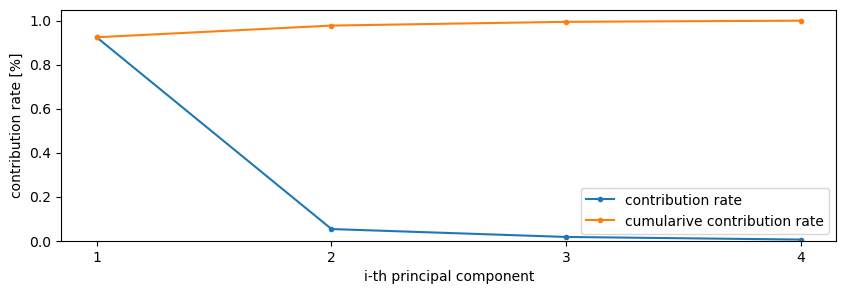

In [155]:
fig = plt.figure(figsize=(10,3))
ax = fig.subplots()
n_pc = list(range(1, 5))  # 主成分の個数のリスト

ax.plot(n_pc, g, '.-', label="contribution rate")
ax.plot(n_pc, cum_g, '.-', label="cumularive contribution rate")

ax.set_xlabel("i-th principal component")
ax.set_ylabel("contribution rate [%]")
ax.set_ylim(0)
ax.set_xticks(n_pc)

ax.legend()
plt.show()


最後に，主成分スコアを計算し，第1主成分と第2主成分のスコアをプロットする．
第1主成分の方向にデータが大きく散らばっていることがわかる．
ここではサンプル点の色をアヤメの種類によって分けており，
アヤメの種類によって傾向が異なっていることが可視化されている．

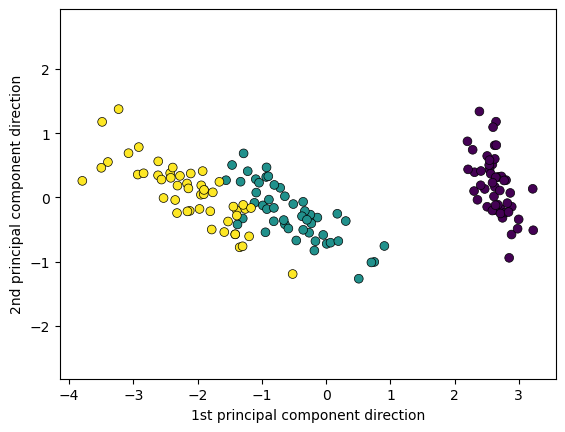

In [156]:
Z = X_decentered @ V[:, :2]  # 第1主成分と第2主成分を使った主成分スコア

fig = plt.figure()
ax = fig.subplots()

ax.scatter(
    Z[:, 0],  # 第1主成分方向
    Z[:, 1],  # 第2主成分方向
    c=iris_data.target,
    edgecolor="k",
    linewidth=0.5,
    s=40,
)
ax.axis("equal")
ax.set_xlabel("1st principal component direction")
ax.set_ylabel("2nd principal component direction")

plt.show()


#### 1.6.3.1. <a id='toc1_6_3_1_'></a>[scikit-learnによる実装](#toc0_)

scikit-learnには主成分分析が実装されており，`sklearn.decomposition.PCA`で利用できる．
以下のコードは，アヤメのデータセットに適用した例である．

- [`skearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
    > Principal component analysis (PCA).

まず，`PCA()`を使って`pca`オブジェクトを作成する．その後，データ行列`X`を`pca.fit()`に与えることで主成分分析が行われ，内部的に主成分が保持される．主成分スコアを計算する場合は，`pca.transform()`にデータ行列`X`を与えると，返り値として主成分スコア行列`Z`が得られる．


もし，主成分を計算するデータ行列と主成分スコアを計算するデータ行列が同一であるなら，`pca.fit_transform()`を使って一度に計算できる．その後，異なるデータに対して主成分を適用する場合は，`pca.transform()`を利用する．


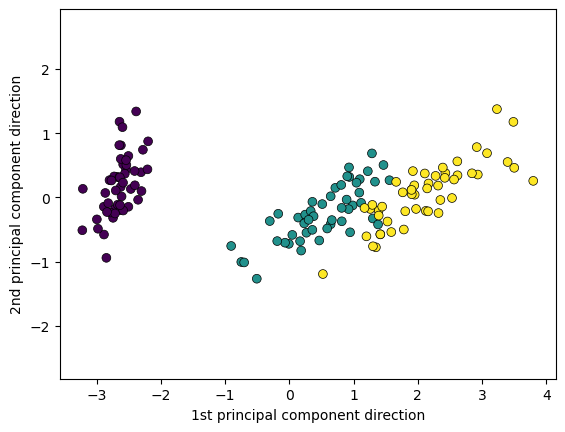

In [157]:
from sklearn.decomposition import PCA

fig = plt.figure()
ax = fig.subplots()

pca = PCA()  # PCAオブジェクトの作成

pca.fit(X)  # データ行列Xに基づいて主成分を計算
Z = pca.transform(X)  # 主成分スコアの計算
# Z = pca.fit_transform(X)  # fitとtransformを一度に行う

# 第1主成分と第2主成分に基づいてデータをプロット
ax.scatter(
    Z[:, 0],  # 第1主成分方向
    Z[:, 1],  # 第2主成分方向
    c=iris_data.target,
    edgecolor="k",
    linewidth=0.5,
    s=40,
)
ax.axis("equal")
ax.set_xlabel("1st principal component direction")
ax.set_ylabel("2nd principal component direction")

plt.show()


なお，主成分の向きは任意であるため，`sklearn.decomposition.PCA`で行った次元削減と，この資料で実装した次元削減の結果が上下や左右で反転することがある．しかし，主成分ベクトル自体は符号を除けば同一である．

また，`sklearn.decomposition.PCA`のオブジェクト`pca`には主成分行列`V`（ただし$V$ではなく$V^T$），固有値（分散）`d`，データの平均ベクトル`x_bar`などが保持されており，それぞれ以下のように取得できる．これらの結果が，資料内の実装で計算したものと一致しているか，次のコードで確認できる．

In [158]:
with np.printoptions(formatter={'float': '{: 12.8f}'.format}, suppress=True, linewidth=100):

    print("V_sklearn^T\n", pca.components_.T)  # sklearnで計算された主成分行列
    print("V\n", V)  # この資料で実装した主成分行列

    for i in range(len(V)):
        print(
            f"column {i}: V[{i}] == V_sklearn^T[{i}] ?",
            np.allclose(V[:, i], pca.components_.T[:, i]) or np.allclose(V[:, i], -pca.components_.T[:, i])
        )

V_sklearn^T
 [[  0.36138659   0.65658877  -0.58202985  -0.31548719]
 [ -0.08452251   0.73016143   0.59791083   0.31972310]
 [  0.85667061  -0.17337266   0.07623608   0.47983899]
 [  0.35828920  -0.07548102   0.54583143  -0.75365743]]
V
 [[ -0.36138659   0.65658877   0.58202985   0.31548719]
 [  0.08452251   0.73016143  -0.59791083  -0.31972310]
 [ -0.85667061  -0.17337266  -0.07623608  -0.47983899]
 [ -0.35828920  -0.07548102  -0.54583143   0.75365743]]
column 0: V[0] == V_sklearn^T[0] ? True
column 1: V[1] == V_sklearn^T[1] ? True
column 2: V[2] == V_sklearn^T[2] ? True
column 3: V[3] == V_sklearn^T[3] ? True


In [159]:
print("lambda_sklearn", pca.explained_variance_)  # sklearnで計算された分散
print("lambda        ", d)  # この資料で実装した分散（固有値）
print("lambda_sklearn == lambda", np.allclose(pca.explained_variance_, d))


lambda_sklearn [4.22824171 0.24267075 0.0782095  0.02383509]
lambda         [4.22824171 0.24267075 0.0782095  0.02383509]
lambda_sklearn == lambda True


In [160]:
print("x_bar_sklearn", pca.mean_)  # sklearnで計算されたデータの平均ベクトル
print("x_bar        ", x_bar)  # この資料で実装した平均ベクトル
print("x_bar_sklearn == x_bar:", np.allclose(pca.mean_, x_bar))


x_bar_sklearn [5.84333333 3.05733333 3.758      1.19933333]
x_bar         [5.84333333 3.05733333 3.758      1.19933333]
x_bar_sklearn == x_bar: True


In [161]:
print("gamma sklearn", pca.explained_variance_ratio_)  # sklearnで計算された寄与率
print("gamma        ", g)  # この資料で実装した寄与率
print("gamma sklearn == gamma:", np.allclose(pca.explained_variance_ratio_, g))


gamma sklearn [0.92461872 0.05306648 0.01710261 0.00521218]
gamma         [0.92461872 0.05306648 0.01710261 0.00521218]
gamma sklearn == gamma: True


### 1.6.4. <a id='toc1_6_4_'></a>[実装（$m < n$の場合）：顔画像データセットの主成分分析](#toc0_)

ここではsklearnのデータセットとして準備されているOlivetti facesデータセットを用いる．

- [`sklearn.datasets.fetch_olivetti_faces`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html)
    > Load the Olivetti faces data-set from AT&T (classification).

このデータセットには$m=400$枚の顔画像があり，それぞれが$n=4096$次元のベクトルである（64x64画像を表す）．

In [162]:
# データセットの読み込み
face_dataset = fetch_olivetti_faces(shuffle=False)
X = face_dataset.data  # 顔画像のデータ行列

# データの行数と列数を確認
m, n = X.shape
print(f"m={m}, n={n}")


m=400, n=4096


例として0枚目の画像を表示する．64x64にreshpaeしてから`imshow()`で表示する．


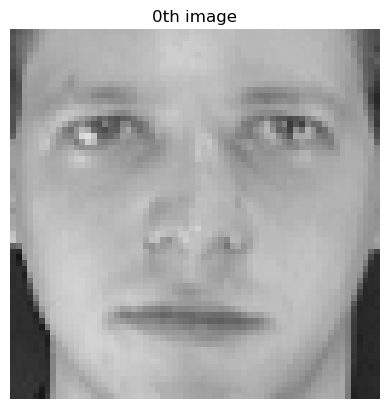

In [163]:
# 0枚目の画像を表示
imshow(X[0].reshape(64, 64), vmin=0, vmax=1, cmap="gray")
plt.axis('off')  # 軸を表示しない
plt.title("0th image")  # タイトルを設定
plt.show()


以下のコードで，データセットに含まれる400枚の顔画像をすべて表示して確認する．

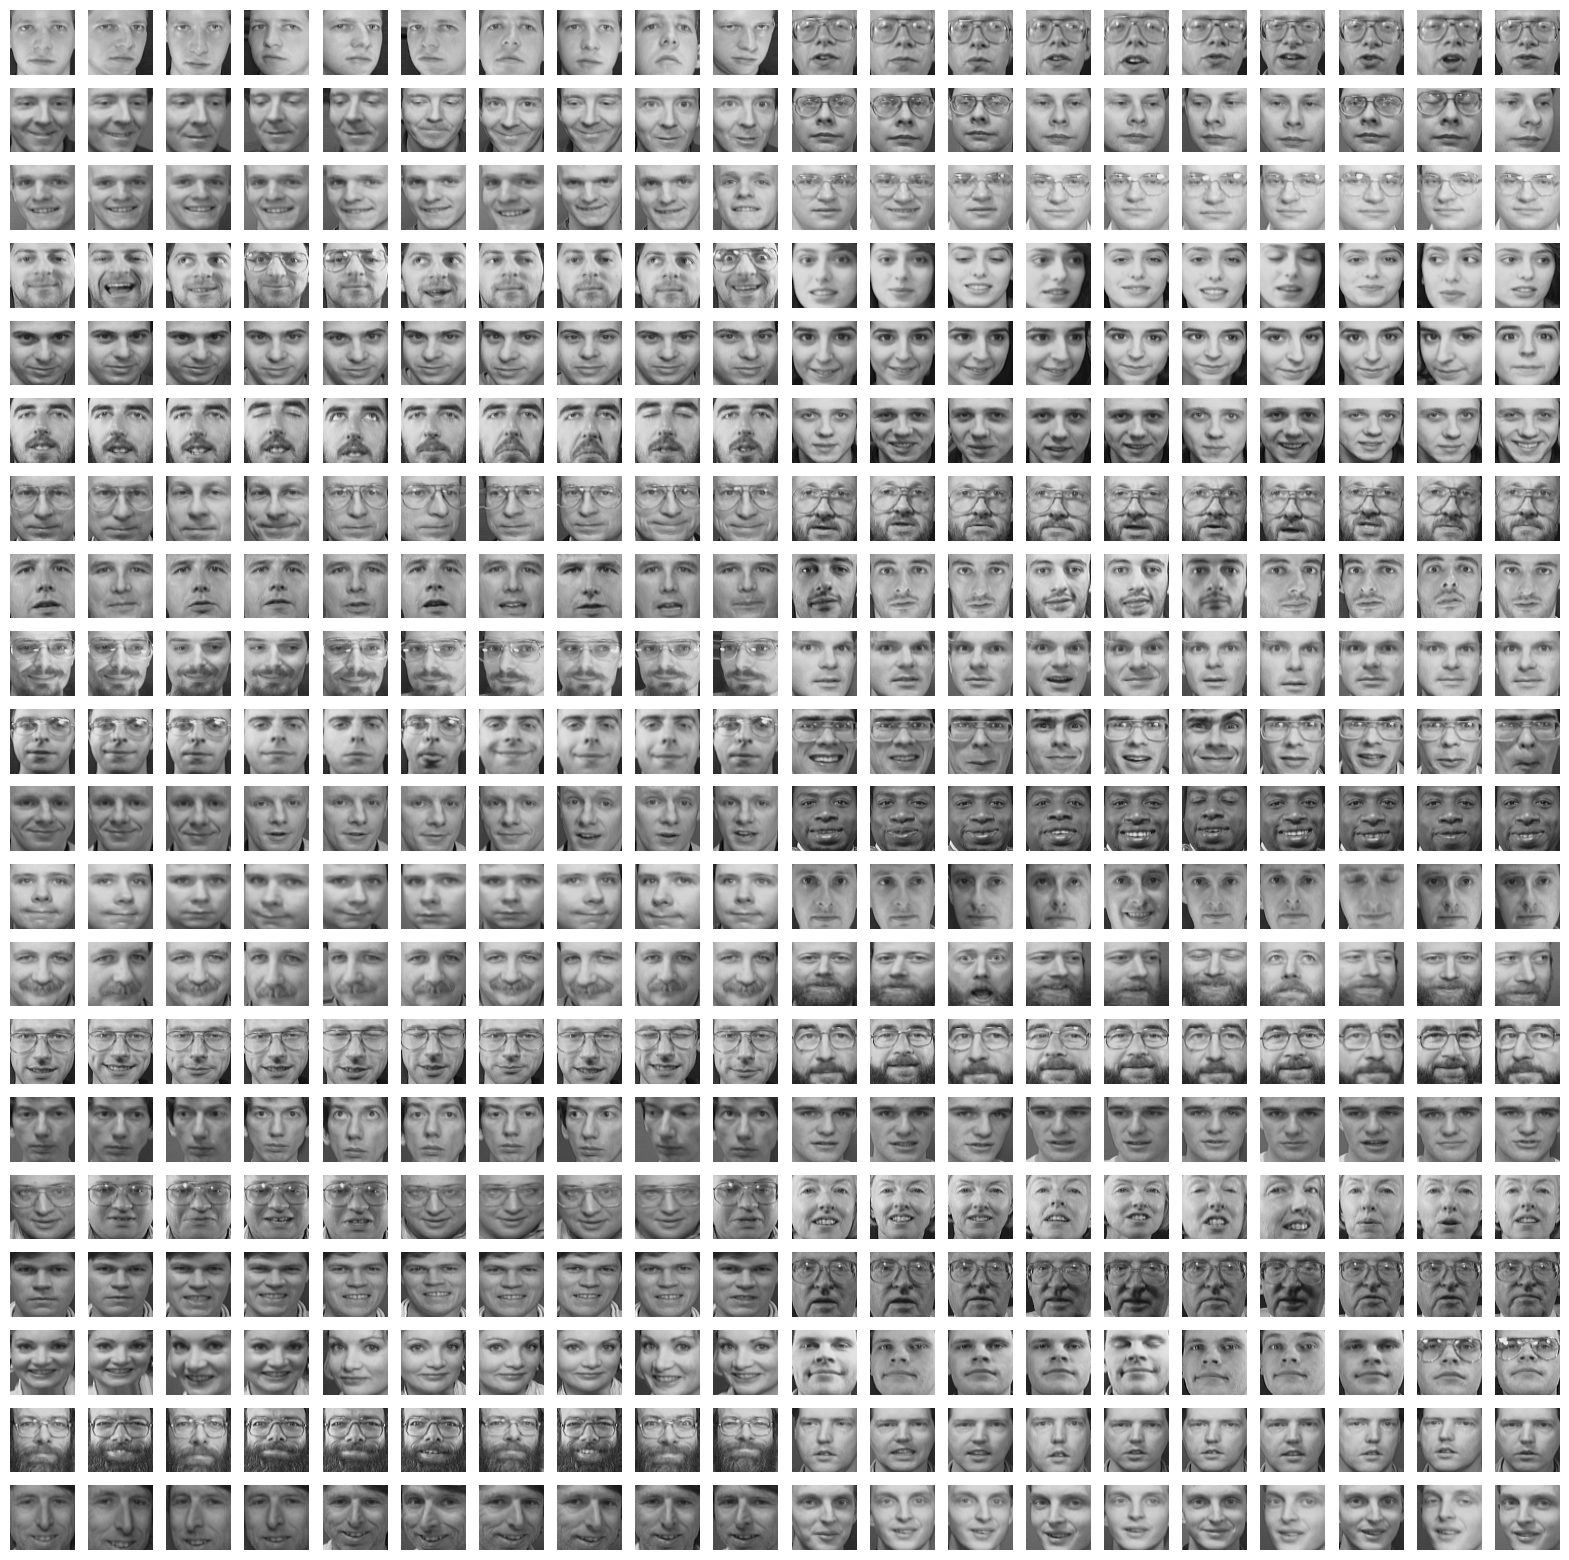

In [164]:
# 400枚の顔画像を表示
plt.figure(figsize=(20, 20))
for i, p in enumerate(X):
    plt.subplot(20, 20, i + 1)  # 20x20のグリッドに画像を配置
    plt.imshow(X[i].reshape(64, 64), vmin=0, vmax=1, cmap="gray")
    plt.axis('off')


次に，顔画像データの平均ベクトル$\bar{\boldsymbol{x}}$を計算する．それを画像として表示すると，平均顔画像が得られる．


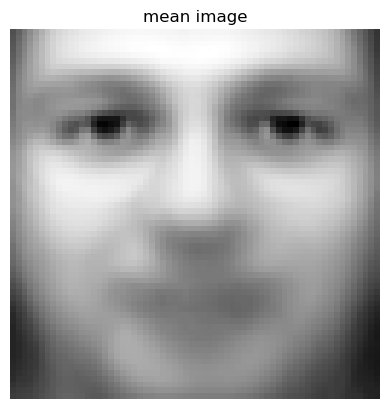

In [165]:
# 平均顔画像の計算
x_bar = X.mean(axis=0)

imshow(x_bar.reshape(64, 64), cmap="gray")
plt.axis('off')
plt.title("mean image")
plt.show()


では，共分散行列を作成し，主成分分析のために固有値を計算することを考える．先ほどのアヤメデータのような$m=150, n=4$の場合と異なり，このデータセットでは$m=400, n=4096$であるため，共分散行列は$4096 \times 4096$のサイズとなり，非常に大きい．このような大きな行列に対して，直接固有値分解を行うのは計算負荷が高いため，異なる方法を検討する必要がある．

In [166]:
# 平均を引いたデータ
X_decentered = X - x_bar

# 大きな共分散行列を作成するため、直接計算は避ける！
# S = (X_decentered.T @ X_decentered) / (m - 1)  # この行は実行しない！
# eigh(S)  # 実行すると計算負荷が大きいので注意！


#### 1.6.4.1. <a id='toc1_6_4_1_'></a>[計算方法](#toc0_)

$n \times n$共分散行列`S`を保持するためのメモリ使用量は$O(n^2)$である．たとえば，float64形式では1要素あたり8バイト必要で，$n=4096$次元のデータの場合，$8 \times 4096 \times 4096 =$ 約130MBのメモリが必要となる．計算中にはさらにメモリ領域が必要となり，画像のサイズがさらに大きくなると，メモリに共分散行列を保持すること自体が難しくなる．また，固有ベクトルを計算するコストも$O(n^3)$であるため，計算負荷が非常に大きくなる．

そのため，$m \ll n$の場合には，以下のような手順を踏む．

共分散行列$S$は次のように表される．
$$
S = \frac{1}{m-1} X^T X \in R^{n \times n}
$$
ここで，$X \in R^{m \times n}$は，平均ベクトルを除去したデータ行列である（前述ではこれを$X'_{\mathrm{row}}$としていた）．

このとき，行列$X$の特異値分解を考える．
$$
X = U \Sigma V^T
$$
この特異値分解を用いると，係数を除いた共分散行列$X^T X \in R^{n \times n}$は次のように表される．
$$
X^T X = V \Sigma U^T U \Sigma V^T = V \Sigma^2 V^T \in R^{n \times n}
$$
したがって，$X^T X$の固有ベクトル（つまり共分散行列$S$の主成分ベクトル）は，$X$の右特異ベクトル$V$であることがわかる．

前述のように，$X^T X$の固有ベクトルを直接計算するのは計算量が大きいため，現実的ではない．
そこで$X X^T \in R^{m \times m}$の固有ベクトル（すなわち$X$の左特異ベクトル$U$）を計算することを考える．
$$
X X^T = U \Sigma V^T V \Sigma U^T = U \Sigma^2 U^T
$$
この計算は，$m \times m$行列に対して行われるため，固有ベクトルの計算は現実的である．

こうして得られた$U$と$\Sigma$を用いると，次の式で$V$を表すことができる．
$$
V = X^T U \Sigma^{-1}
$$

以上のことから，共分散行列$S$の主成分ベクトルは，データ行列$X$の特異値分解で求められる右特異ベクトルであり，必要なのは$X$の特異値分解の計算であることがわかる．

ただし，「固有値分解を利用した単純なthin SVDの計算手法」の節で説明したように，
$m < n$の場合の特異値分解の計算は，実質的に上記と同じ手順で行われている．

ではこの方法で，まず$X X^T$の固有ベクトル`U`を計算し，
次に$X^T X$の固有ベクトル`V`に変換する．

In [167]:
d2, U = eigh(X_decentered @ X_decentered.T)
d2 = d2[::-1]  # Sigma^2を逆順に並べる
U = U[:, ::-1]  # 対応する固有ベクトルも逆順に並べる

# Simga^2は正定値実対称行列XX^Tの固有値であり理論的にはすべて正であるが，
# 計算誤差のために最小固有値に絶対値が1e-6程度の負の値が出てしまうことがある．
# そのため負の場合には1e-6に設定する
d2[d2 < 0] = 1e-6

# Vを計算する
V = (X_decentered.T @ U @ diag(1 / np.sqrt(d2)))

この計算結果を特異値分解（SVD）として確認すると，ほぼ一致していることがわかる．ただし計算精度の問題で，`np.allclose()`ではTrueにはならないが，ノルムを確認するとほぼ一致していることがわかる．

In [168]:
with np.printoptions(formatter={'float': '{: 12.8f}'.format}, suppress=True, linewidth=100):

    print("U Sigma V^T - X\n", (U @ diag(np.sqrt(d2)) @ V.T) - X_decentered, sep="")
    print("||U Sigma V^T - X||", norm(U @ diag(np.sqrt(d2)) @ V.T - X_decentered))
    print("U Sigma V^T == X", np.allclose(U @ diag(np.sqrt(d2)) @ V.T, X_decentered))

U Sigma V^T - X
[[  0.00000004  -0.00000012   0.00000004 ...  -0.00000001  -0.00000003  -0.00000019]
 [ -0.00000011  -0.00000004  -0.00000017 ...  -0.00000003  -0.00000019   0.00000010]
 [ -0.00000010  -0.00000002  -0.00000003 ...  -0.00000007   0.00000001  -0.00000006]
 ...
 [ -0.00000006  -0.00000001   0.00000001 ...  -0.00000012  -0.00000001   0.00000002]
 [  0.00000018   0.00000006   0.00000009 ...  -0.00000009   0.00000012   0.00000009]
 [  0.00000003   0.00000005   0.00000012 ...  -0.00000003   0.00000003  -0.00000007]]
||U Sigma V^T - X|| 8.8467714e-05
U Sigma V^T == X False


では$V$はPCAの主成分に（符号を除いて）一致することを確認する．以下のコードでは第10主成分まで確認している．
計算精度の問題で，`np.allclose()`ではTrueにならないが，ノルムを計算するとほぼ一致していることが分かる．

In [169]:
pca = PCA()
pca.fit(X)

with np.printoptions(formatter={'float': '{: 12.8f}'.format}, suppress=True, linewidth=100):

    for i in range(10):
        w_i = V[:, i]  # この資料の説明の実装で計算第i主成分
        pc_i = pca.components_[i]  # sklearnで計算された第i主成分

        print(pc_i)
        print(w_i)
        print(
            f"column {i}: V[{i}] == V_sklearn^T[{i}] ?",
            np.allclose(w_i, pc_i) or np.allclose(w_i, -pc_i),
            end=""
        )
        print(
            f"  || V[{i}] == V_sklearn^T[{i}] ||",
            min(np.linalg.norm(w_i - pc_i),
                np.linalg.norm(w_i + pc_i))
        )
        print()

[ -0.00419164  -0.00710946  -0.00933617 ...   0.00018519   0.00337968   0.00318828]
[ -0.00419111  -0.00710950  -0.00933610 ...   0.00018516   0.00337966   0.00318826]
column 0: V[0] == V_sklearn^T[0] ? False  || V[0] == V_sklearn^T[0] || 1.394346e-06

[ -0.02859158  -0.03328831  -0.03784630 ...   0.02962781   0.02721297   0.02488898]
[  0.02859138   0.03328836   0.03784649 ...  -0.02962783  -0.02721300  -0.02488899]
column 1: V[1] == V_sklearn^T[1] ? False  || V[1] == V_sklearn^T[1] || 2.1880585e-06

[  0.00135683  -0.00032560  -0.00019747 ...  -0.01541374  -0.01370987  -0.01188349]
[ -0.00135691   0.00032580   0.00019799 ...   0.01541366   0.01370979   0.01188341]
column 2: V[2] == V_sklearn^T[2] ? False  || V[2] == V_sklearn^T[2] || 2.092996e-06

[  0.00112456  -0.00179037  -0.01168221 ...   0.02942999   0.02781919   0.02521853]
[ -0.00112445   0.00179021   0.01168215 ...  -0.02943001  -0.02781919  -0.02521856]
column 3: V[3] == V_sklearn^T[3] ? False  || V[3] == V_sklearn^T[3] || 1


`sklearn.decomposition.PCA`などの実際の主成分分析の実装の内部では，
特異値分解（内部的には`numpy.linalg.svd()`）を用いて主成分を計算している．

<!-- 
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
    - https://github.com/scikit-learn/scikit-learn/blob/093e0cf14aff026cca6097e8c42f83b735d26358/sklearn/decomposition/_pca.py#L607
 -->

以下では`np.linalg.svd()`を用いて計算した右特異ベクトル$V$が，PCAの主成分に（符号を除いて）ほぼ一致することを確認している．


In [170]:
U, s, Vt = np.linalg.svd(X_decentered, full_matrices=False)


In [171]:
pca = PCA()
pca.fit(X)

with np.printoptions(formatter={'float': '{: 12.8f}'.format}, suppress=True, linewidth=100):

    for i in range(10):
        w_i = Vt[i]  # np.linalg.svdで計算された第i主成分
        pc_i = pca.components_[i]  # sklearnで計算された第i主成分

        print(pc_i)
        print(w_i)
        print(
            f"column {i}: V[{i}] == V_sklearn^T[{i}] ?",
            np.allclose(w_i, pc_i) or np.allclose(w_i, -pc_i),
            end=""
        )
        print(
            f"  || V[{i}] == V_sklearn^T[{i}] ||",
            min(np.linalg.norm(w_i - pc_i),
                np.linalg.norm(w_i + pc_i))
        )
        print()

[ -0.00419164  -0.00710946  -0.00933617 ...   0.00018519   0.00337968   0.00318828]
[  0.00419110   0.00710950   0.00933609 ...  -0.00018516  -0.00337966  -0.00318826]
column 0: V[0] == V_sklearn^T[0] ? False  || V[0] == V_sklearn^T[0] || 1.3628453e-06

[ -0.02859158  -0.03328831  -0.03784630 ...   0.02962781   0.02721297   0.02488898]
[  0.02859139   0.03328836   0.03784650 ...  -0.02962783  -0.02721299  -0.02488899]
column 1: V[1] == V_sklearn^T[1] ? False  || V[1] == V_sklearn^T[1] || 2.160985e-06

[  0.00135683  -0.00032560  -0.00019747 ...  -0.01541374  -0.01370987  -0.01188349]
[  0.00135691  -0.00032580  -0.00019799 ...  -0.01541365  -0.01370978  -0.01188341]
column 2: V[2] == V_sklearn^T[2] ? False  || V[2] == V_sklearn^T[2] || 2.0860878e-06

[  0.00112456  -0.00179037  -0.01168221 ...   0.02942999   0.02781919   0.02521853]
[ -0.00112445   0.00179020   0.01168215 ...  -0.02943002  -0.02781921  -0.02521855]
column 3: V[3] == V_sklearn^T[3] ? False  || V[3] == V_sklearn^T[3] || 

#### 1.6.4.2. <a id='toc1_6_4_2_'></a>[固有顔](#toc0_)

主成分$\boldsymbol{v}_i$はデータ$\boldsymbol{x}_i$と同じ$n$次元ベクトルであり，
データが画像の場合には，画像として表示することができる．
顔画像の場合にはこれを固有顔（eigenface）と呼び，
顔画像データの認識や解析において用いられていた．

以下は平均顔と，第5主成分（$\pm\boldsymbol{v}_i$）を固有顔として表示した例である．
これをみると，第1主成分は画像全体の大きな明暗の変動を表しており，
第2主成分は左右の照明変化を，
第3主成分は上下方向の照明変化を表していると解釈できる．


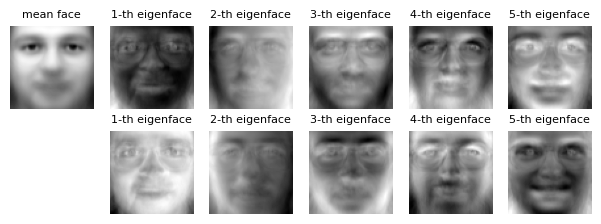

In [172]:
p = 5
plt.figure(figsize=(p * 3/2, 5/2))

plt.subplot(2, p + 1, 1)
plt.imshow(pca.mean_.reshape(64, 64),cmap="gray")
plt.axis('off')
plt.title(f"mean face", fontsize=8)

for i in range(p):
    plt.subplot(2, p + 1, i + 2)
    plt.imshow(pca.components_[i].reshape(64, 64), cmap="gray")
    plt.axis('off')
    plt.title(f"{i + 1}-th eigenface", fontsize=8)

for i in range(p):
    plt.subplot(2, p + 1, i + 2 + p + 1)
    plt.imshow(-1 * pca.components_[i].reshape(64, 64), cmap="gray")
    plt.axis('off')
    plt.title(f"{i + 1}-th eigenface", fontsize=8)

plt.show()


この顔画像データでは，累積寄与率が90%になるには第50主成分程度が必要なことが分かる．

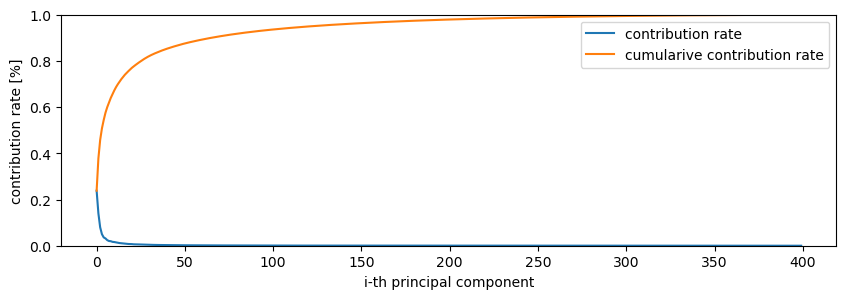

In [173]:
fig = plt.figure(figsize=(10, 3))
ax = fig.subplots()

ax.plot(pca.explained_variance_ratio_, '-', label="contribution rate")
ax.plot(np.cumsum(pca.explained_variance_ratio_), '-', label="cumularive contribution rate")

ax.set_xlabel("i-th principal component")
ax.set_ylabel("contribution rate [%]")
ax.set_ylim(0, 1)

ax.legend()
plt.show()
